<h2 style = "color : Brown">  Exploratory Data Analysis - Lending Club Case Study </h2>

In [1]:
#Mention business Case

## Mention the column of analysis.. 


In [2]:
#Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:
#Import the data and use the basic commands to understand it
df = pd.read_csv('loan.csv')

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\156808305.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [4]:
#Displaying Basic Information About The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  

[3 rows x 111 columns]

In [6]:
#Number Of Rows & Columns
df.shape

(39717, 111)

<h3 style = "color : Blue"> Data Cleaning </h3>   

####  <font color="Green"> **The loan status is the dependent column, which we are analysing against other columns**

* Need **Charged Off** and **Fully Paid** rows
* rows with loan_status **Current** can be dropped

In [7]:
print(df.shape)
df= df[df['loan_status'] != 'Current']
print("After removing the current running loans - df shape", df.shape)

(39717, 111)
After removing the current running loans - df shape (38577, 111)


In [8]:
##### Too many columns(111)  -- need to find which ones have proper data and which ones doesnt and will drop them

#### Missing Values identification and Treatment

Dropping The Variables Which has more than 40% of null values as they do not add much value to EDA

In [9]:
#Calculating The Null Percentage
null_percentages = (df.isnull().sum() / len(df)) * 100

In [10]:
#Creating The List of Columns With Less Than 40% Null Values
keep_columns=null_percentages[null_percentages <= 40].index

In [11]:
df = df[keep_columns]

In [12]:
df.shape

(38577, 54)

In [13]:
df.to_csv('filtered_df.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  38577 no

#### <font color="Green"> Columns with all zeroes or blanks. 

In [15]:
((df.isnull() | (df == "") | (df == 0.0)).sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                 129
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12529
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                             178
delinq_2yrs                   34386
earliest_cr_line                  0
inq_last_6mths              

In [16]:
df1series = ((df.isnull() | (df == "") | (df == 0.0)).sum())

In [17]:
df1series[df1series == (df.shape[0])]

out_prncp                     38577
out_prncp_inv                 38577
collections_12_mths_ex_med    38577
acc_now_delinq                38577
chargeoff_within_12_mths      38577
delinq_amnt                   38577
tax_liens                     38577
dtype: int64

#### <font color="blue"> Upon further analysis </font>
* pymnt_pln  - n for all
* url - constructed with loan id, so can be considered as a duplicate of loan id
* initial_list_status - f for all
* policy_code  - (1) same for all
* application Type - "Individual" for all
* Columns to be dropped
  - pymnt_pln
  -initial_list_status1
  policy_code
  - application Type
  - acc_now_delinq
  - delinq_amnt
  - tax_liensnt 3
d 



In [18]:
columns_to_drop = ['pymnt_plan', 'url', 'initial_list_status', 'policy_code', 'application_type', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

In [19]:
df.drop(columns_to_drop,  axis=1, inplace=True)

#### Verify missing values in rows

In [20]:
nullinrows = (df.isnull().sum(axis=1))

In [21]:
nullinrows.max()

4

#### <font color="Green">  No rows have a lot of nulls

In [22]:
df.shape

(38577, 44)

In [23]:
duplicate_rows = df.duplicated()
duplicate_rows[duplicate_rows==True]

Series([], dtype: bool)

#### <font color="Green"> No Duplicates

In [24]:
### Find out columns with nulls, if less no of rows, will delete those rows. 
df1nullmean = df.isnull().mean()

In [25]:
df1nullmean[(df1nullmean > 0.0)]

emp_title               0.061850
emp_length              0.026778
desc                    0.324779
title                   0.000285
revol_util              0.001296
last_pymnt_d            0.001840
last_credit_pull_d      0.000052
pub_rec_bankruptcies    0.018068
dtype: float64

In [26]:
df1nullmean[(df1nullmean > 0.0) & (df1nullmean < 0.1)]

emp_title               0.061850
emp_length              0.026778
title                   0.000285
revol_util              0.001296
last_pymnt_d            0.001840
last_credit_pull_d      0.000052
pub_rec_bankruptcies    0.018068
dtype: float64

In [27]:
df1nullmean[(df1nullmean > 0.0) & (df1nullmean > 0.1)]

desc    0.324779
dtype: float64

#### **Apart from desc lets delete the corresponding rows intead of imputing since that makes a better sense.** </font>
########



In [28]:
columns_to_check = ['emp_title','emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']

In [29]:
df.dropna(subset=columns_to_check, how='any', inplace=True)

In [30]:
df1nullmean = df.isnull().mean()
df1nullmean[(df1nullmean > 0.0)]

desc    0.32912
dtype: float64

In [31]:
#### **.** </font>
########

In [32]:
df.shape

(35367, 44)

#### Find blanks

In [33]:
blanksum = (df == "").sum()

In [34]:
blanksum[blanksum > 0]

Series([], dtype: int64)

In [35]:
df.shape

(35367, 44)

In [36]:
df.shape

(35367, 44)

####  <font color="Green"> **Impute Values** </font>
* Nulls
    * desc - fill with 'no description provided'

      

In [37]:
#df1.fillna('No description provided', inplace=True)

df['desc'] = df['desc'].fillna('No description provided')


In [38]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [39]:
df.to_csv('loancleaned.csv', index=False)


####  <font color="Green"> **Standardise** </font>
* term to term_months
* int_rate and revol_util - remove % 
* Dates to datetime
   * issue_d
   * earliest_cr_line
   * 
last_pymn_ 
   * 
last_credit_pull_d

In [40]:
#df.rename(columns={'term': 'term_in_mnths'}, inplace=True)
# Extract the numerical part and convert to integer
df['term_in_mnths'] = df['term'].str.extract('(\d+)').astype(int)
#df['term_in_mnths'].info

In [41]:
df['term']

1         60 months
3         36 months
5         36 months
6         60 months
7         36 months
            ...    
39551     36 months
39562     36 months
39623     36 months
39666     36 months
39680     36 months
Name: term, Length: 35367, dtype: object

In [42]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

In [43]:
df['int_rate'].head()

1    15.27
3    13.49
5     7.90
6    15.96
7    18.64
Name: int_rate, dtype: float64

In [44]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)

In [45]:
df['revol_util'].head()

1     9.4
3    21.0
5    28.3
6    85.6
7    87.5
Name: revol_util, dtype: float64

In [46]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1  1077430    1314167       2500         2500           2500.0   60 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   

   int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
1     15.27        59.83     C        C4  ...          456.46        435.17   
3     13.49       339.31     C        C1  ...        10000.00       2214.92   
5      7.90       156.46     A        A4  ...         5000.00        632.21   
6     15.96       170.08     C        C5  ...         6985.61       3125.23   
7     18.64       109.43     E        E1  ...         3000.00        939.14   

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
1               0.00      117.08                    1.11       Apr-13   
3              16.97        0.00                    0.00       Jan-15   
5               0.00        0.00                    0.00       Jan-15   
6               0.00        0.00                    0.00       May-16   
7               0.00        0.00                    0.00       Jan-15   

  last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies term_in_mnths  
1          119.66             Sep-13                  0.0            60  
3          357.48             Apr-16                  0.0            36  
5          161.03             Jan-16                  0.0            36  
6         1313.76             May-16                  0.0            60  
7          111.34             Dec-14                  0.0            36  

[5 rows x 45 columns]

In [47]:
df.issue_d

1        Dec-11
3        Dec-11
5        Dec-11
6        Dec-11
7        Dec-11
          ...  
39551    Dec-07
39562    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 35367, dtype: object

In [48]:
df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']]

issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
1      Dec-11           Apr-99       Apr-13             Sep-13
3      Dec-11           Feb-96       Jan-15             Apr-16
5      Dec-11           Nov-04       Jan-15             Jan-16
6      Dec-11           Jul-05       May-16             May-16
7      Dec-11           Jan-07       Jan-15             Dec-14
...       ...              ...          ...                ...
39551  Dec-07           Dec-00       Feb-10             May-14
39562  Nov-07           Mar-00       Aug-08             Aug-08
39623  Oct-07           Aug-97       May-08             May-16
39666  Aug-07           Nov-92       Oct-09             Mar-10
39680  Aug-07           Jul-00       Aug-10             Jul-10

[35367 rows x 4 columns]

In [49]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [50]:
df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']]

issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
1     2011-12-01       1999-04-01   2013-04-01         2013-09-01
3     2011-12-01       1996-02-01   2015-01-01         2016-04-01
5     2011-12-01       2004-11-01   2015-01-01         2016-01-01
6     2011-12-01       2005-07-01   2016-05-01         2016-05-01
7     2011-12-01       2007-01-01   2015-01-01         2014-12-01
...          ...              ...          ...                ...
39551 2007-12-01       2000-12-01   2010-02-01         2014-05-01
39562 2007-11-01       2000-03-01   2008-08-01         2008-08-01
39623 2007-10-01       1997-08-01   2008-05-01         2016-05-01
39666 2007-08-01       1992-11-01   2009-10-01         2010-03-01
39680 2007-08-01       2000-07-01   2010-08-01         2010-07-01

[35367 rows x 4 columns]

####  <font color="Green"> **Create new columns**
* for Issue year and month,
* last payment year and month ,
* lastcreditpull year and month
* create a new column  - days_from_issue_to_last_payment'
* Assuming 'FundInv' is the amount invested and 'FundedAmount' is the total funded amount create fundinvpct
* create a pay balance approximate value, by converting inte % to decimal, making it monthly and multiplying with funded amount, then adding funded amount and then subtracting total payment from it0d())
nth

In [51]:
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month  
df['last_pymnt_d_year'] = pd.DatetimeIndex(df['last_pymnt_d']).year  
df['last_pymnt_d_month'] = pd.DatetimeIndex(df['last_pymnt_d']).month 
df['last_credit_pull_d_year'] = pd.DatetimeIndex(df['last_credit_pull_d']).year  
df['last_credit_pull_d_month'] = pd.DatetimeIndex(df['last_credit_pull_d']).month 
df['days_from_issue_to_last_payment'] = (df['last_pymnt_d'] - df['issue_d']).dt.days
df['earliest_cr_line_year']=df['earliest_cr_line'].dt.year
df['earliest_cr_line_month']=df['earliest_cr_line'].dt.month
df['fundinvpct'] = (df['funded_amnt_inv'] / df['funded_amnt']) * 100
df['pay_bal_approx'] = ((df['funded_amnt']*(df['int_rate']/1200) * df['term_in_mnths']) + df['funded_amnt'])- df['total_pymnt']

In [52]:
df['earliest_cr_line'].max()

Timestamp('2068-12-01 00:00:00')

In [53]:
df=df[df['earliest_cr_line']<'2024-12-01 00:00:00']

In [54]:
df['earliest_cr_line'].max()

Timestamp('2008-11-01 00:00:00')

In [55]:
df[(df['loan_status'] == "Fully Paid") | (df['loan_status'] == "Charged Off")]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500           2500.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
6      1069639    1304742       7000         7000           7000.0   
7      1072053    1288686       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39551   158706     158450      12375        12375           1000.0   
39562   154154     151536       4800         4800           1100.0   
39623   132892     132889       9000         9000            700.0   
39666   119043     119040      15450        15450            600.0   
39680   112496     112493       3000         3000            525.0   

             term  int_rate  installment grade sub_grade  ... issue_d_month  \
1       60 months     15.27        59.83     C        C4  ...            12   
3       36 months     13.49       339.31     C        C1  ...            12   
5       36 months      7.90       156.46     A        A4  ...            12   
6       60 months     15.96       170.08     C        C5  ...            12   
7       36 months     18.64       109.43     E        E1  ...            12   
...           ...       ...          ...   ...       ...  ...           ...   
39551   36 months     10.91       404.62     C        C3  ...            12   
39562   36 months     10.28       155.52     C        C1  ...            11   
39623   36 months     12.49       301.04     D        D3  ...            10   
39666   36 months     11.22       507.46     C        C4  ...             8   
39680   36 months     11.86        99.44     D        D1  ...             8   

      last_pymnt_d_year last_pymnt_d_month  last_credit_pull_d_year  \
1                  2013                  4                     2013   
3                  2015                  1                     2016   
5                  2015                  1                     2016   
6                  2016                  5                     2016   
7                  2015                  1                     2014   
...                 ...                ...                      ...   
39551              2010                  2                     2014   
39562              2008                  8                     2008   
39623              2008                  5                     2016   
39666              2009                 10                     2010   
39680              2010                  8                     2010   

      last_credit_pull_d_month days_from_issue_to_last_payment  \
1                            9                             487   
3                            4                            1127   
5                            1                            1127   
6                            5                            1613   
7                           12                            1127   
...                        ...                             ...   
39551                        5                             793   
39562                        8                             274   
39623                        5                             213   
39666                        3                             792   
39680                        7                            1096   

      earliest_cr_line_year earliest_cr_line_month  fundinvpct pay_bal_approx  
1                      1999                      4  100.000000    3400.040000  
3                      1996                      2  100.000000    1815.110000  
5                      2004                     11  100.000000     552.790000  
6                      2005                      7  100.000000    2475.160000  
7                      2007                      1  100.000000     738.464706  
...                     ...                    ...         ...            ...  
39551           

In [56]:
df.shape

(35318, 56)

## <font color="Green">**Outliers Identification & Treatment**

In [57]:
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include='object').columns
date_vars = df.select_dtypes(include='datetime64').columns

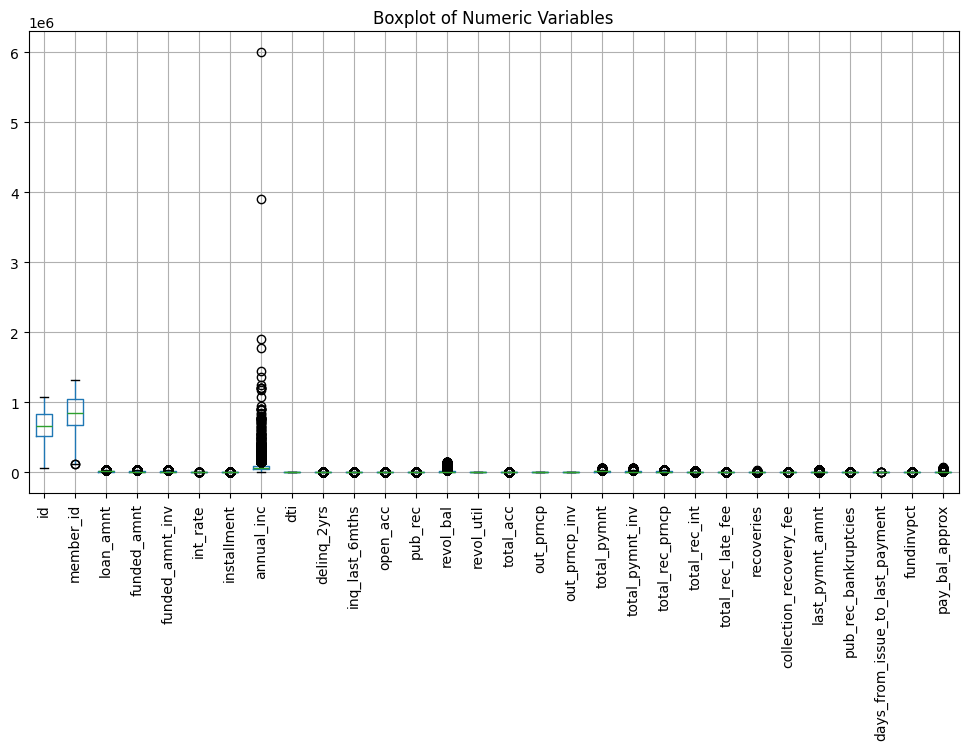

In [58]:
plt.figure(figsize=(12, 6))
df[numeric_vars].boxplot()
plt.title("Boxplot of Numeric Variables")
plt.xticks(rotation=90)
plt.show()

In [59]:

# Calculate IQR for numeric variables
Q1 = df[numeric_vars].quantile(0.25)
Q3 = df[numeric_vars].quantile(0.75)
IQR = Q3 - Q1


In [60]:
# Identify outliers for numeric variables
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
numeric_outliers = ((df[numeric_vars] < lower_bound) | (df[numeric_vars] > upper_bound))

# Replace outliers with median for numeric variables using .loc
for col in numeric_vars:
    df.loc[numeric_outliers[col], col] = df[col].median()


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3153811357.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '660865.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[numeric_outliers[col], col] = df[col].median()


Verifying the treatment of outliers with its median value

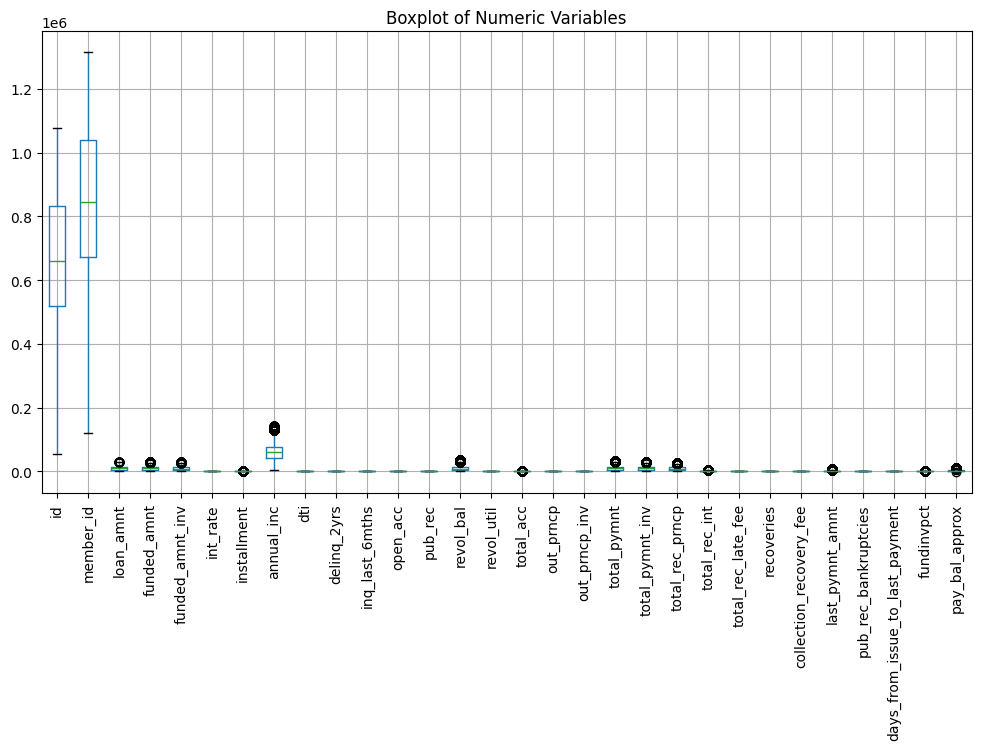

In [61]:
plt.figure(figsize=(12, 6))
df[numeric_vars].boxplot()
plt.title("Boxplot of Numeric Variables")
plt.xticks(rotation=90)
plt.show()

## <font color="Green">**Univariate Analysis**

In [82]:
interesting_variables=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','revol_bal',
                       'revol_util','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_prncp', 'fundinvpct', 'pay_bal_approx', 'days_from_issue_to_last_payment']

Variable :  loan_amnt
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
             count          mean          std    min     25%      50%  \
loan_amnt  35318.0  10475.677417  6284.183912  500.0  5500.0  10000.0   

               75%      95%      99%      max  
loan_amnt  14500.0  24000.0  25000.0  29175.0  
                                                                        
                                                                        
Data Distribution


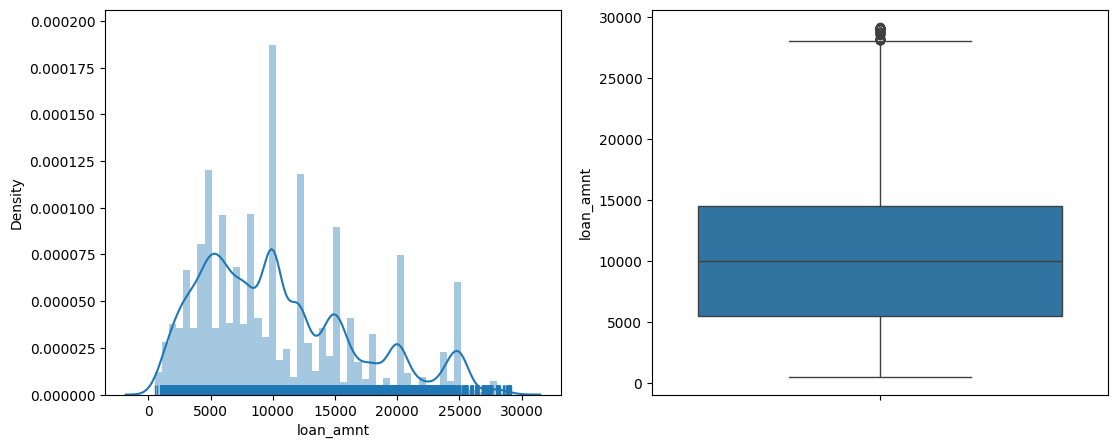

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  funded_amnt
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
               count          mean          std    min     25%     50%  \
funded_amnt  35318.0  10293.889093  6136.044653  500.0  5500.0  9600.0   

                 75%      95%      99%      max  
funded_amnt  14000.0  24000.0  25000.0  29175.0  
                                                                        
                                                                        
Data Distribution


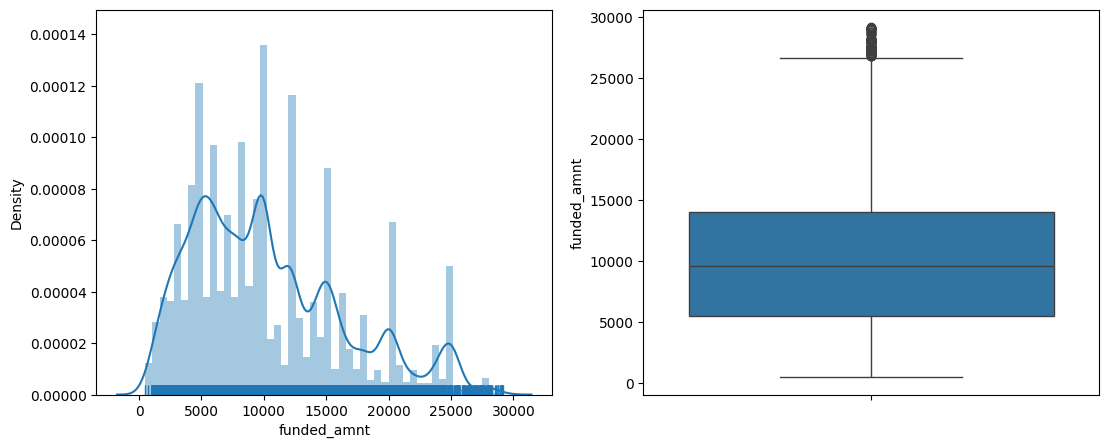

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  funded_amnt_inv
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
                   count         mean         std  min     25%     50%  \
funded_amnt_inv  35318.0  9872.055566  6055.89573  0.0  5000.0  9000.0   

                     75%           95%      99%          max  
funded_amnt_inv  13600.0  22521.159763  25000.0  28249.91598  
                                                                        
                                                                        
Data Distribution


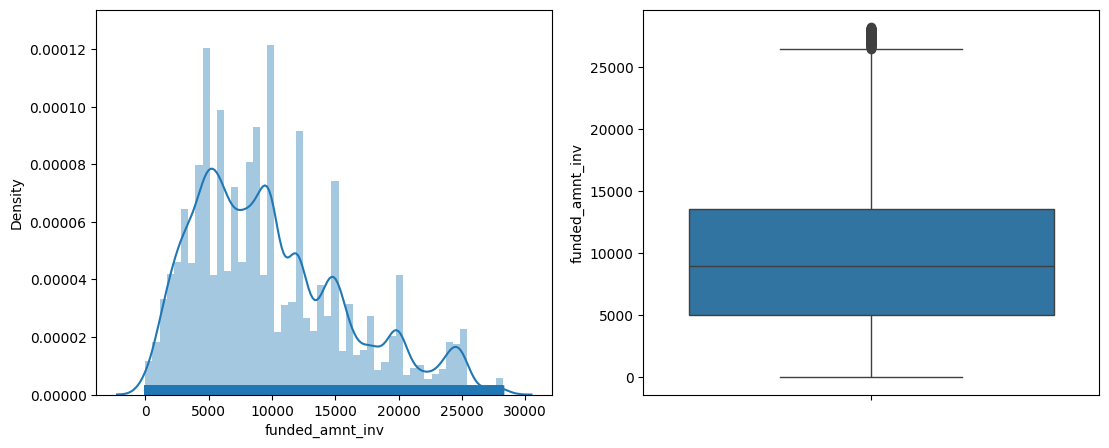

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  int_rate
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
            count       mean       std   min   25%    50%    75%   95%    99%  \
int_rate  35318.0  11.967739  3.678089  5.42  8.94  11.83  14.46  18.3  20.89   

            max  
int_rate  22.74  
                                                                        
                                                                        
Data Distribution


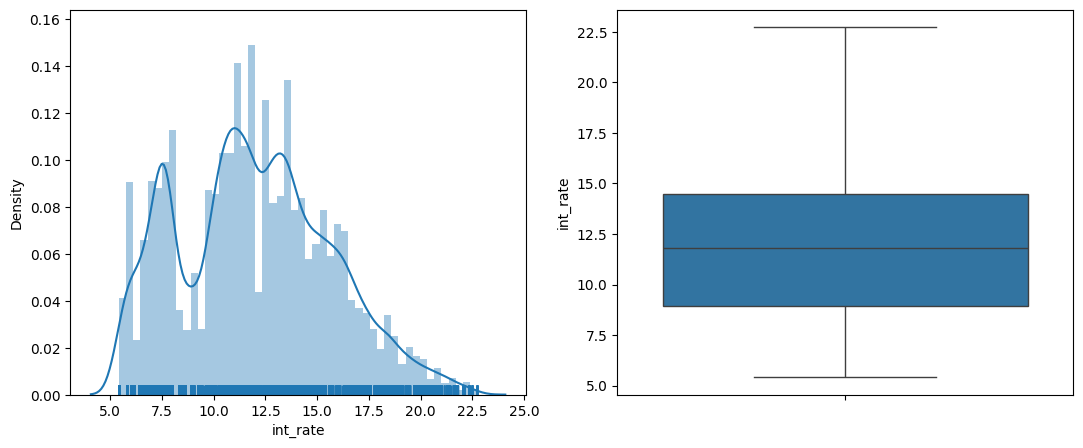

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  installment
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
               count        mean         std    min       25%     50%  \
installment  35318.0  301.476967  172.013099  16.08  167.8325  280.55   

                  75%     95%       99%     max  
installment  397.3575  653.48  778.5781  814.34  
                                                                        
                                                                        
Data Distribution


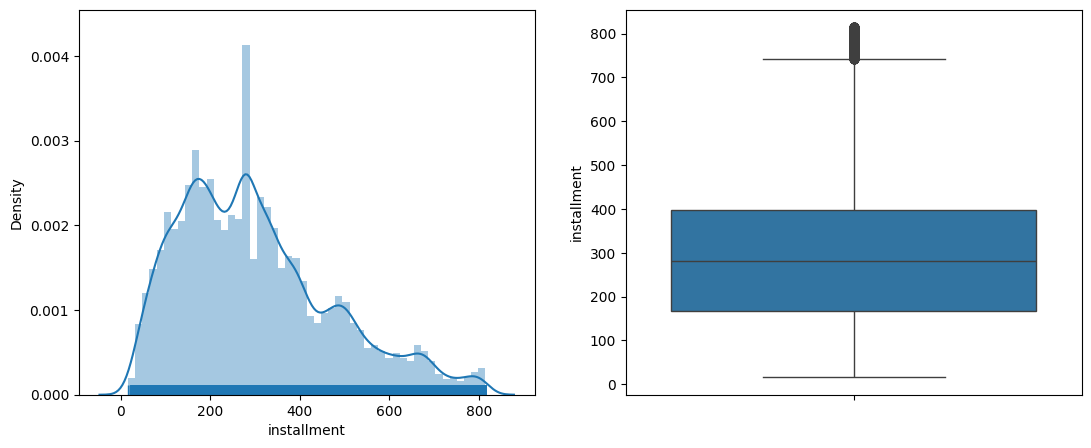

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  annual_inc
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
              count          mean           std     min      25%      50%  \
annual_inc  35318.0  61571.767712  27027.471816  4000.0  41500.0  60000.0   

                 75%        95%       99%       max  
annual_inc  76666.75  116800.25  135000.0  143500.0  
                                                                        
                                                                        
Data Distribution


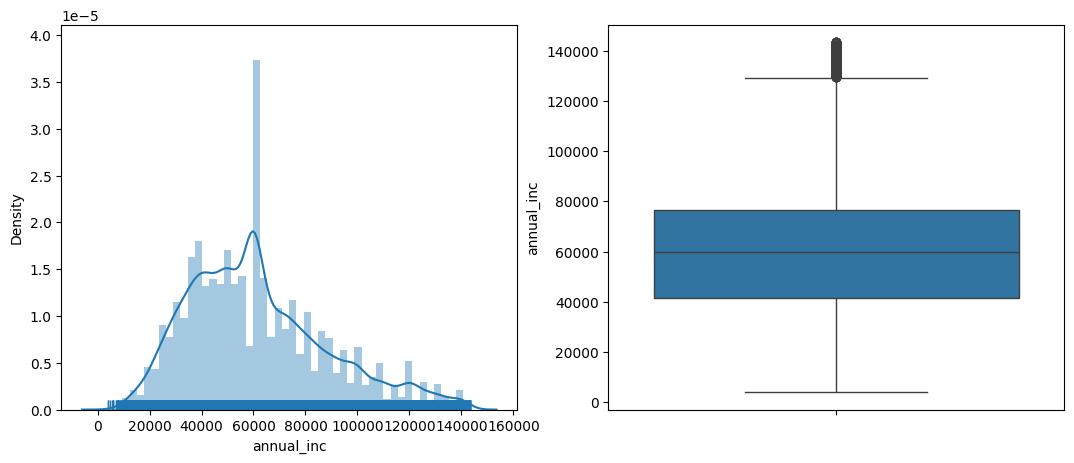

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  dti
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
       count       mean       std  min   25%   50%    75%    95%    99%    max
dti  35318.0  13.402925  6.636268  0.0  8.32  13.5  18.64  23.83  26.53  29.99
                                                                        
                                                                        
Data Distribution


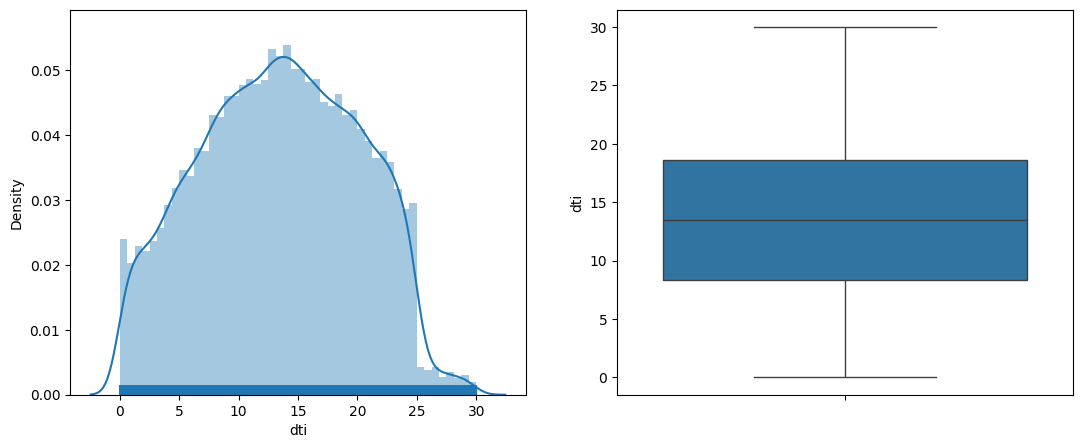

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  revol_bal
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
             count          mean          std  min     25%     50%      75%  \
revol_bal  35318.0  10192.839459  8233.593143  0.0  3777.5  8930.0  14390.0   

               95%       99%      max  
revol_bal  27496.9  34523.13  36960.0  
                                                                        
                                                                        
Data Distribution


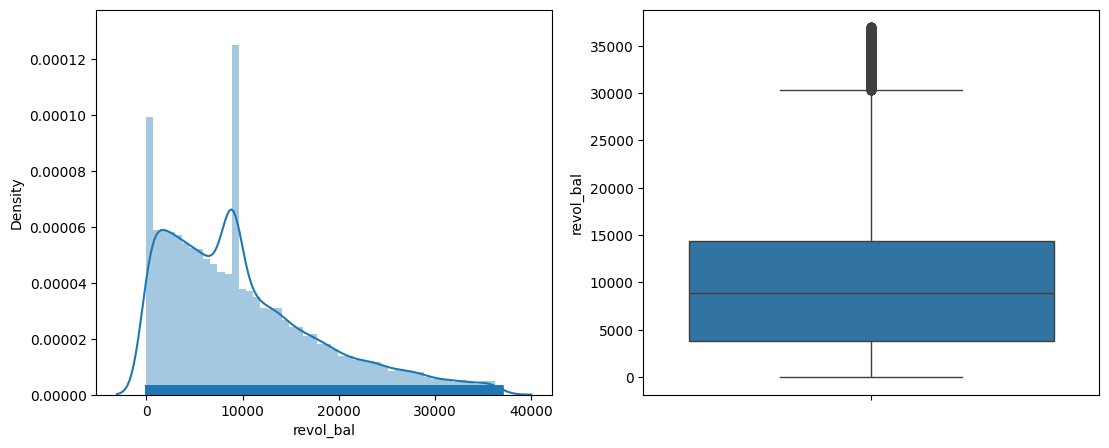

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  revol_util
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
              count       mean        std  min   25%   50%   75%   95%   99%  \
revol_util  35318.0  49.138094  28.227408  0.0  25.9  49.7  72.6  93.6  98.5   

             max  
revol_util  99.9  
                                                                        
                                                                        
Data Distribution


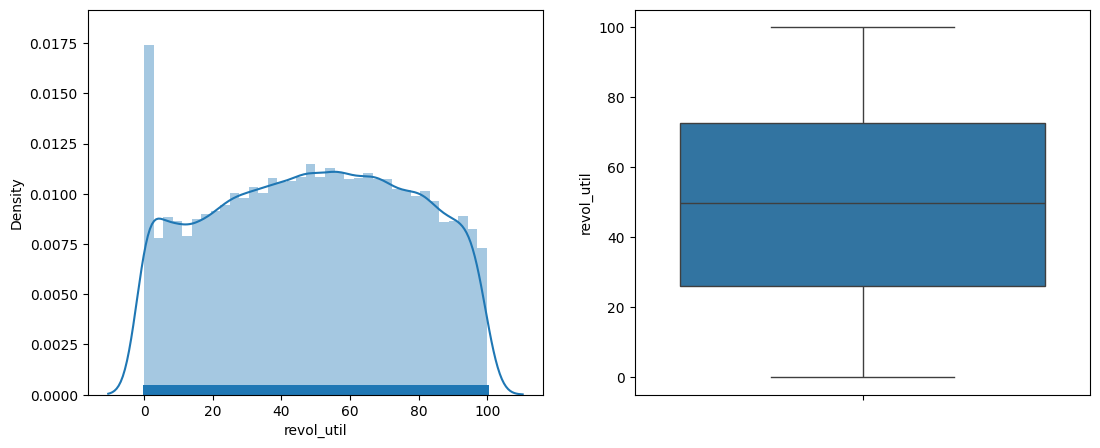

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  total_pymnt
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
               count          mean         std    min          25%  \
total_pymnt  35318.0  11058.616997  7188.21432  33.73  5601.351907   

                     50%           75%           95%           99%  \
total_pymnt  9862.787785  15070.699652  25918.882509  30765.094371   

                     max  
total_pymnt  32327.05127  
                                                                        
                                                                        
Data Distribution


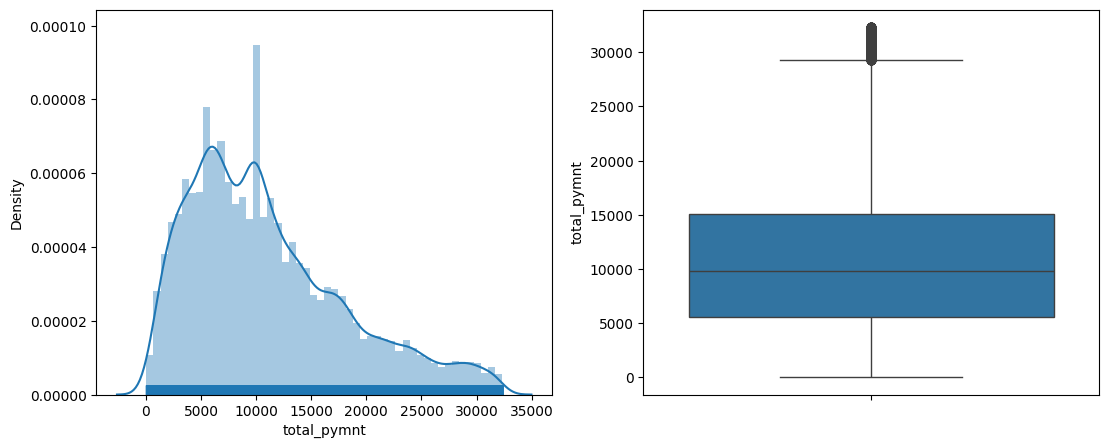

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  total_pymnt_inv
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
                   count          mean          std  min        25%  \
total_pymnt_inv  35318.0  10495.157463  6919.969642  0.0  5318.4275   

                       50%         75%        95%         99%       max  
total_pymnt_inv  9393.5475  14337.0675  24676.441  29507.7404  31051.12  
                                                                        
                                                                        
Data Distribution


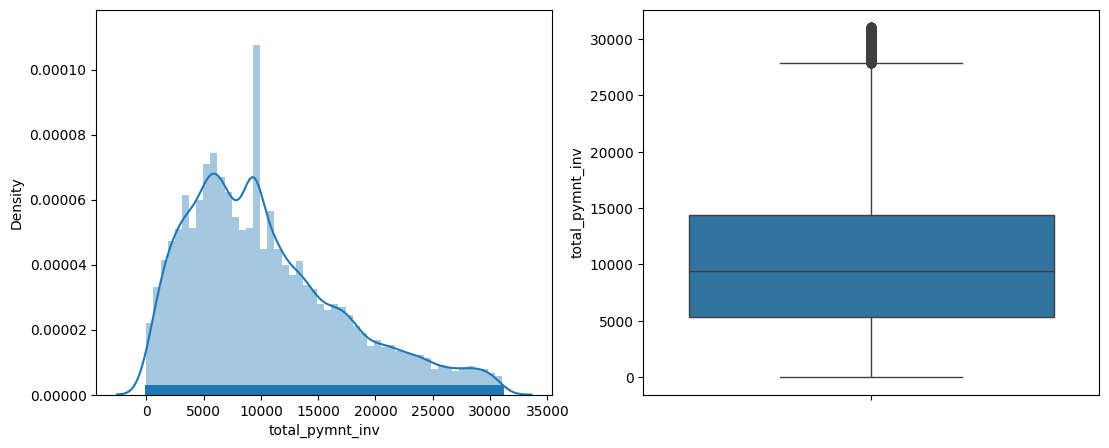

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  total_rec_prncp
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
                   count         mean          std  min     25%     50%  \
total_rec_prncp  35318.0  9182.694691  6052.305441  0.0  4750.0  8000.0   

                        75%      95%      99%      max  
total_rec_prncp  12394.0025  21000.0  25000.0  26575.0  
                                                                        
                                                                        
Data Distribution


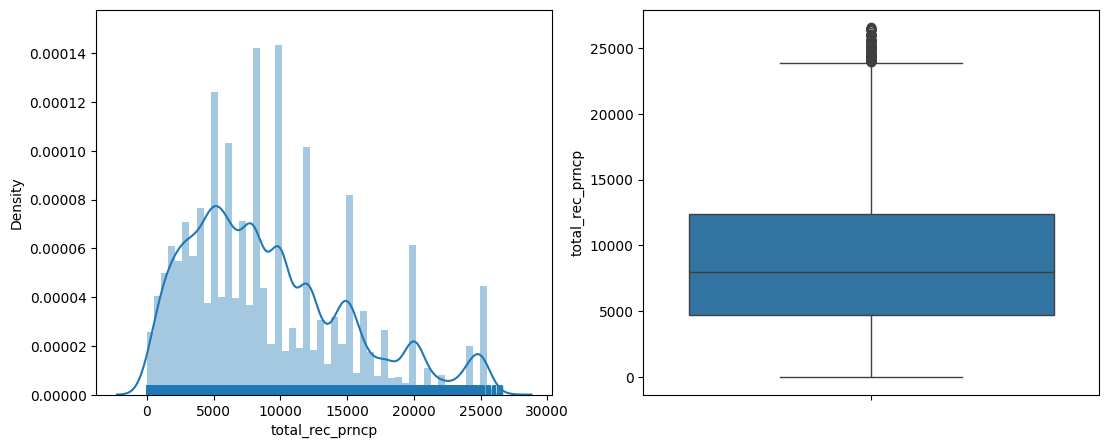

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  total_rec_prncp
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
                   count         mean          std  min     25%     50%  \
total_rec_prncp  35318.0  9182.694691  6052.305441  0.0  4750.0  8000.0   

                        75%      95%      99%      max  
total_rec_prncp  12394.0025  21000.0  25000.0  26575.0  
                                                                        
                                                                        
Data Distribution


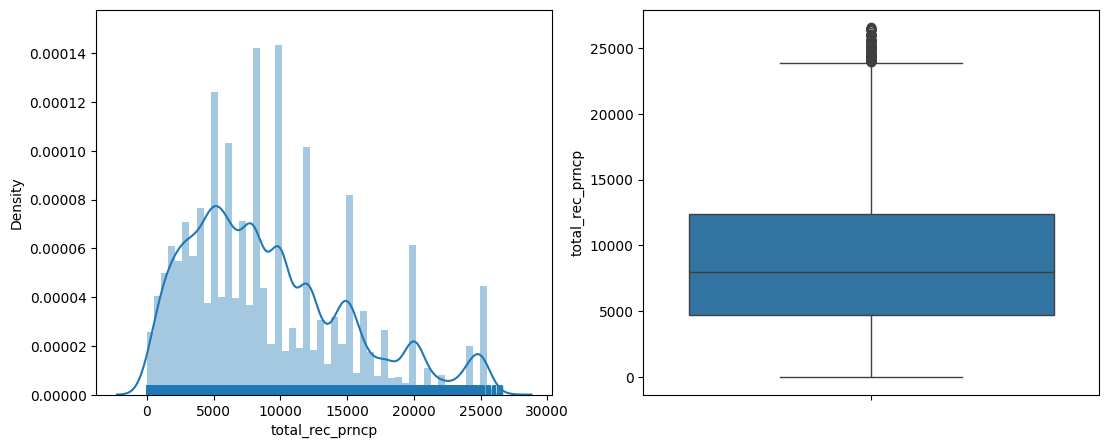

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  fundinvpct
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
              count      mean      std     min        25%    50%    75%  \
fundinvpct  35318.0  99.68736  0.63853  96.875  99.736806  100.0  100.0   

              95%    99%    max  
fundinvpct  100.0  100.0  100.0  
                                                                        
                                                                        
Data Distribution


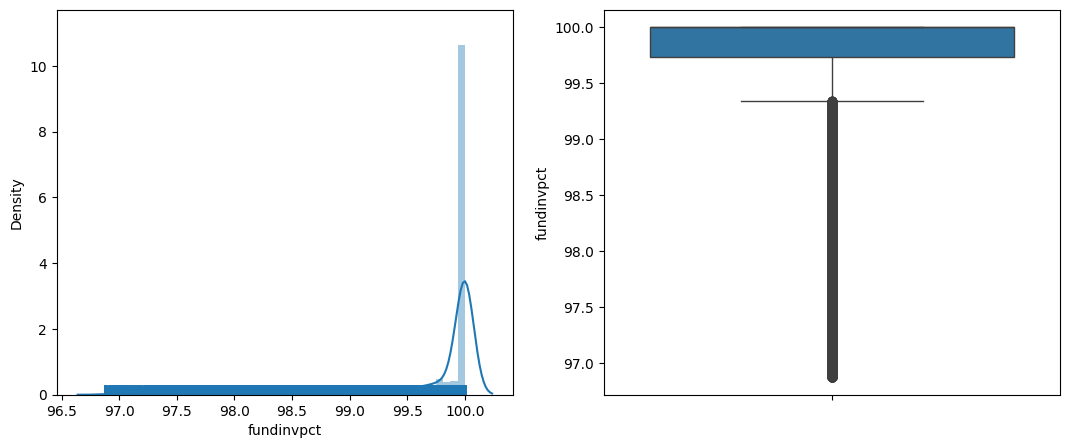

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  pay_bal_approx
**********************************************************************


C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\501573061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
                  count         mean          std         min         25%  \
pay_bal_approx  35318.0  2405.547174  2044.697332 -3112.59594  960.512018   

                        50%         75%          95%          99%         max  
pay_bal_approx  1948.766145  3069.38277  7112.167915  9143.732387  9815.91522  
                                                                        
                                                                        
Data Distribution


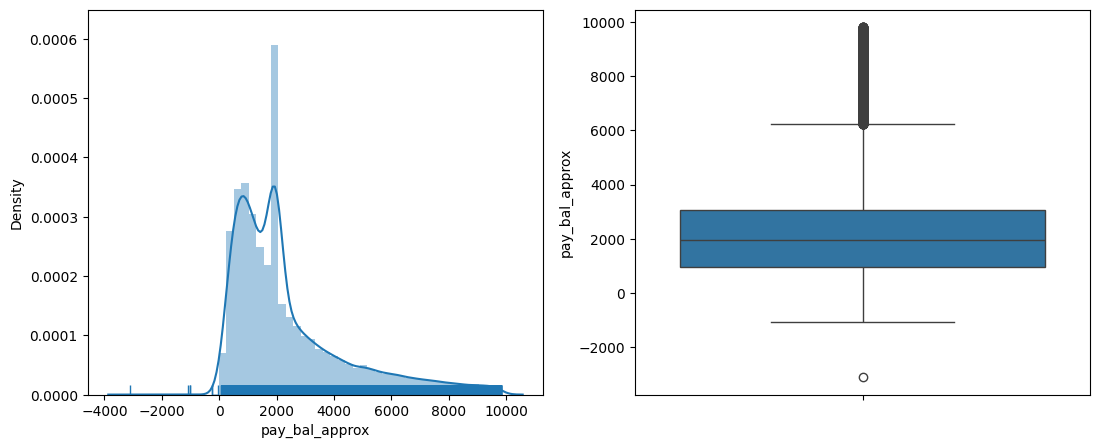

======================================================================End=============================================================================
                                                                        
                                                                        


In [63]:
for i in interesting_variables:
    print("Variable : ",i)
    print("**********************************************************************")
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    p1 = sns.distplot(df[i], rug=True)
    plt.subplot(1,3,2)
    p2 =sns.boxplot(df[i], orient="V")
    print("Descriptive statistics : ")
    print("************************************************************************")
    print("                                                                        ")
    print(pd.DataFrame(df[i].describe(percentiles=[0.25,0.75,0.95,0.99])).T)
    print("                                                                        ")
    print("                                                                        ")
    print("Data Distribution")
    plt.show()
    print("======================================================================End=============================================================================")
    print("                                                                        ")
    print("                                                                        ")

Observations

## <font color="Green">**Categorical Variables Analysis**

In [80]:
cat_variable_list = ['loan_status','term','grade', 'sub_grade','emp_length', 'home_ownership','verification_status','purpose', 'addr_state','addr_state','issue_d_year', 'issue_d_month','earliest_cr_line_year', 'earliest_cr_line_month', 'last_pymnt_d_year', 'last_credit_pull_d_year']

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


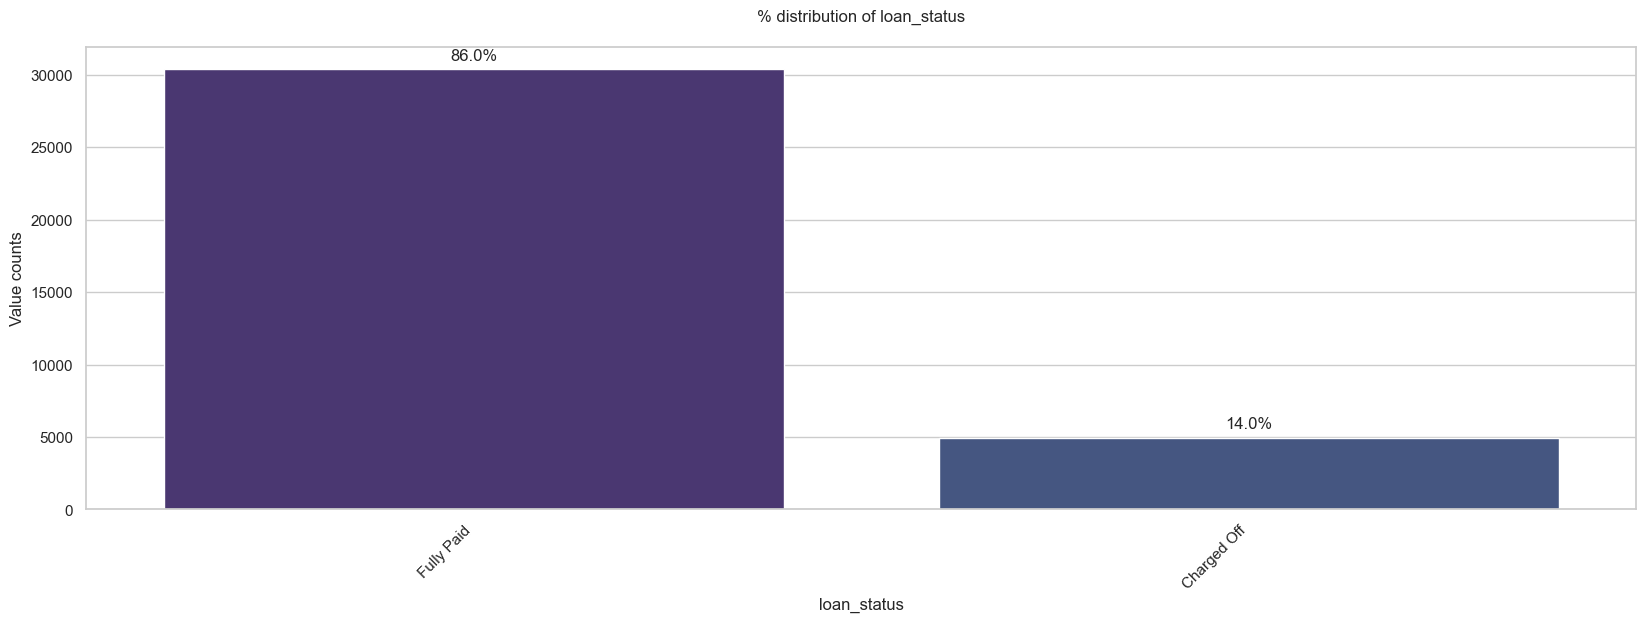

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


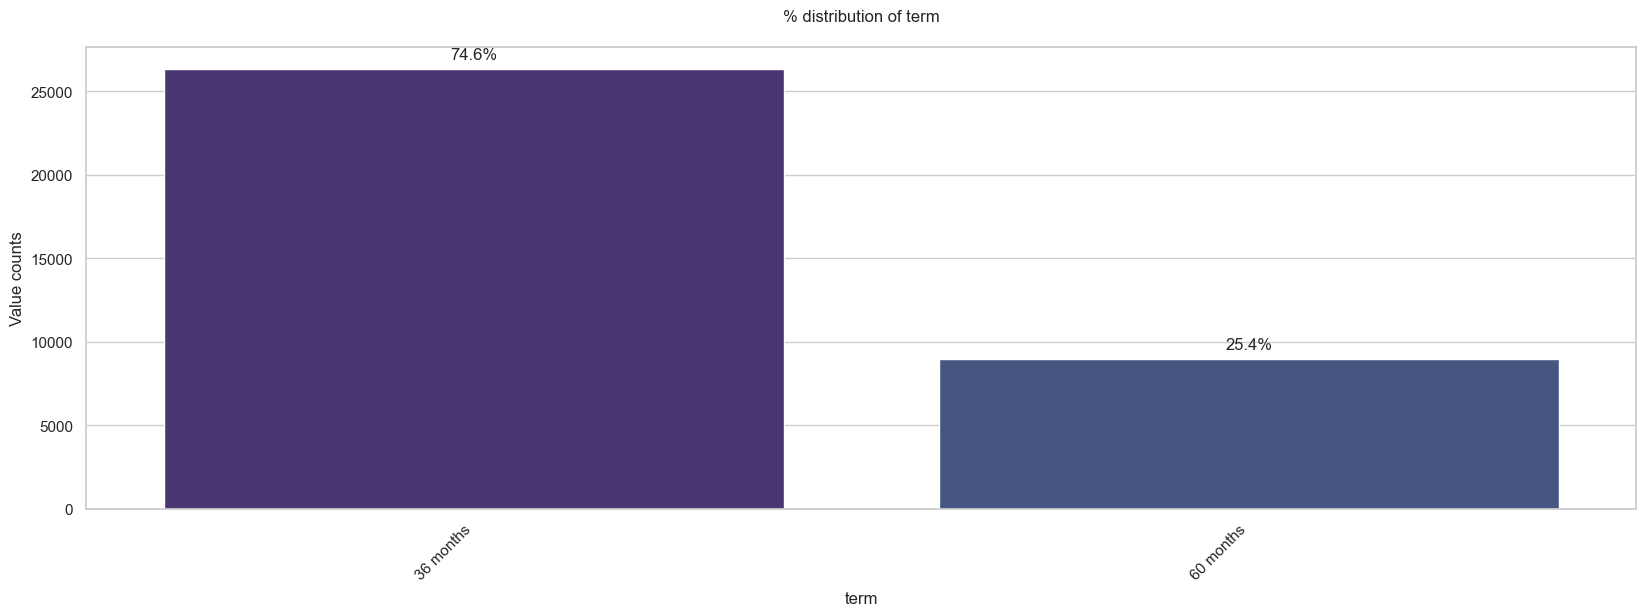

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


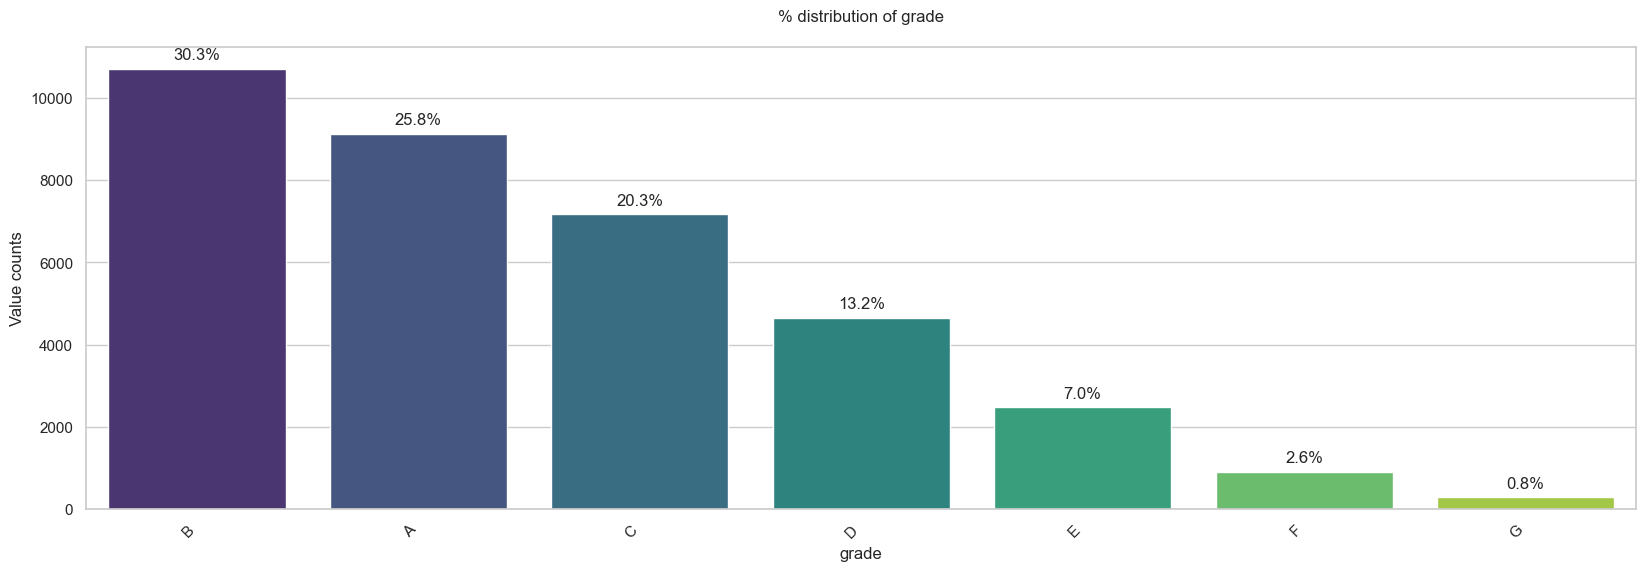

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (35) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


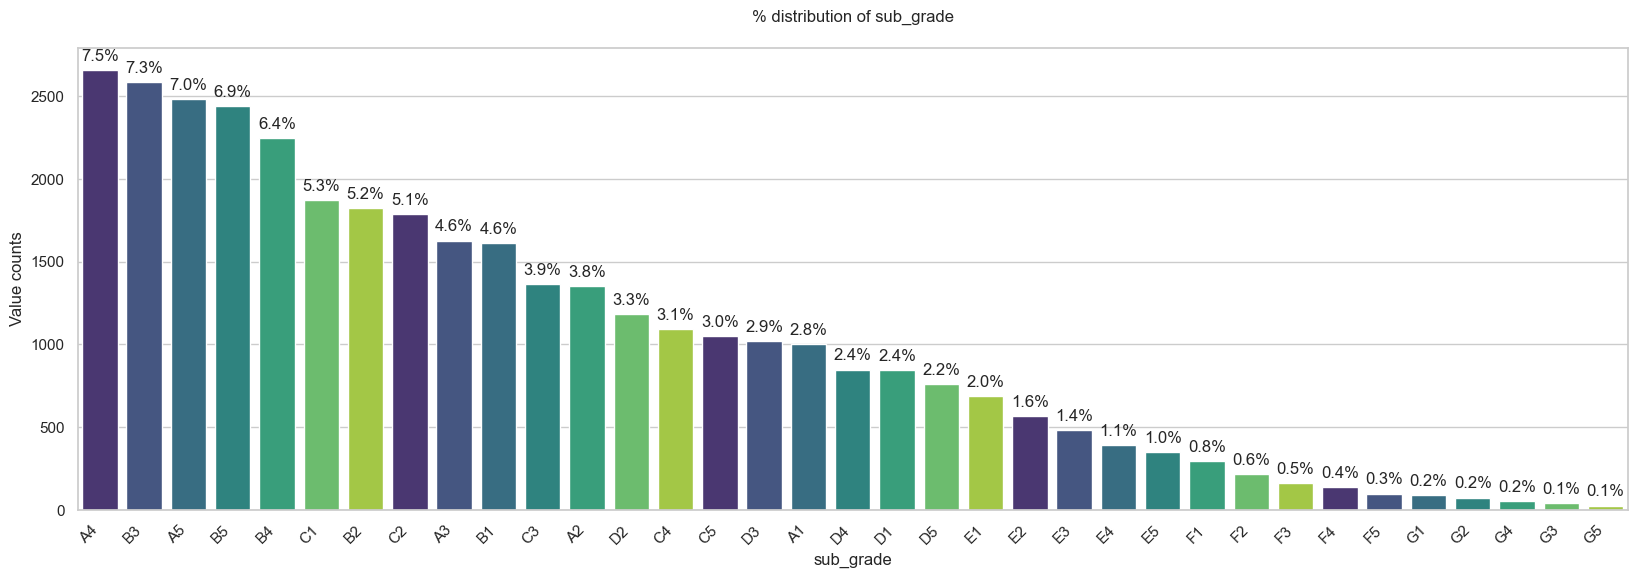

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


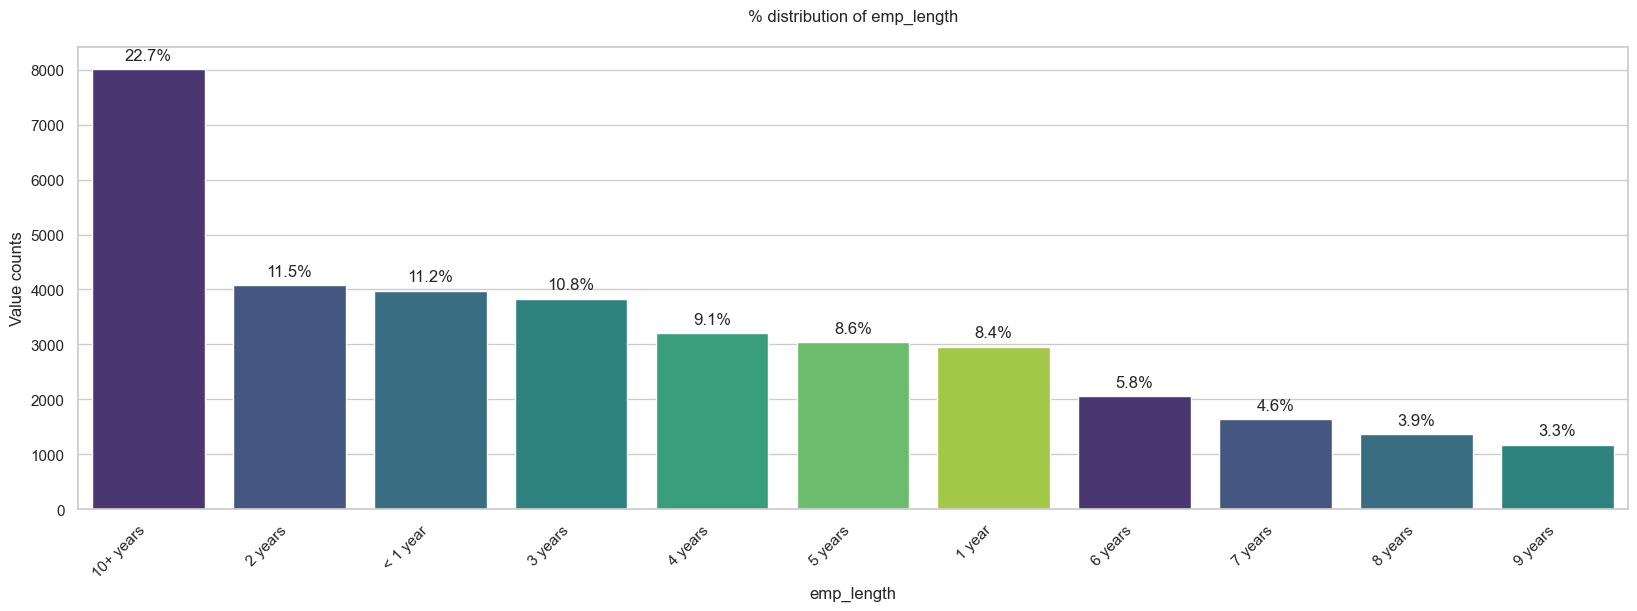

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


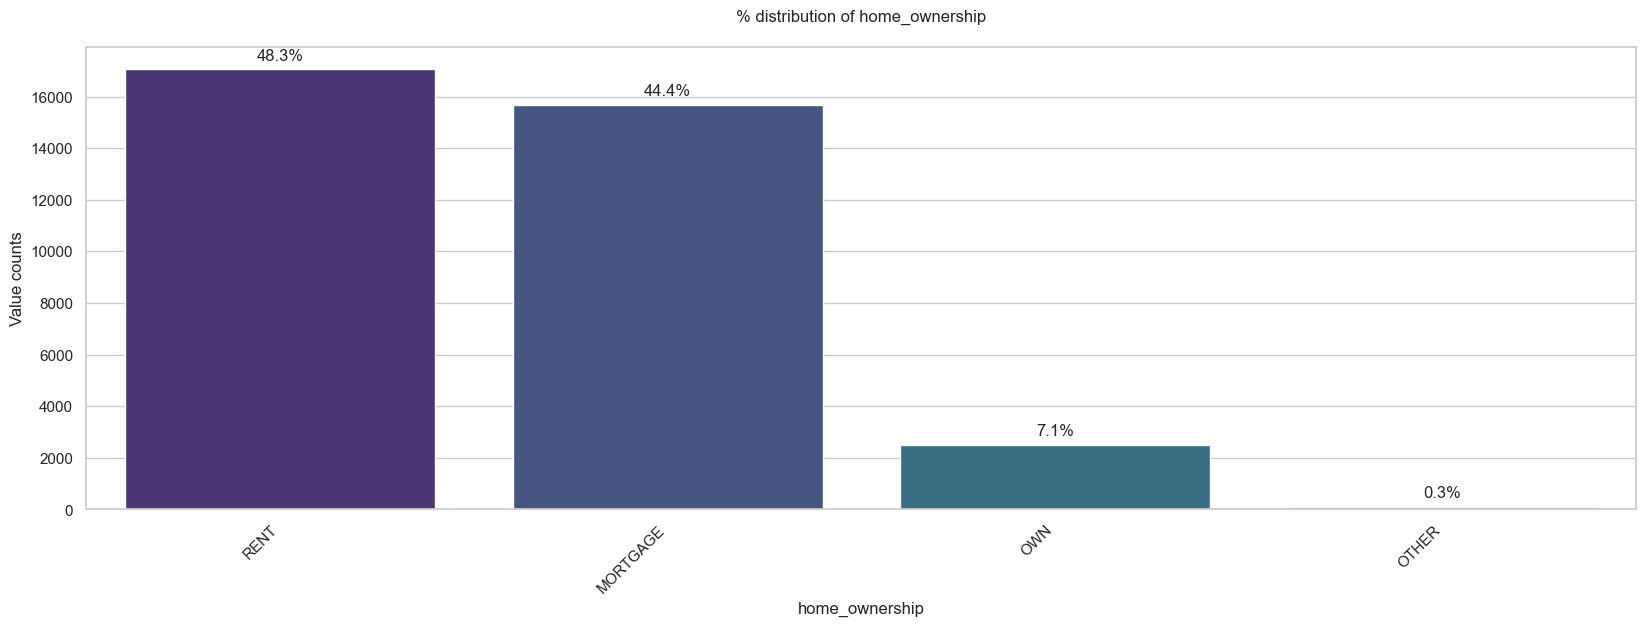

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


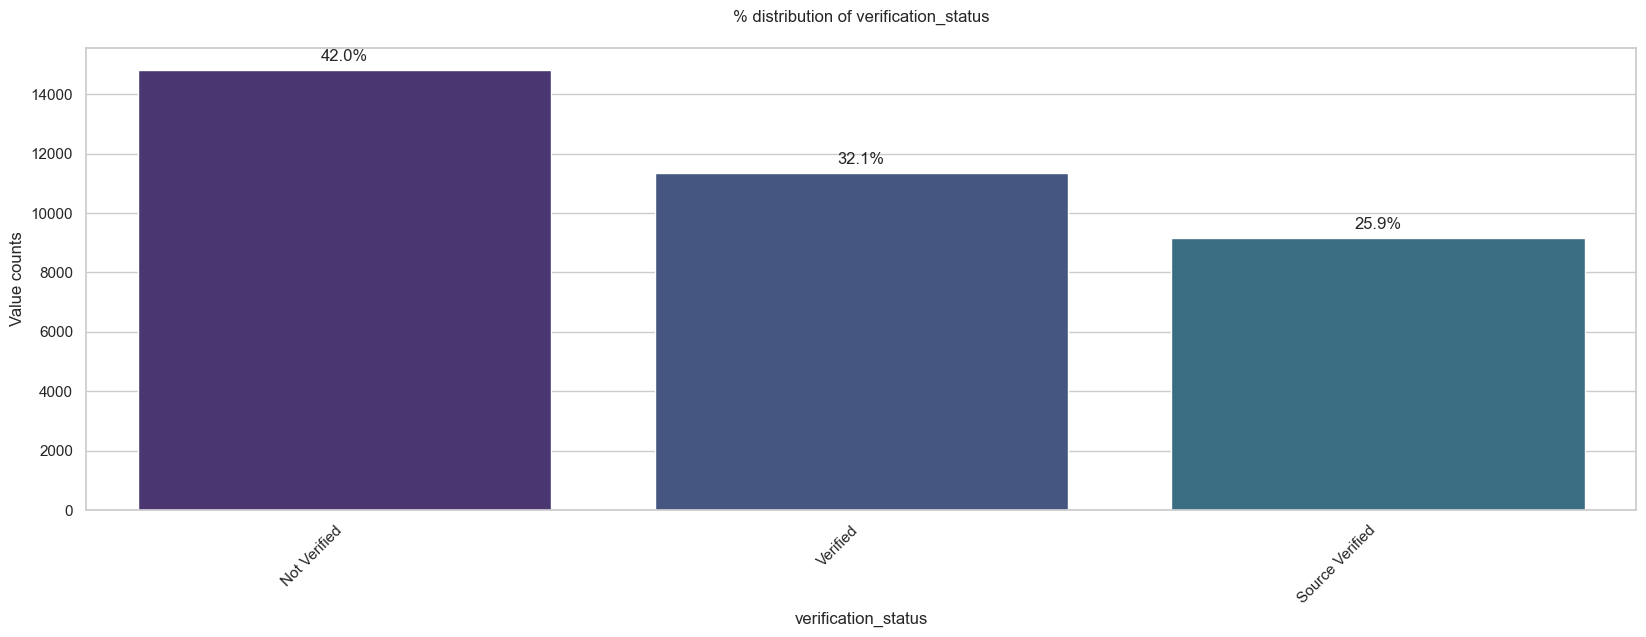

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


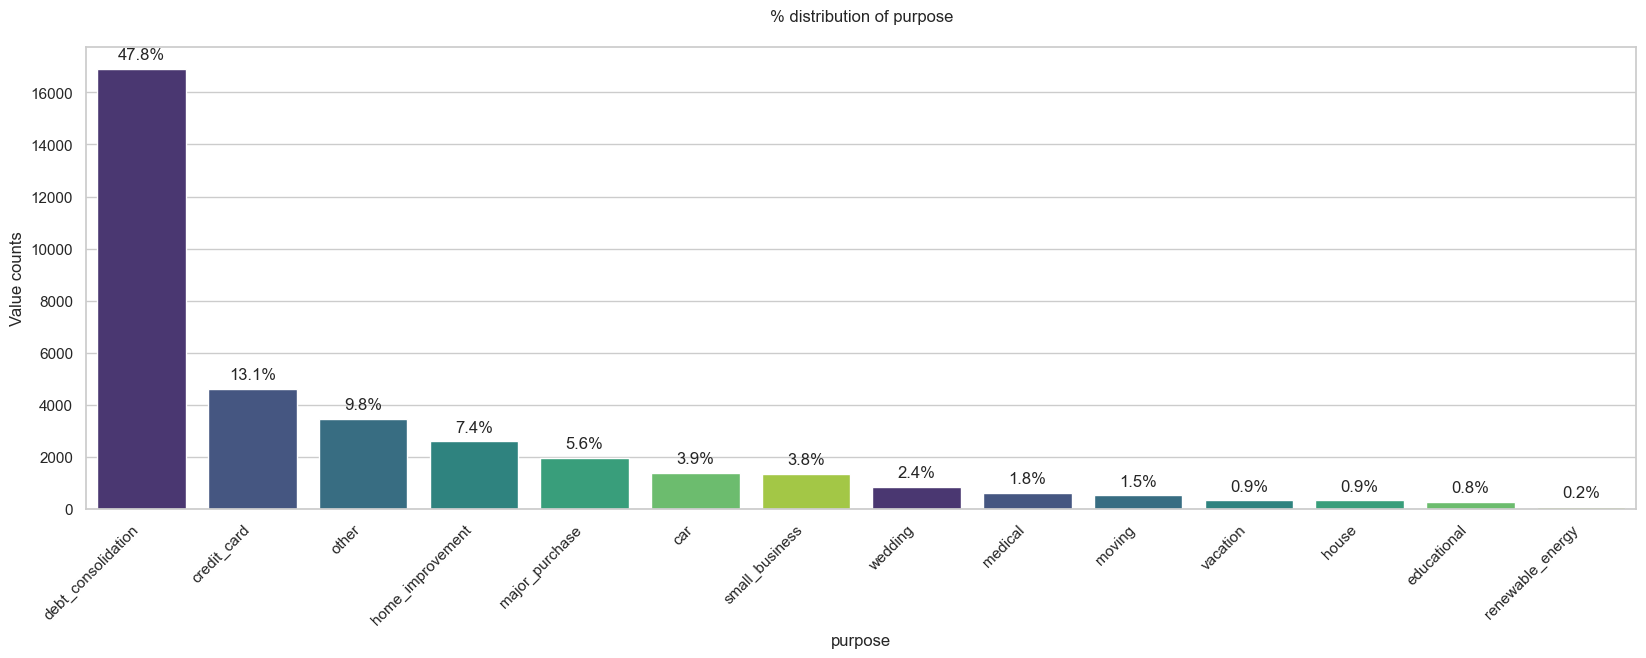

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (49) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


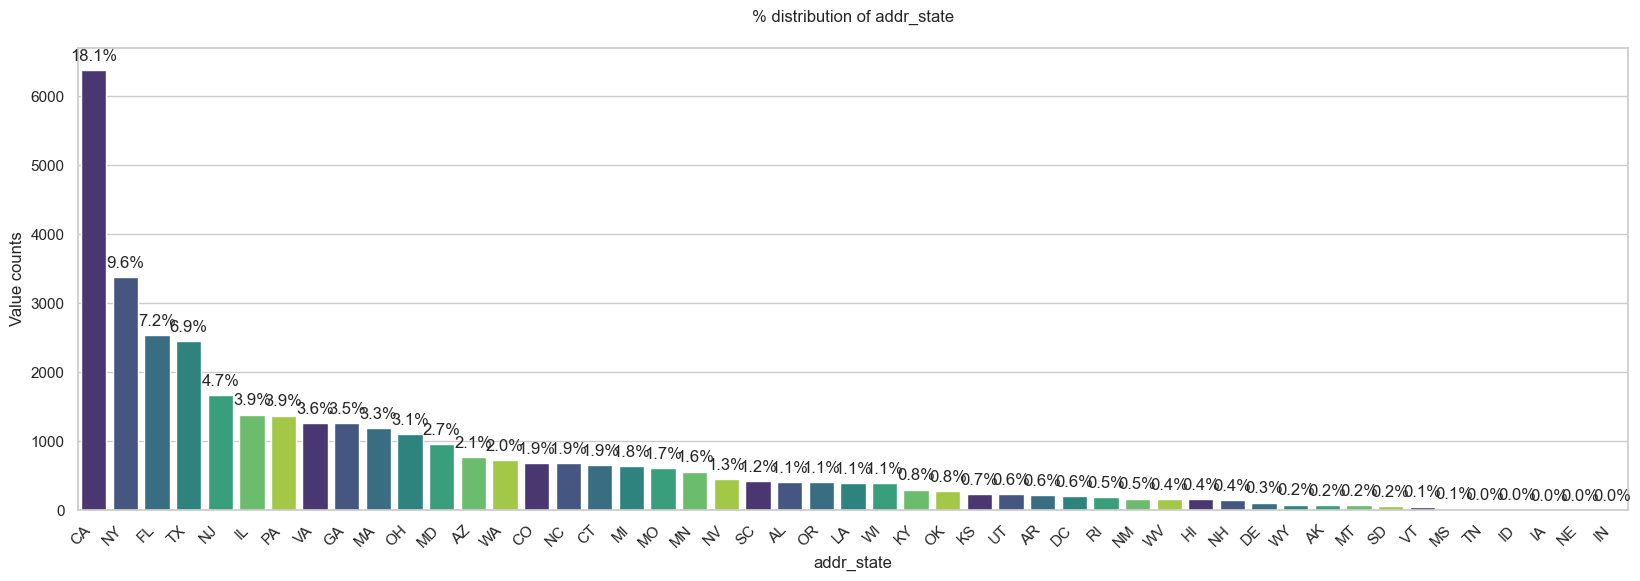

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (49) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


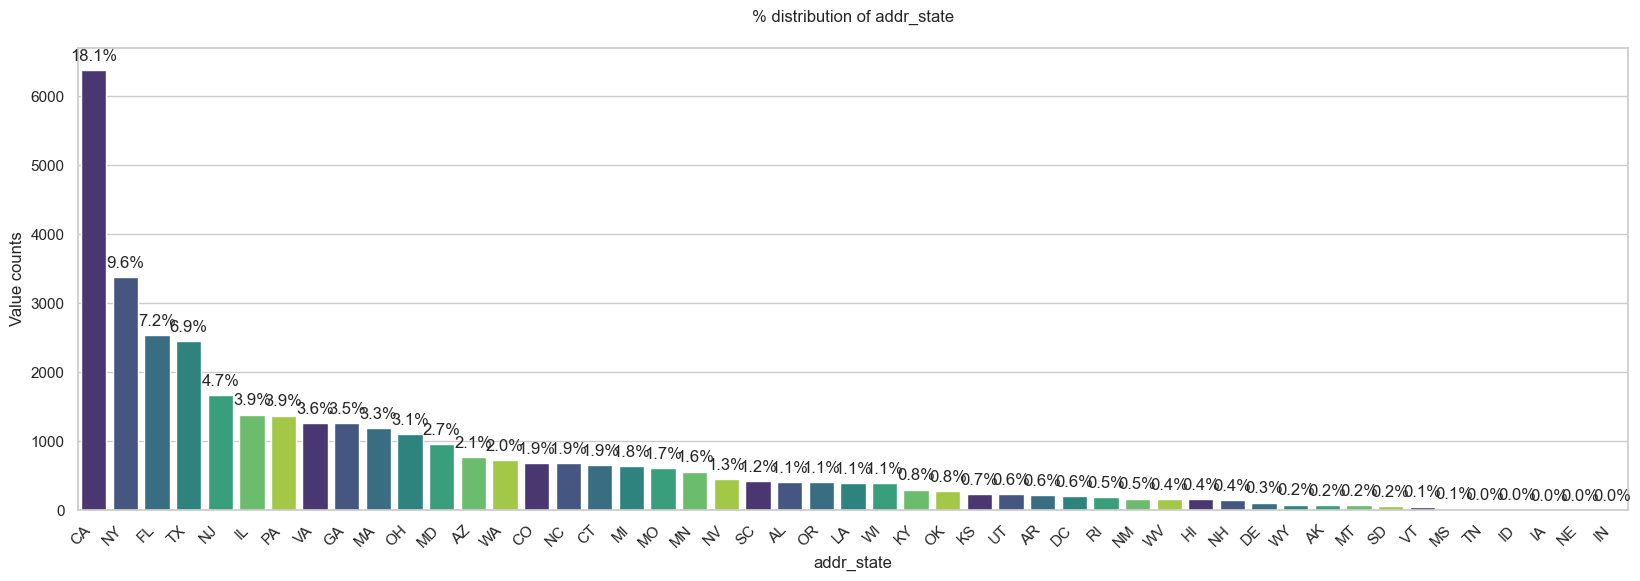

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


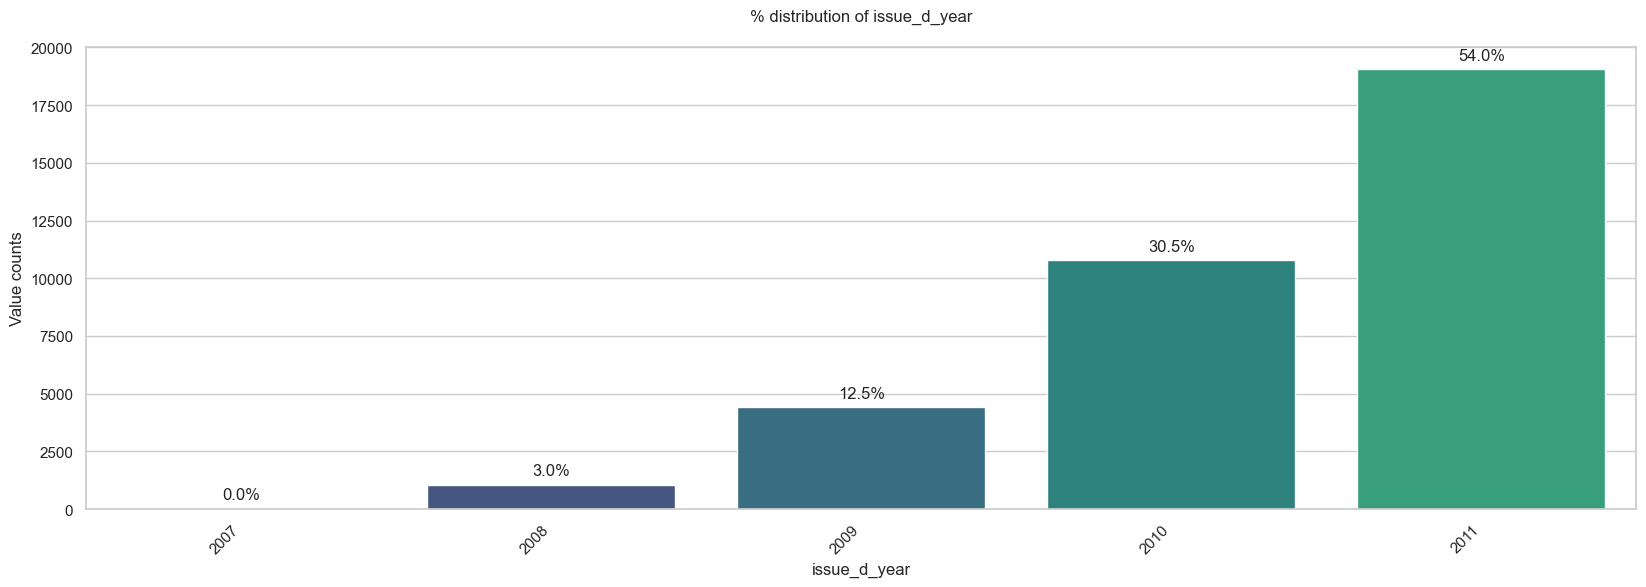

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


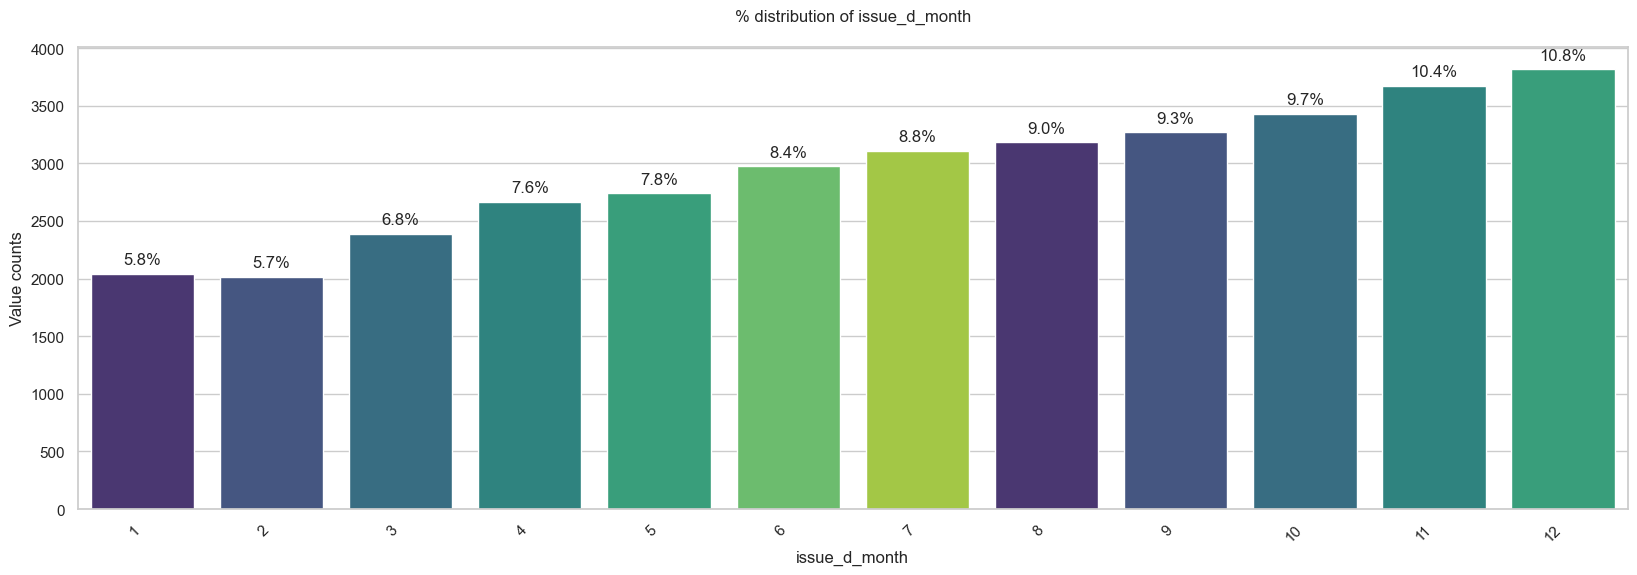

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (40) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


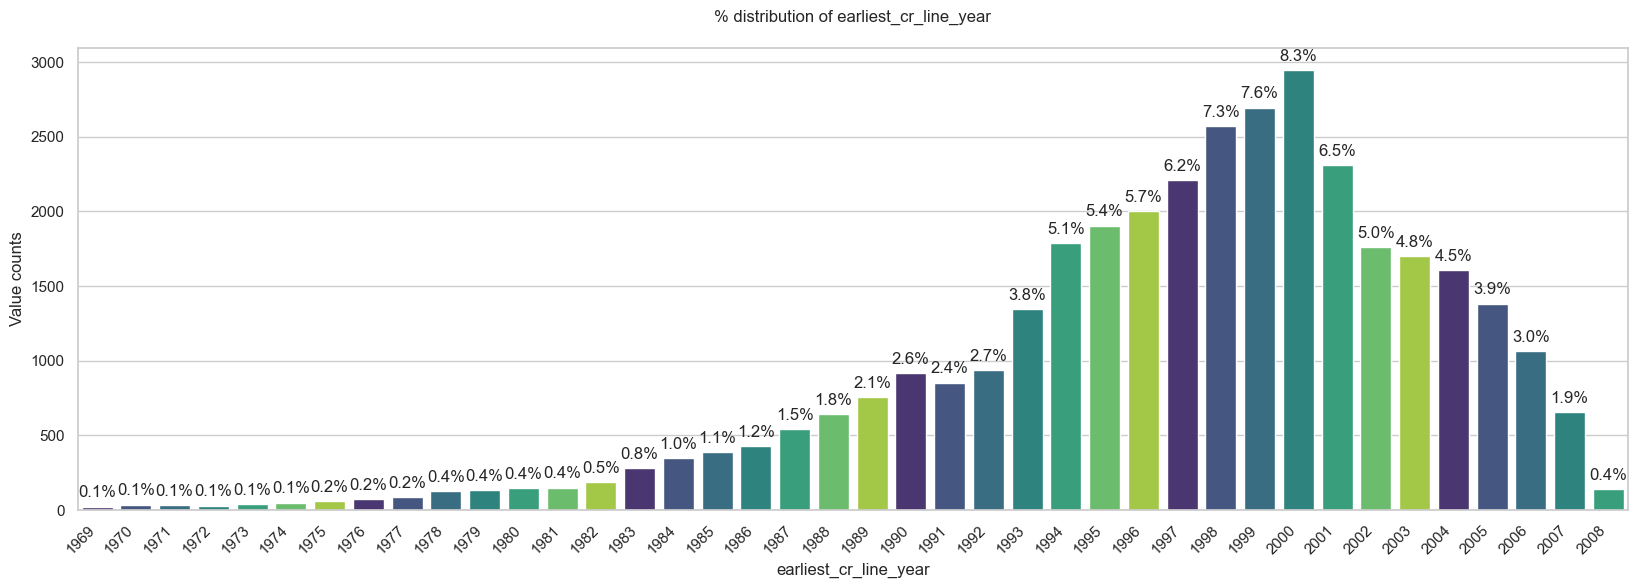

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


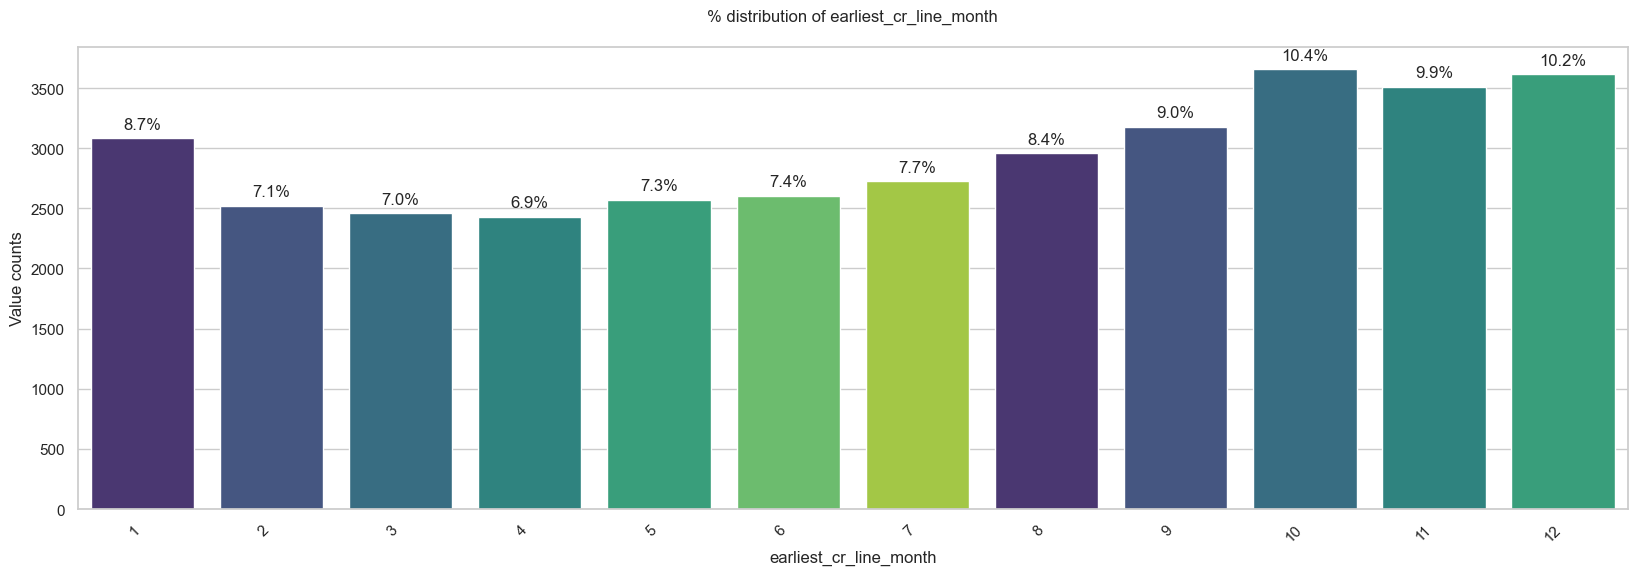

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


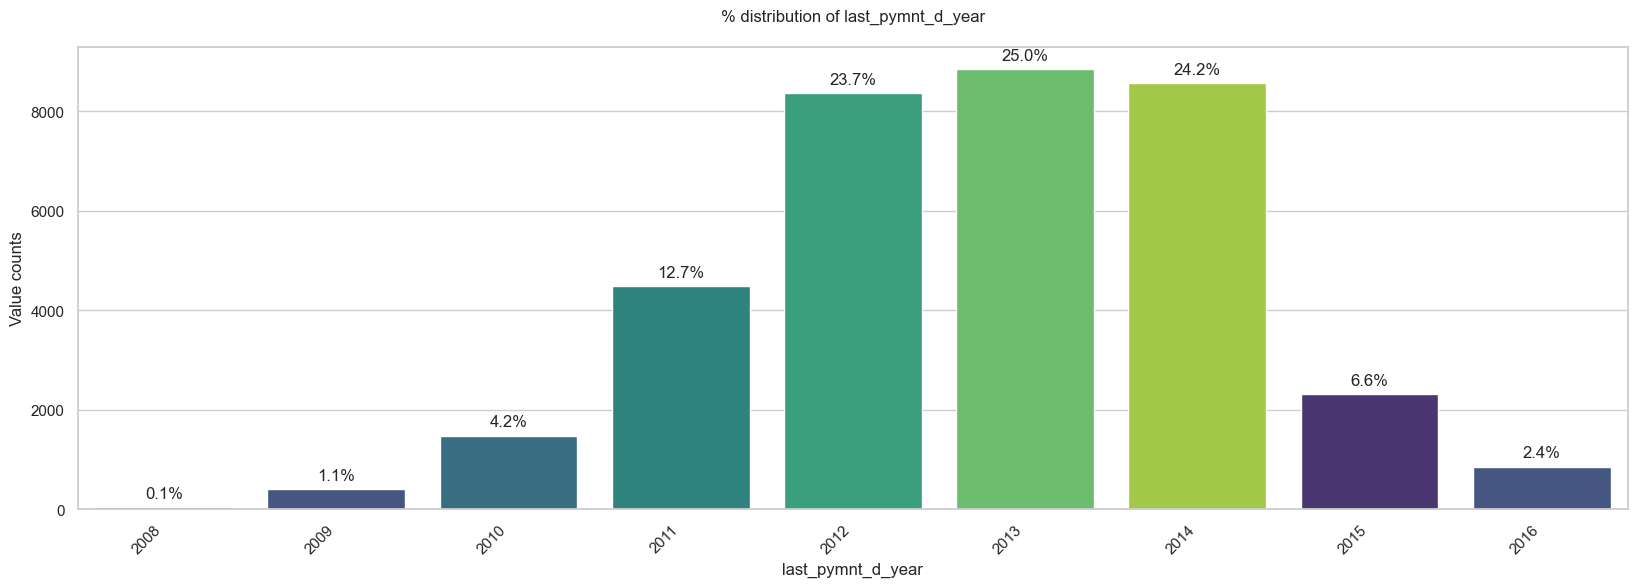

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:7: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\1267070633.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability


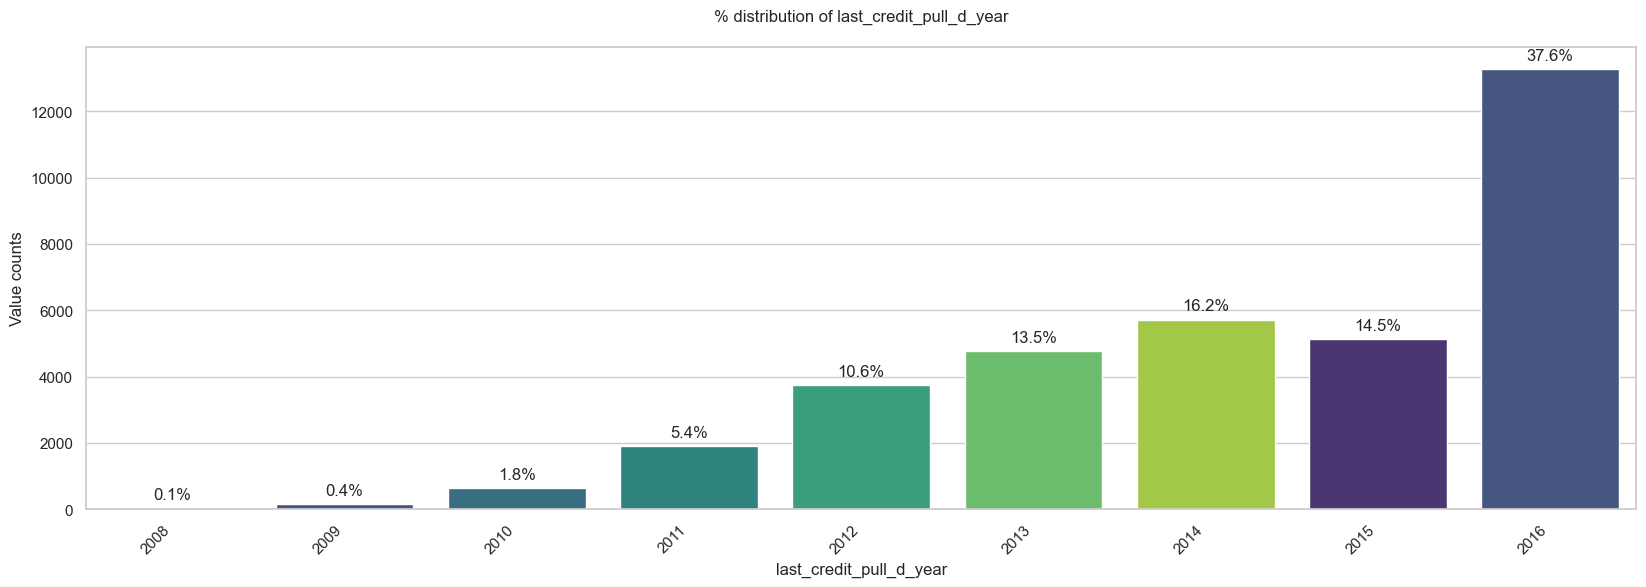

In [81]:
# Define a color palette
colors = sns.color_palette('viridis', len(df['grade'].unique()))  # Using 'viridis' palette for example

for i in cat_variable_list:
    plt.figure(figsize=(20, 6))
    plt.title("% distribution of " + i + "\n")
    ax = sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=colors)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Set x-axis labels and rotate for better readability
    ax.set_xlabel(i)
    ax.set_ylabel("Value counts")# Set x-axis label
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height() / df.shape[0] * 100), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

observations

## <font color="Green">**Bivariate Analysis**

#### <font color="Green">**Bivariate Analysis of Categorical columns against Laon Amount**

In [74]:
#cat_variable_list = ['loan_status','term','grade','emp_length', 'home_ownership','verification_status','issue_d_year', 'issue_d_month','addr_state','delinq_2yrs','earliest_cr_line_year']

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


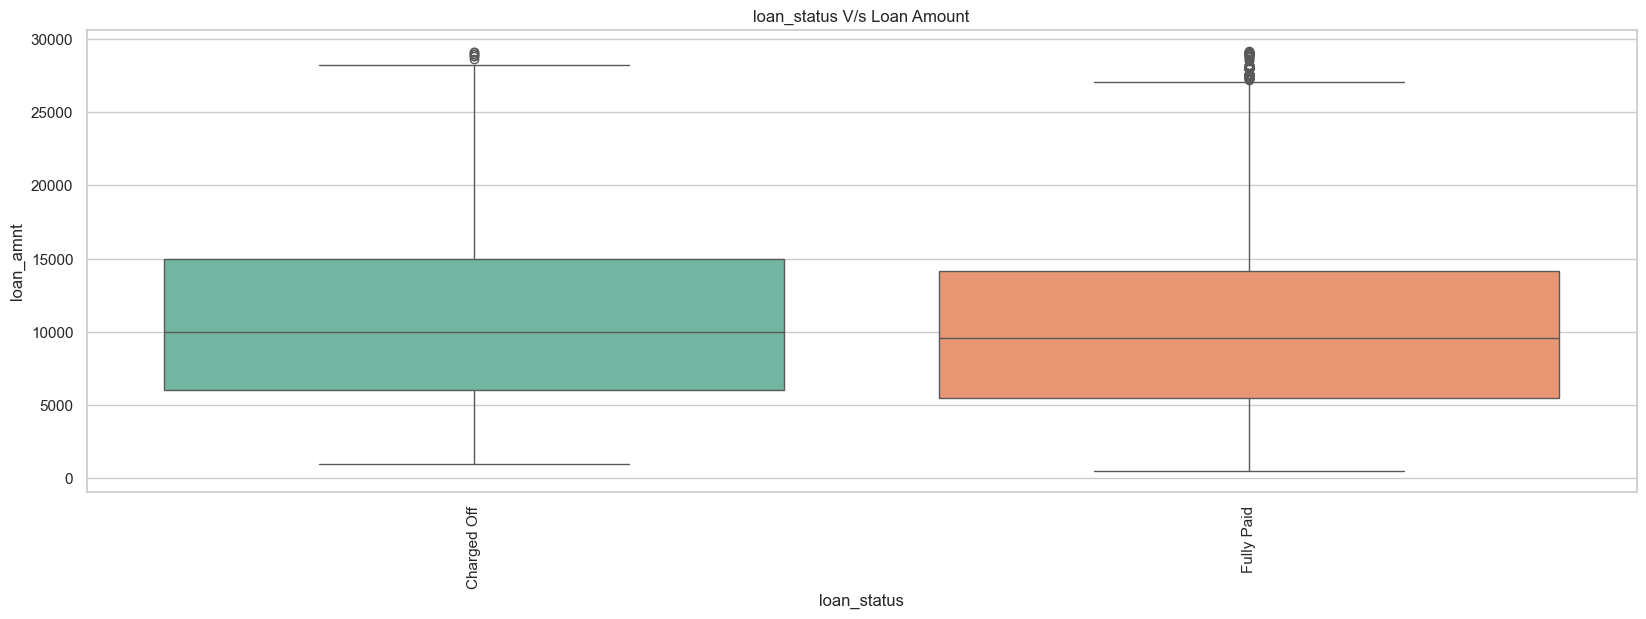

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


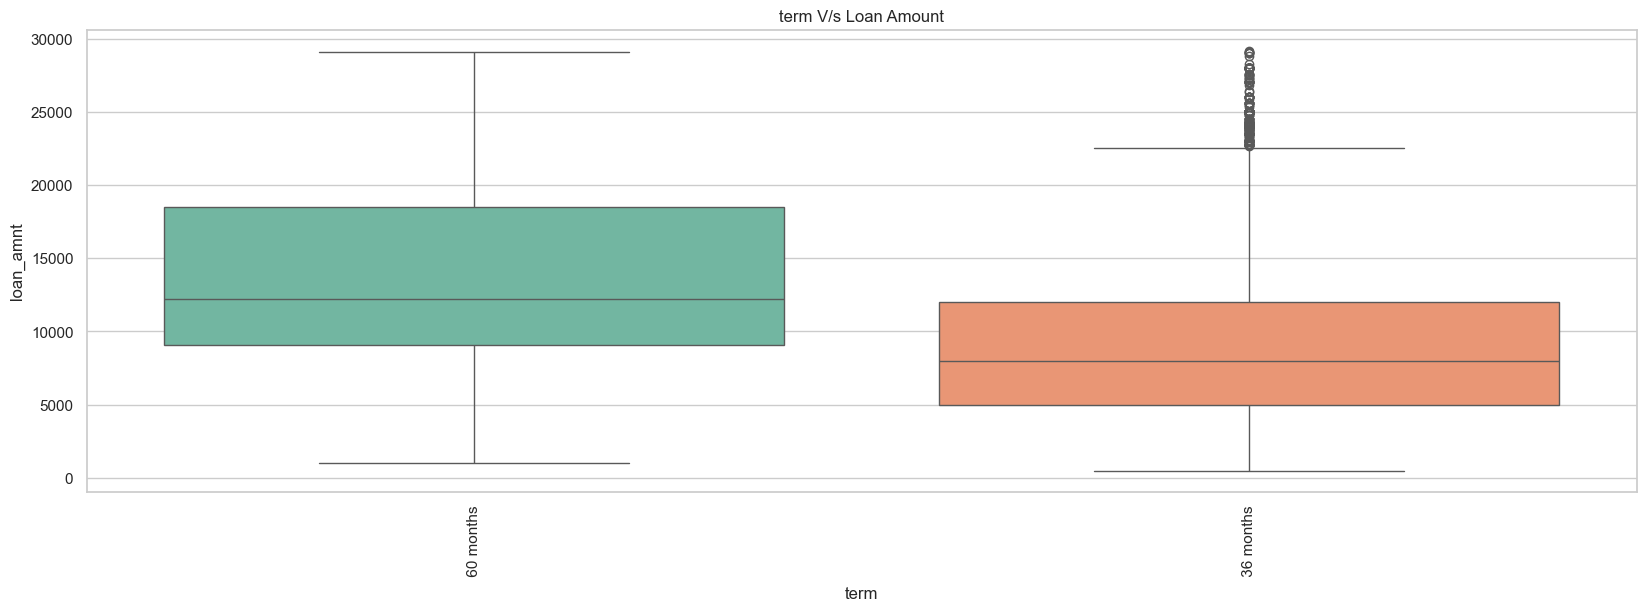

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


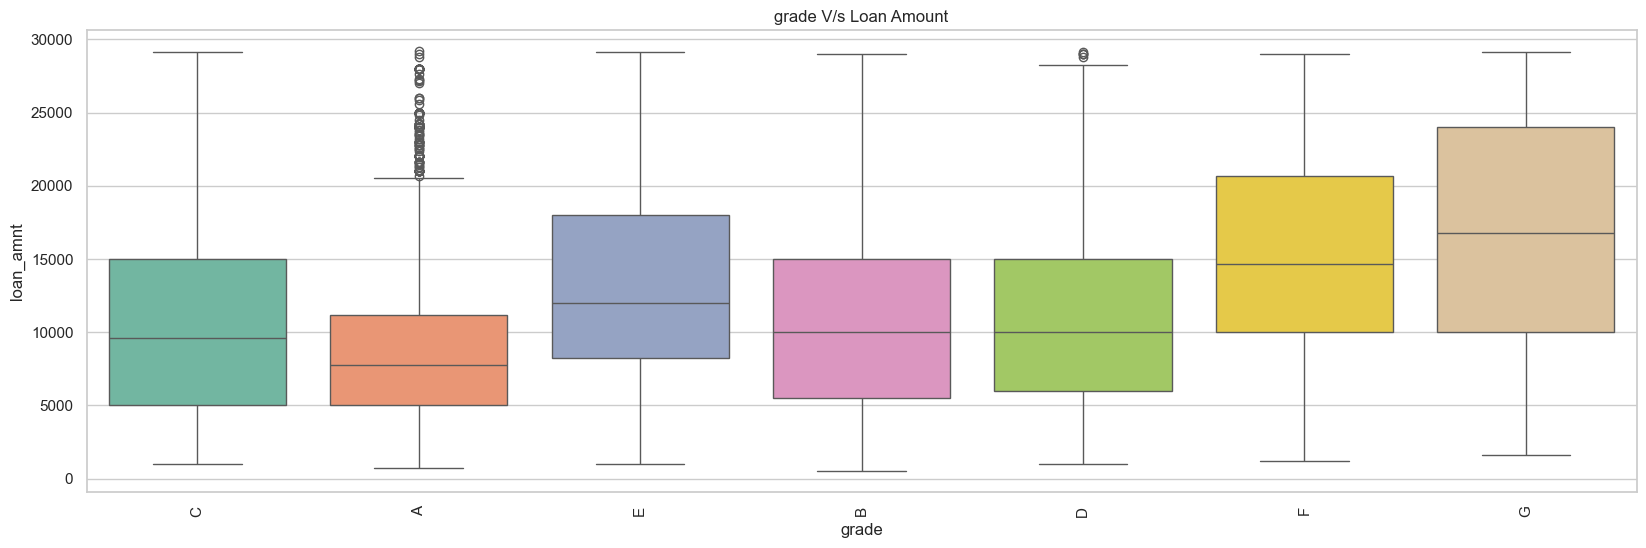

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


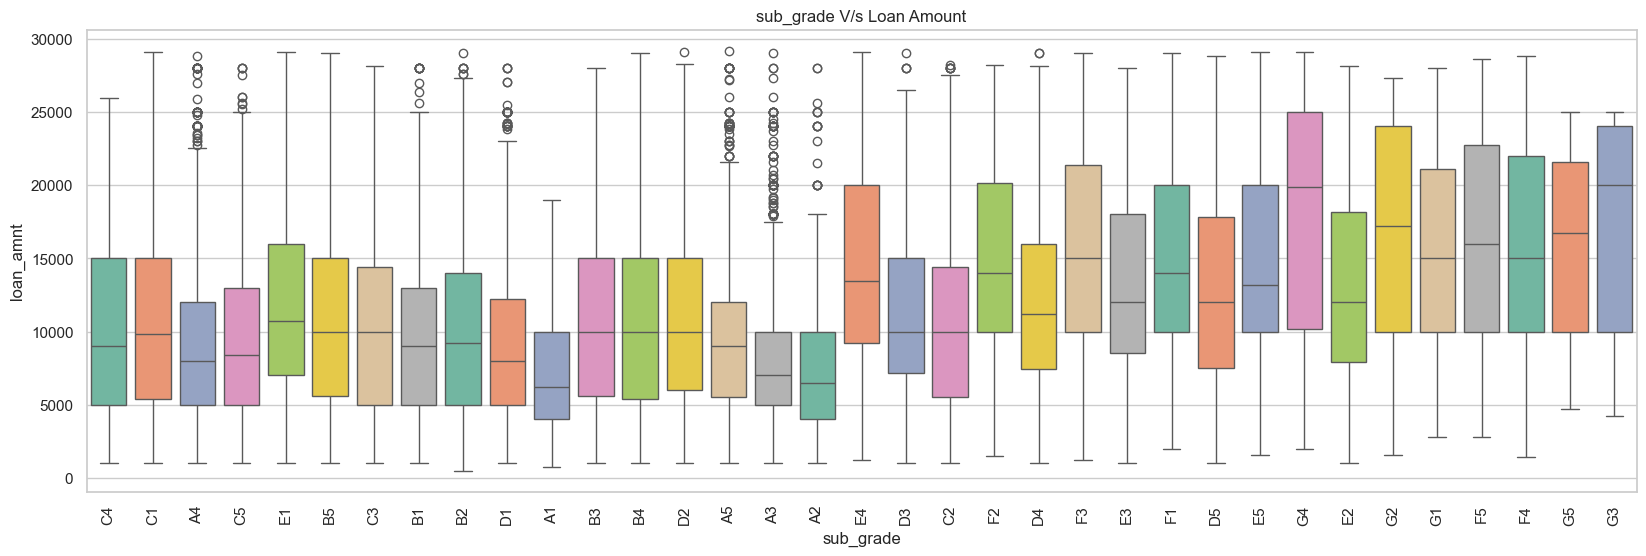

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


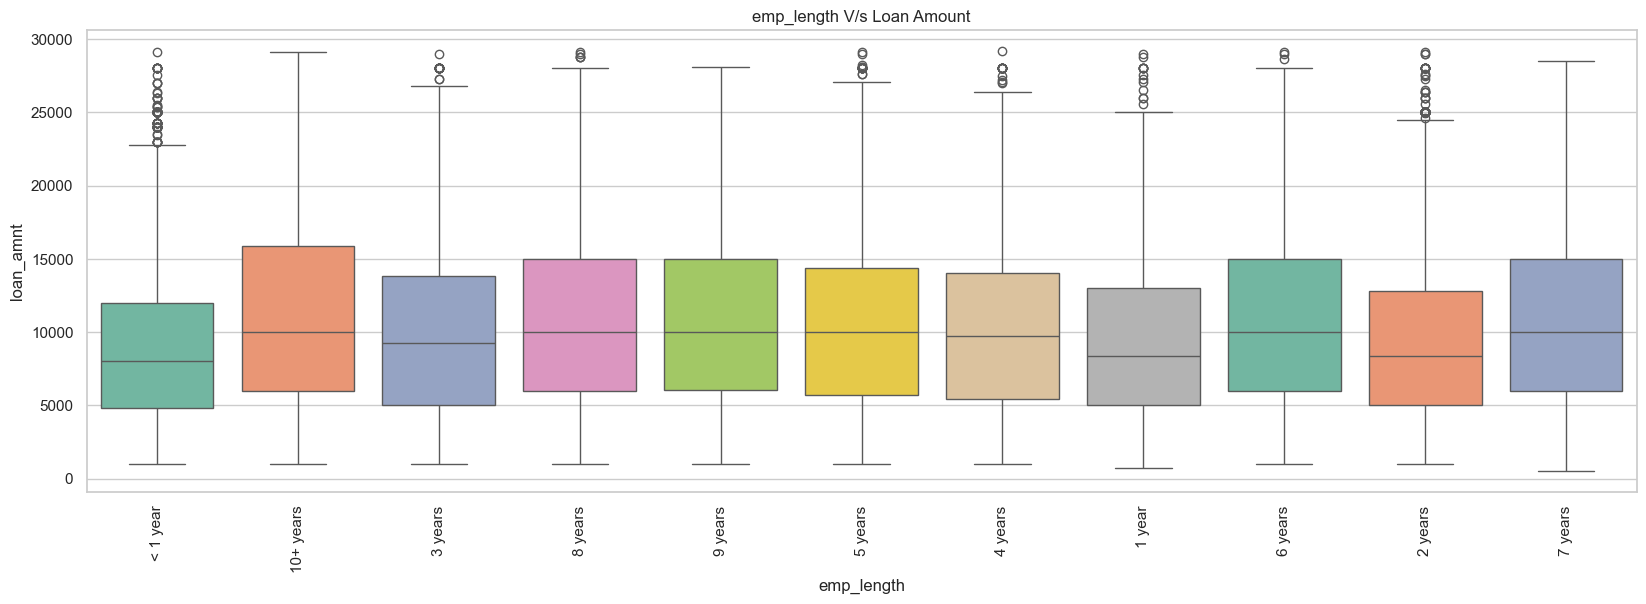

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


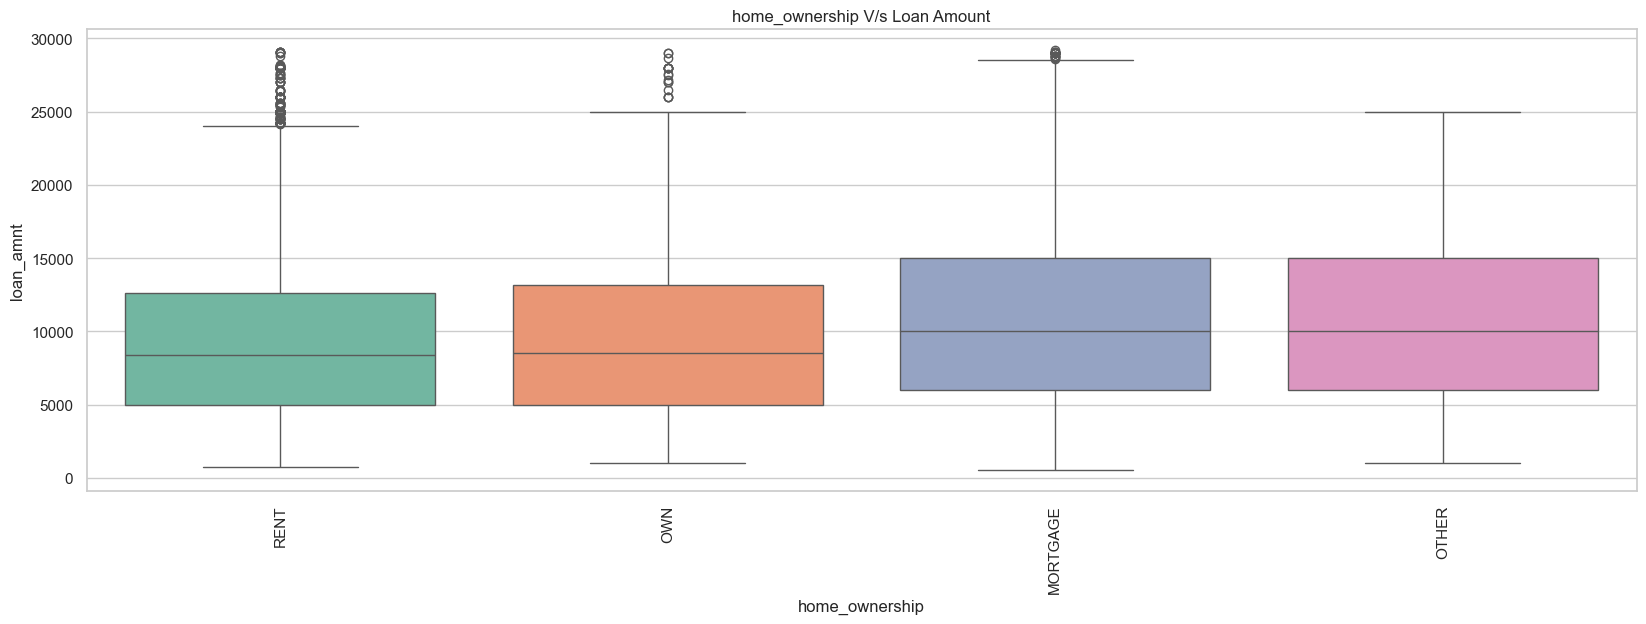

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


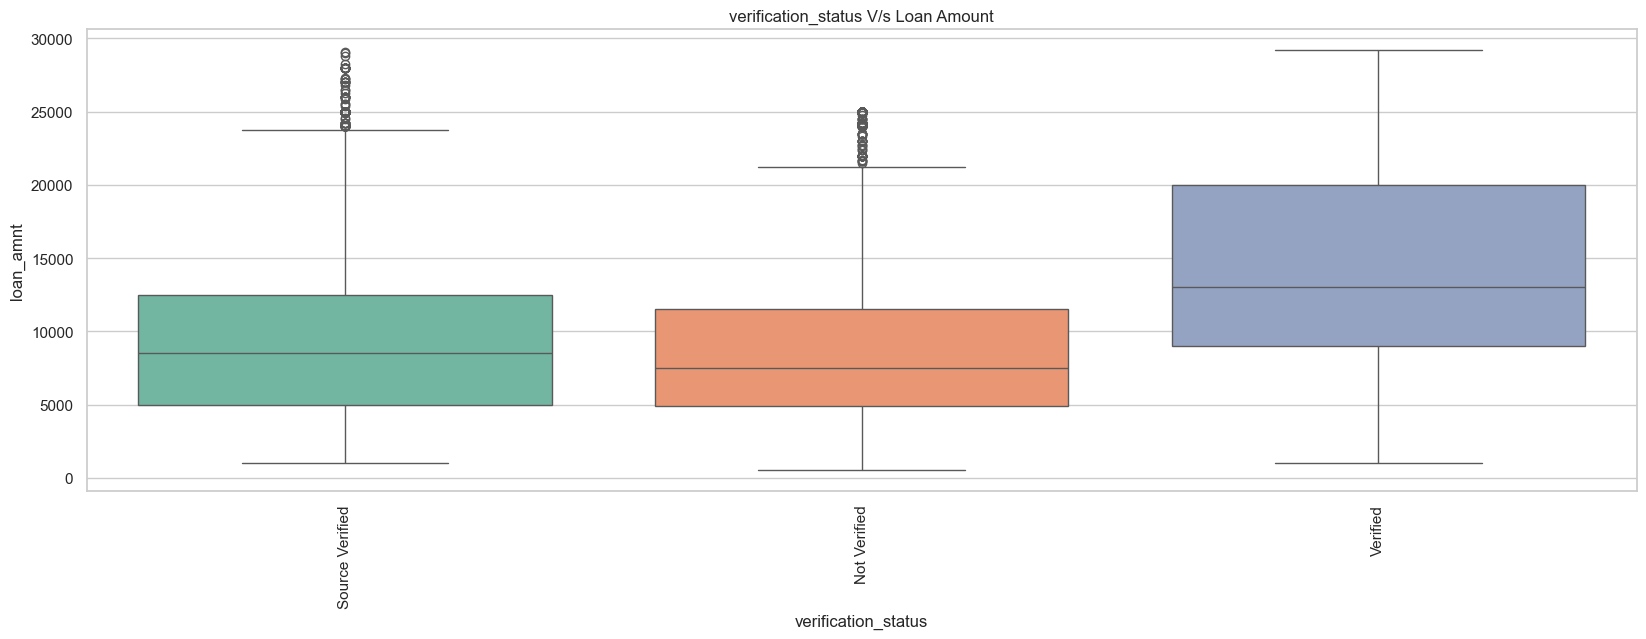

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


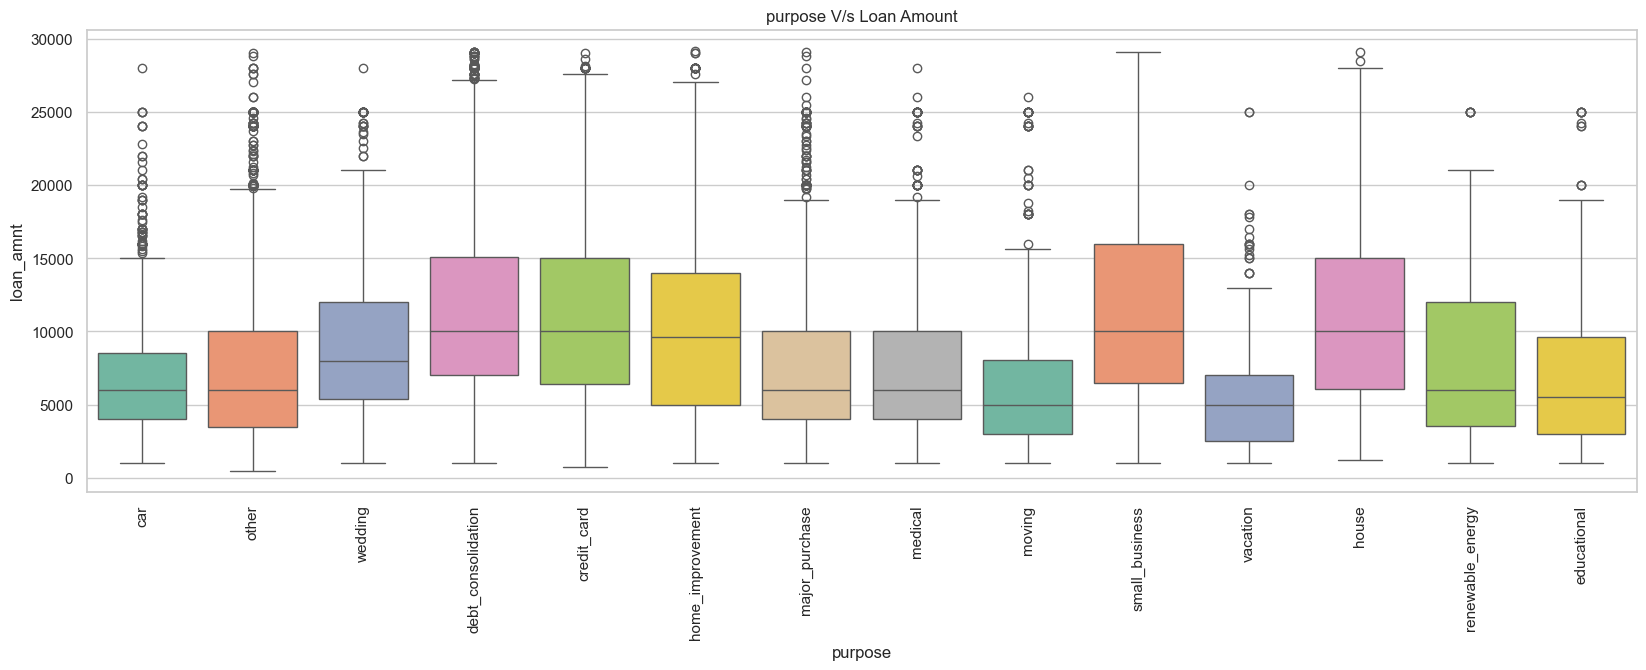

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


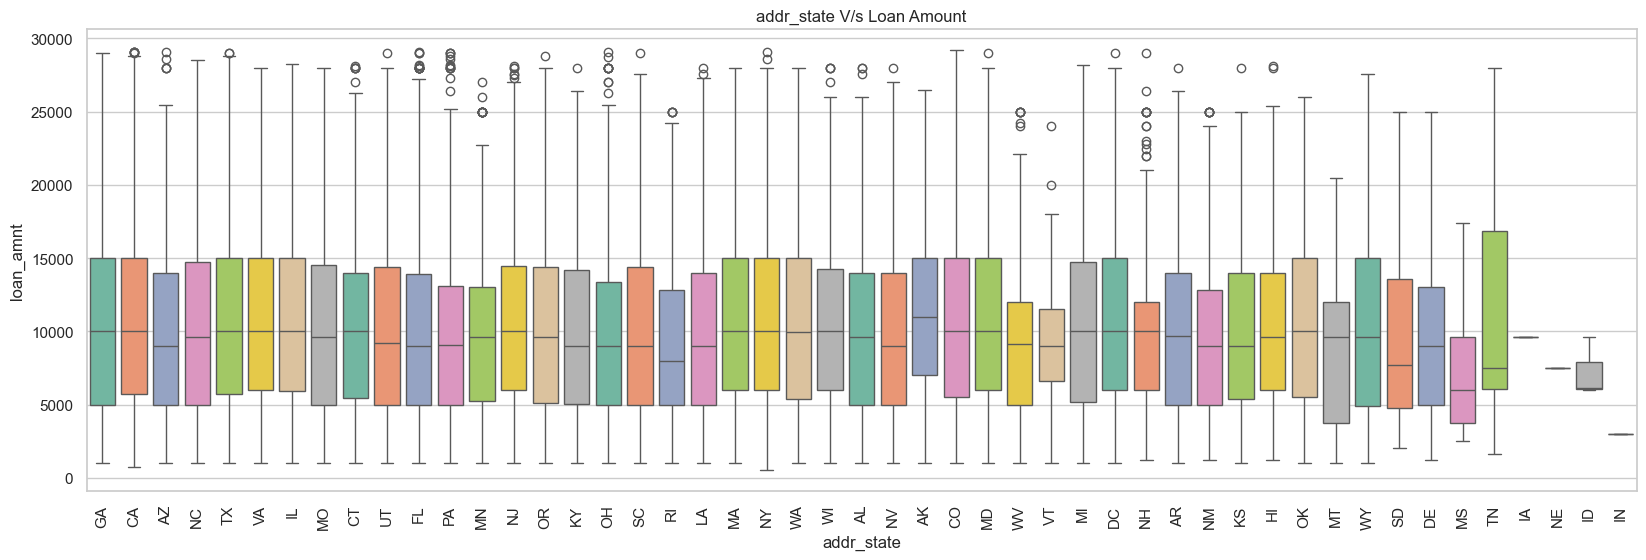

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


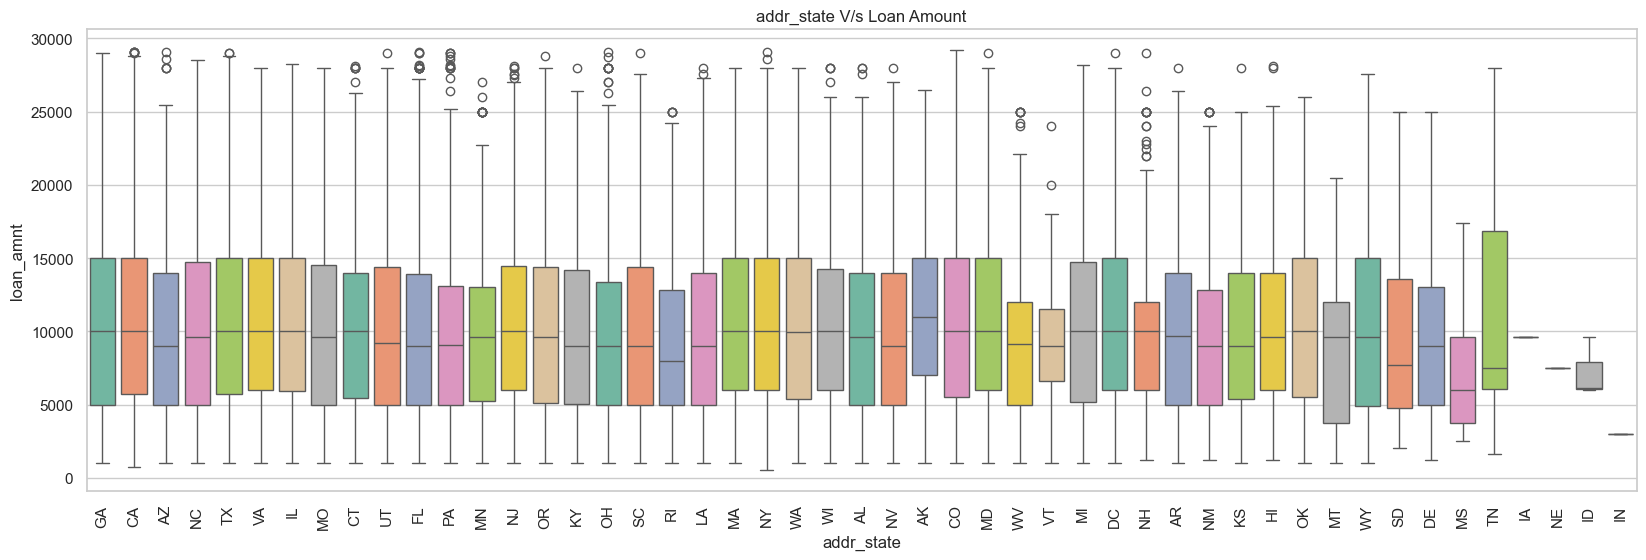

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


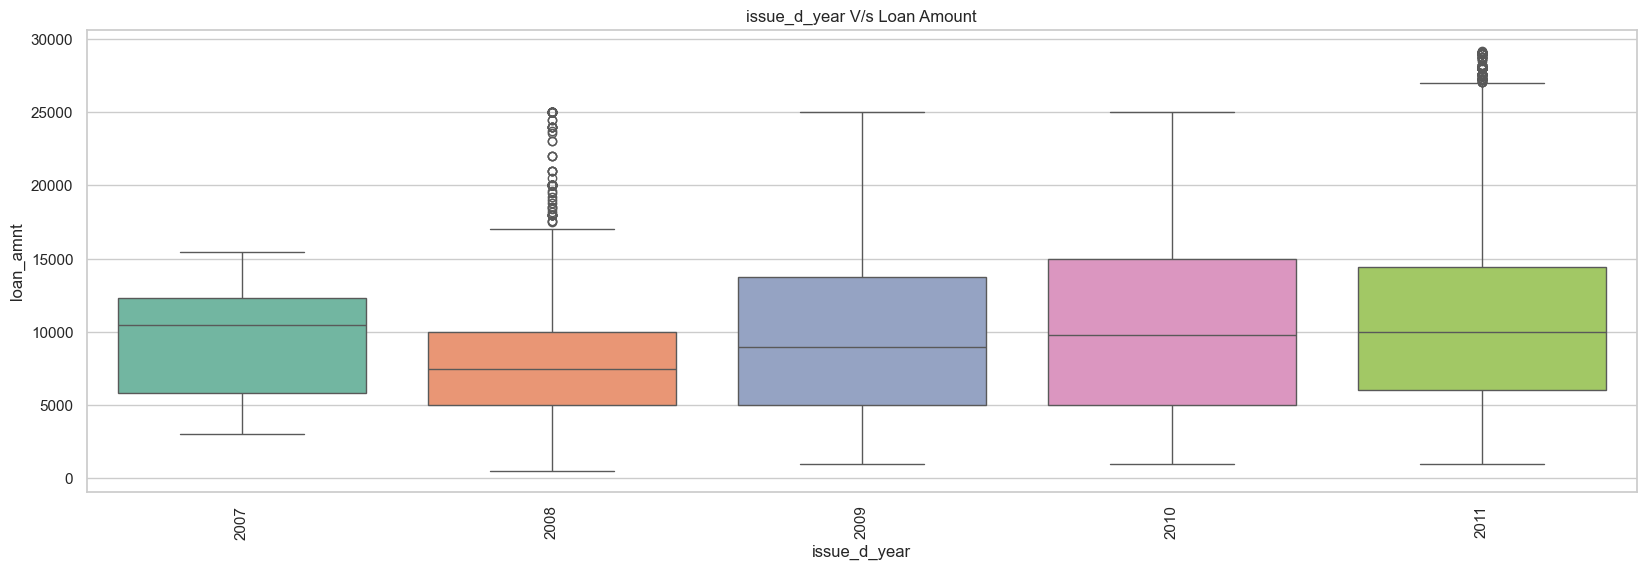

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


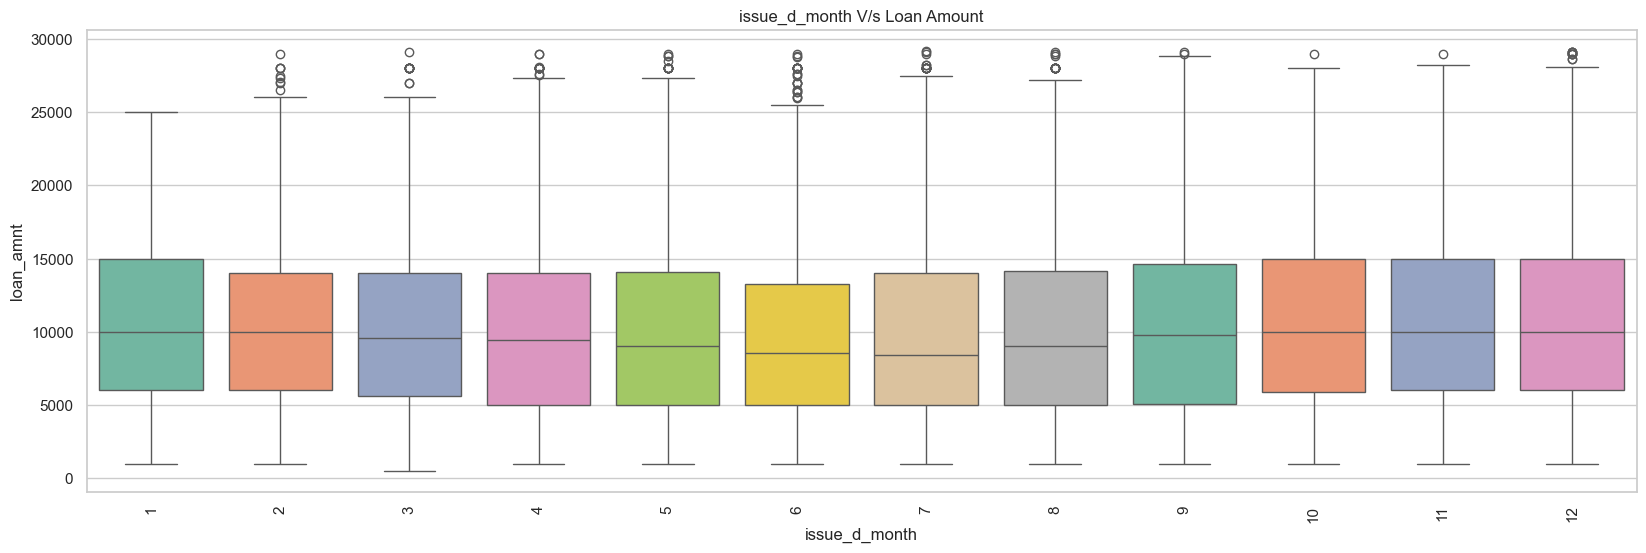

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


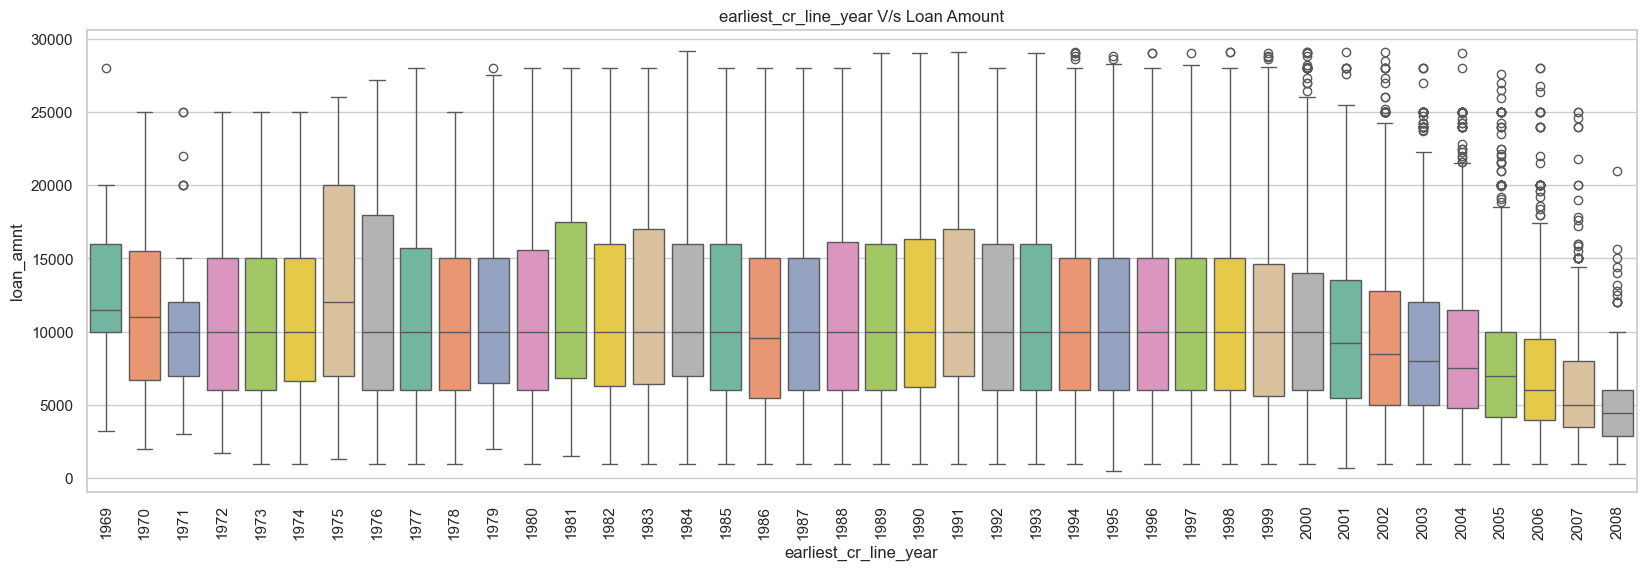

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


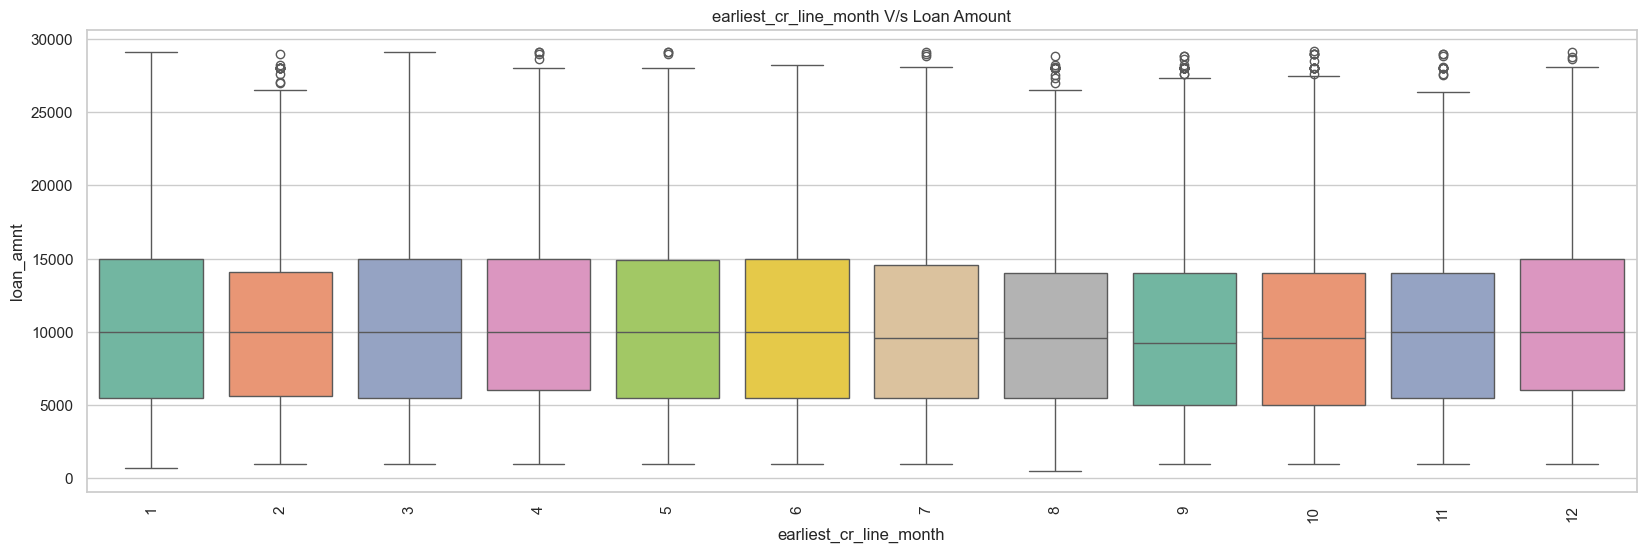

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


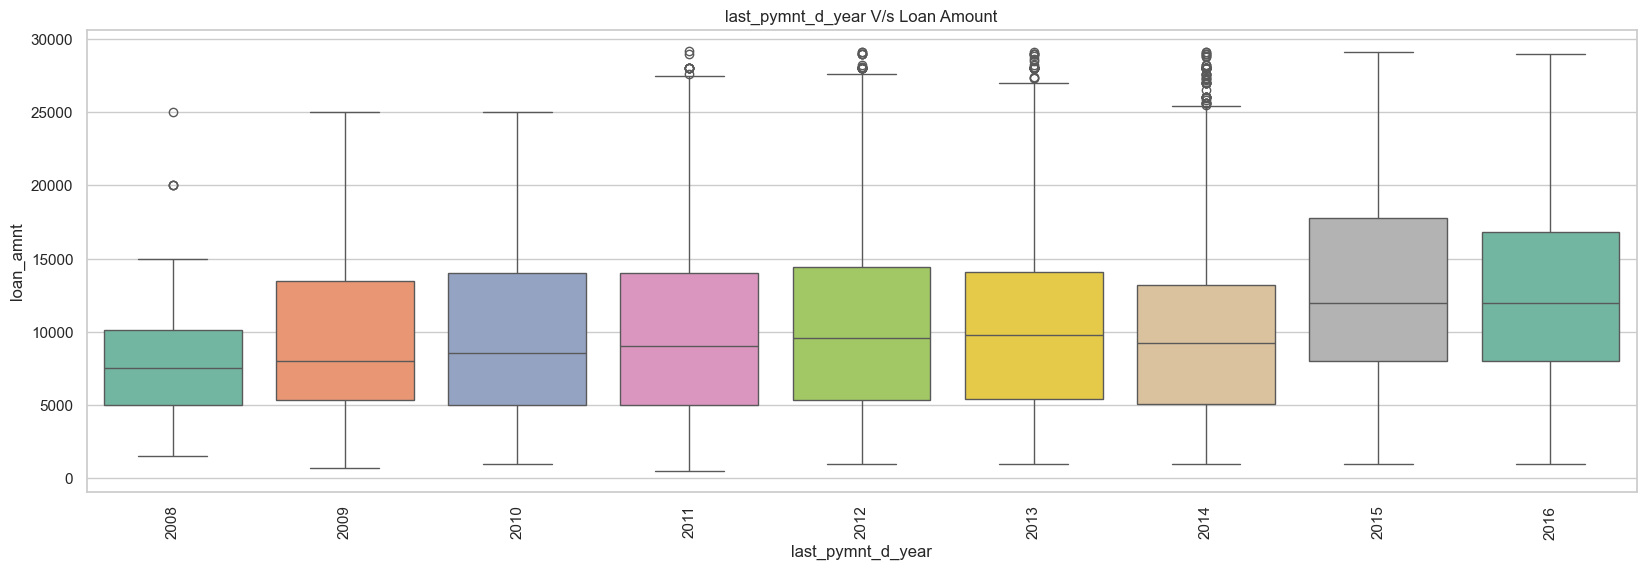

C:\Users\madevada\AppData\Local\Temp\ipykernel_15156\3825155261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example


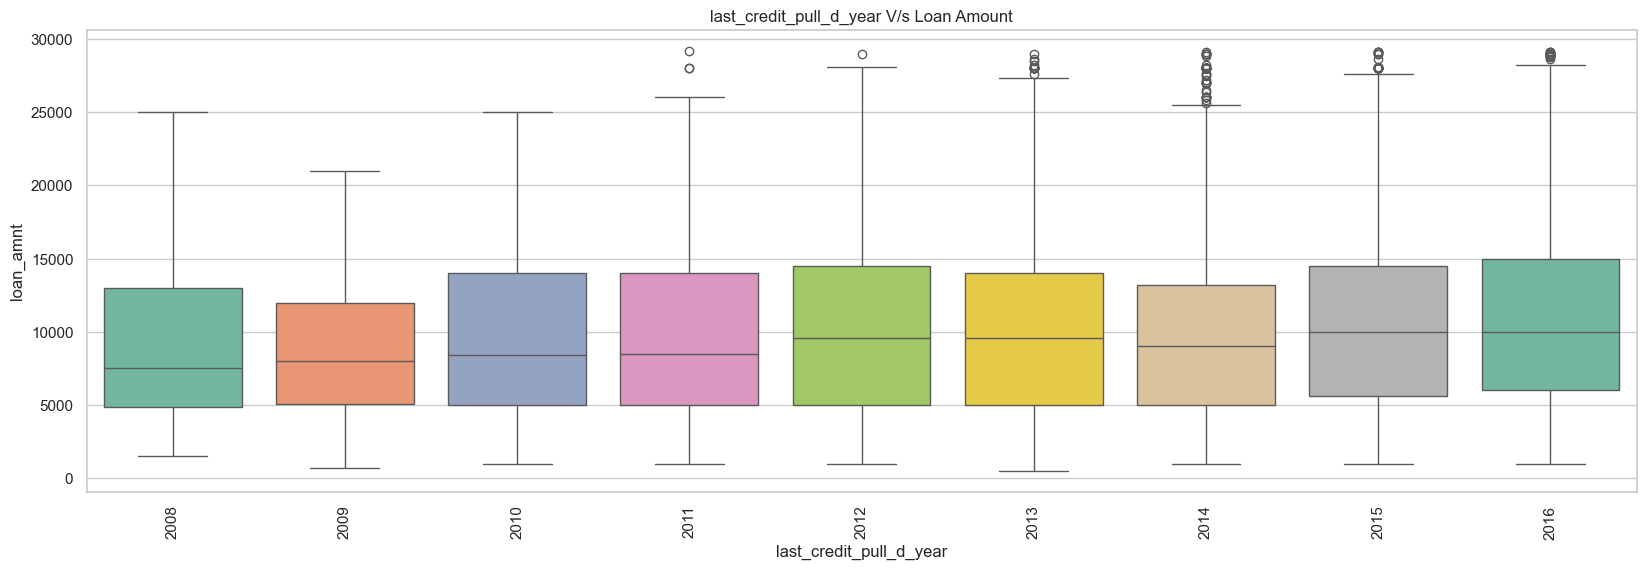

In [83]:
for i in cat_variable_list:
    plt.figure(figsize=(20, 6))
    plt.title(i + " V/s Loan Amount")
    ax = sns.boxplot(x=df[i], y=df['loan_amnt'], palette='Set2')  # Using 'Set2' palette for example
    plt.xticks(rotation=90)
    plt.show()

In [68]:
df.earliest_cr_line.max()

Timestamp('2008-11-01 00:00:00')

observations

#### <font color="Green">**Bivariate Analysis of categorical columns Vs Loan Status**

In [76]:
#cat_variable_list = ['term','grade','emp_length', 'home_ownership','verification_status','issue_d_year', 'issue_d_month','addr_state','delinq_2yrs','earliest_cr_line_year']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


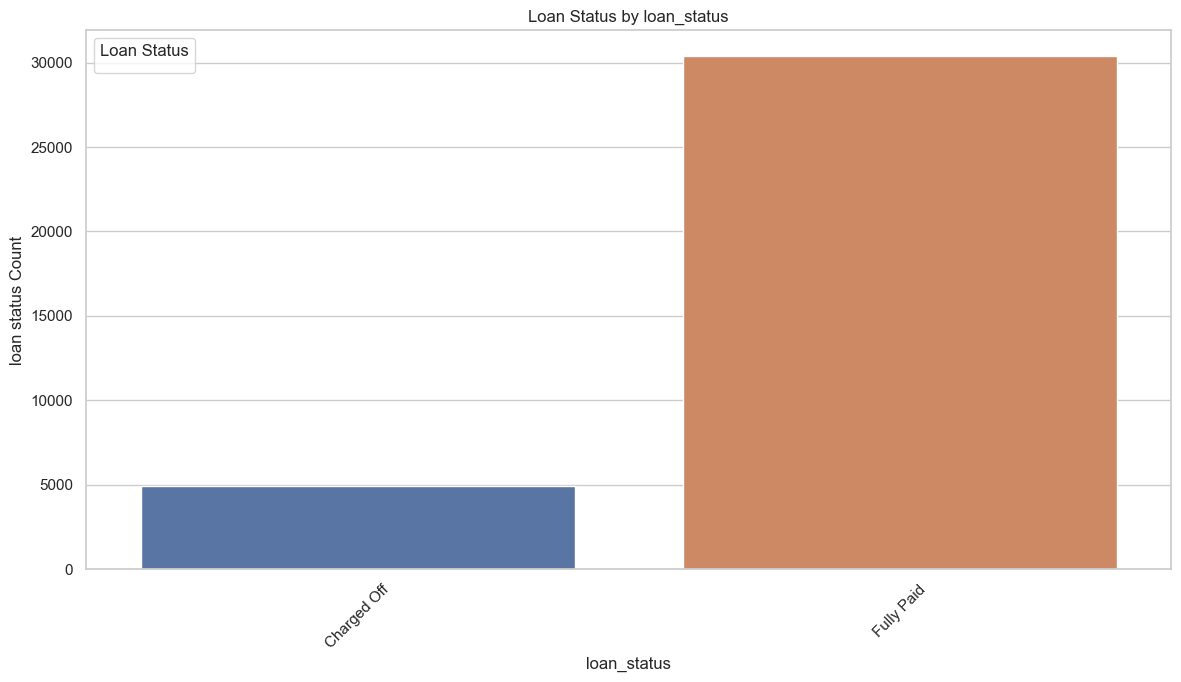

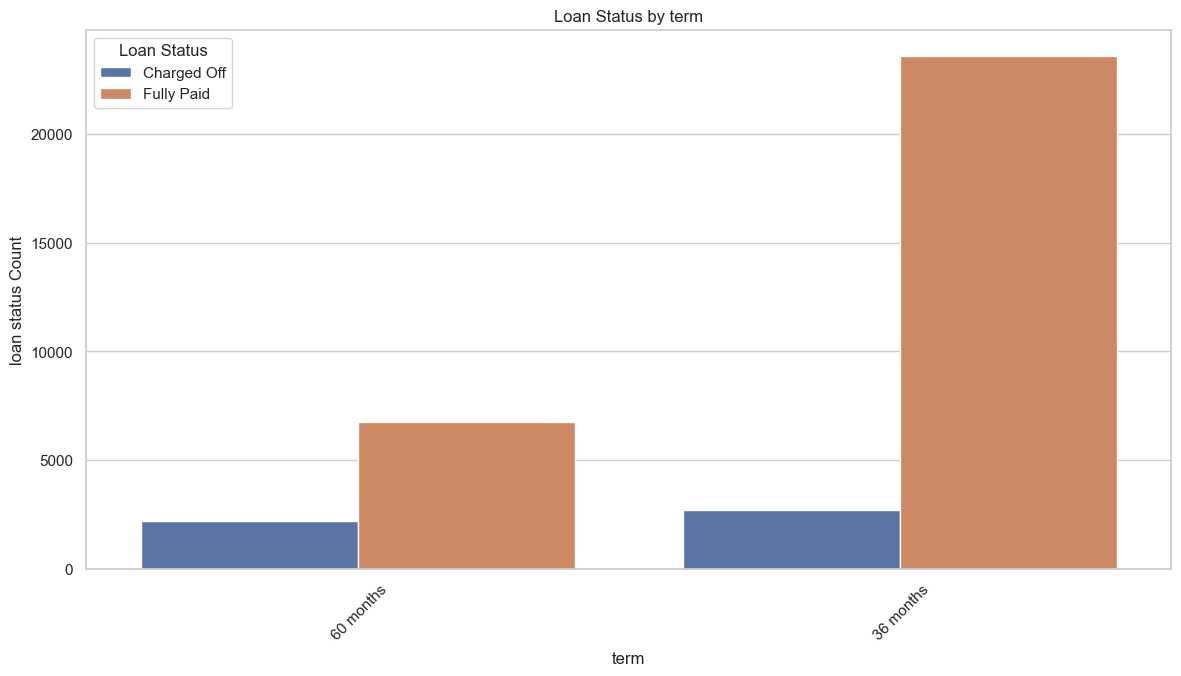

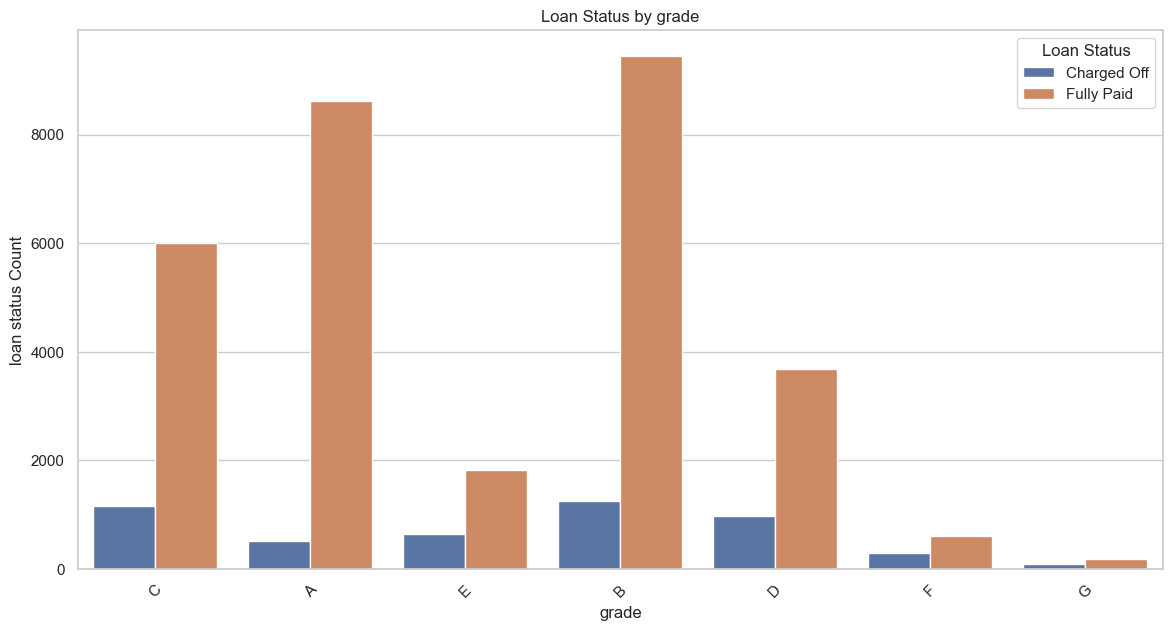

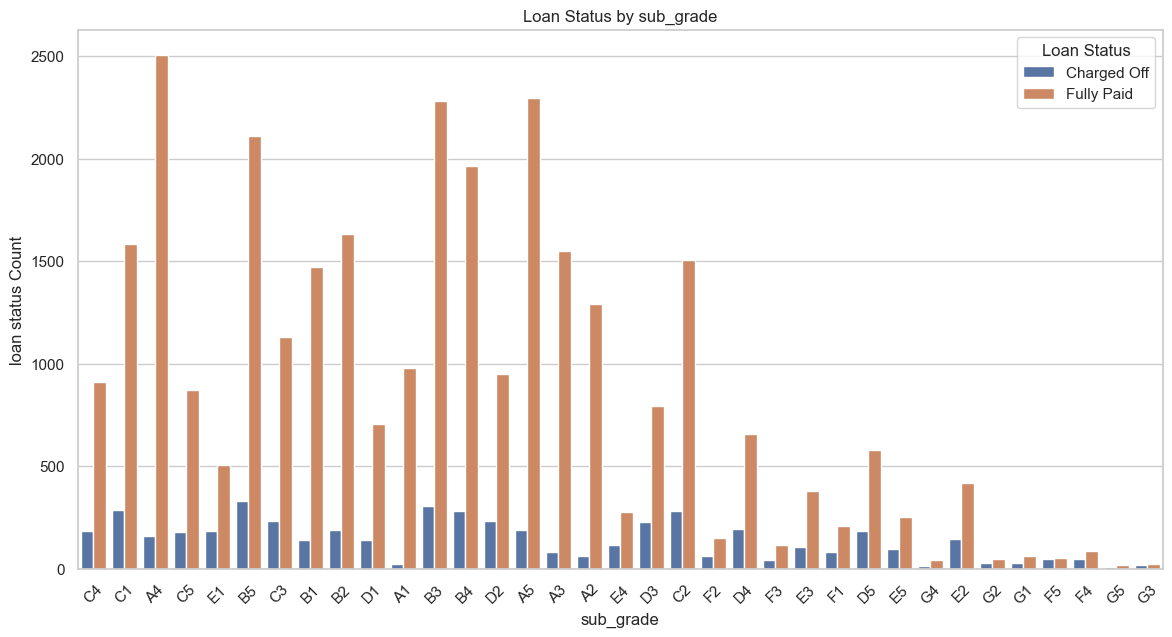

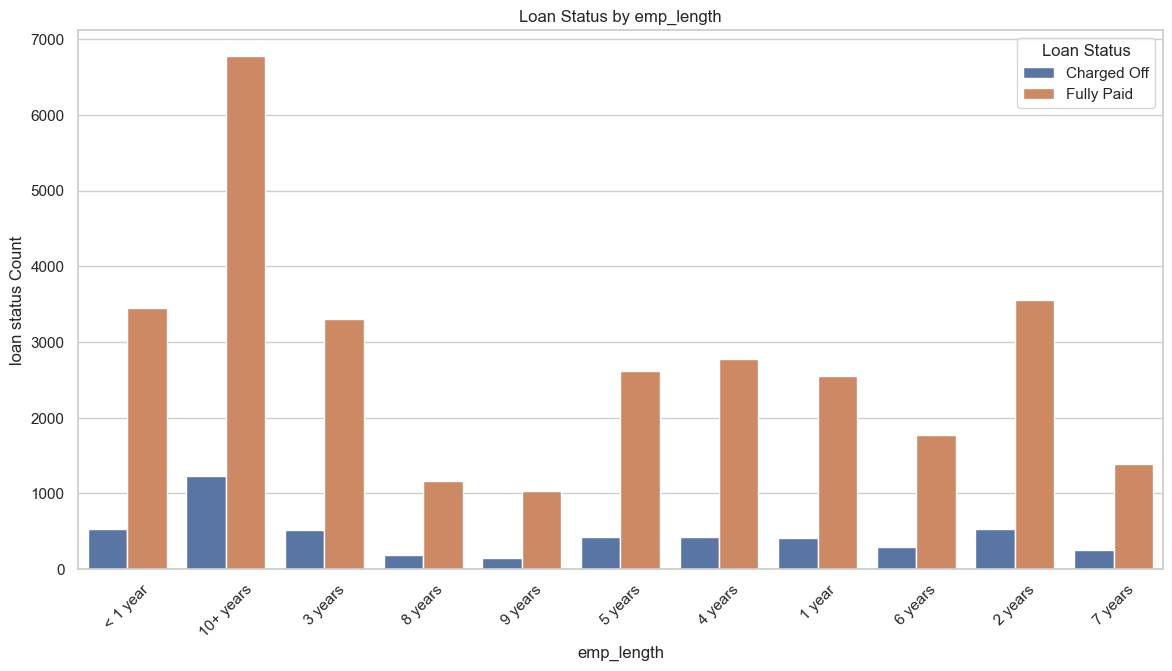

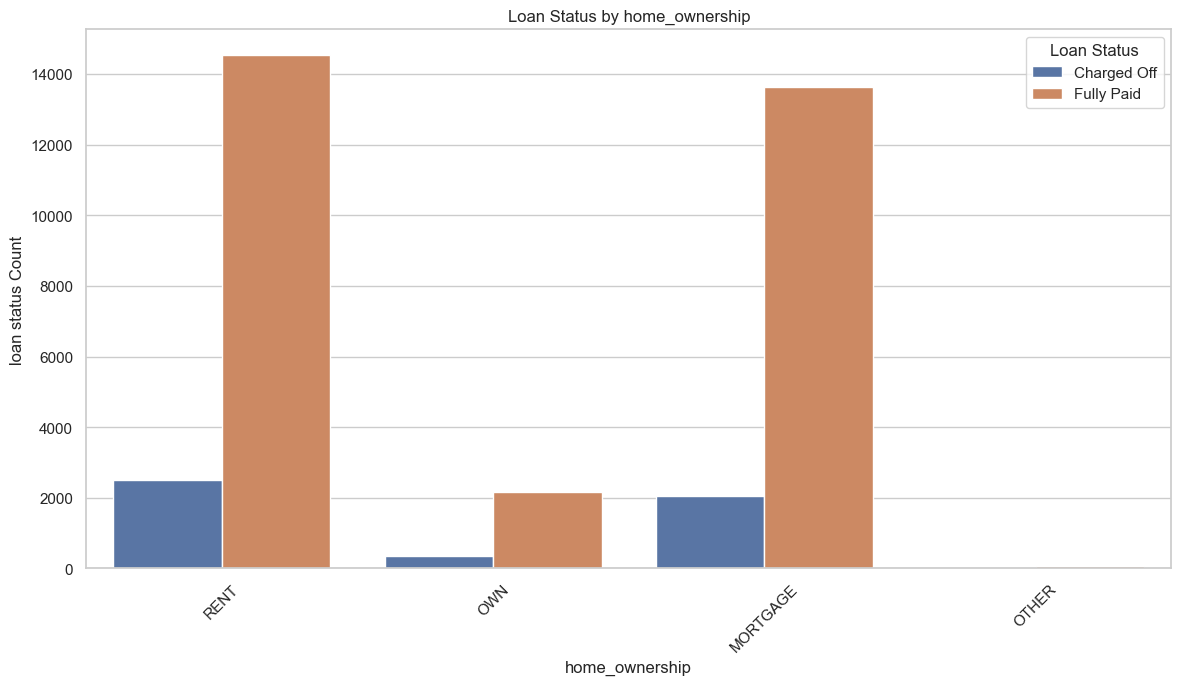

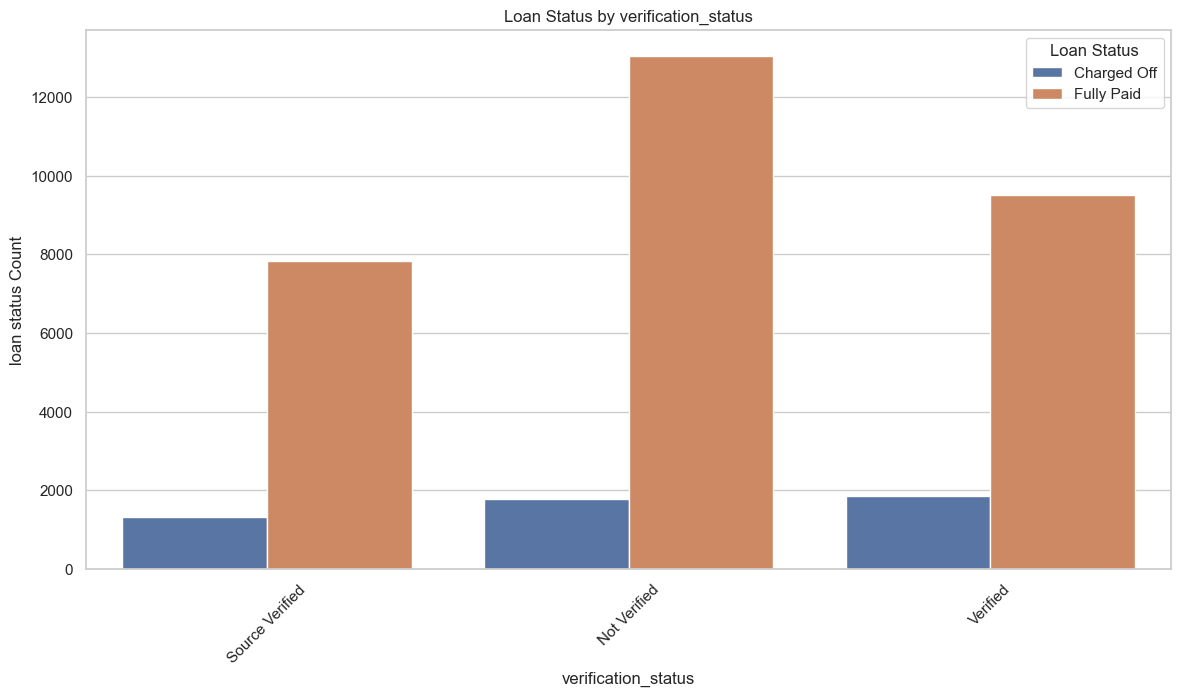

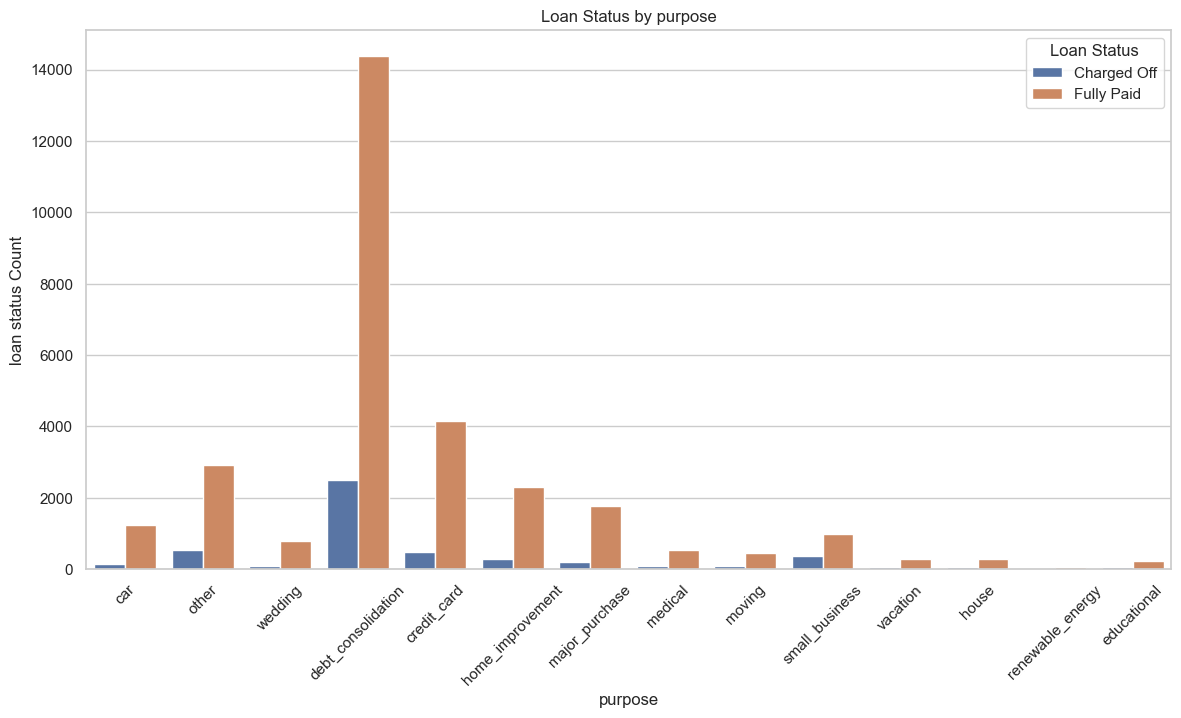

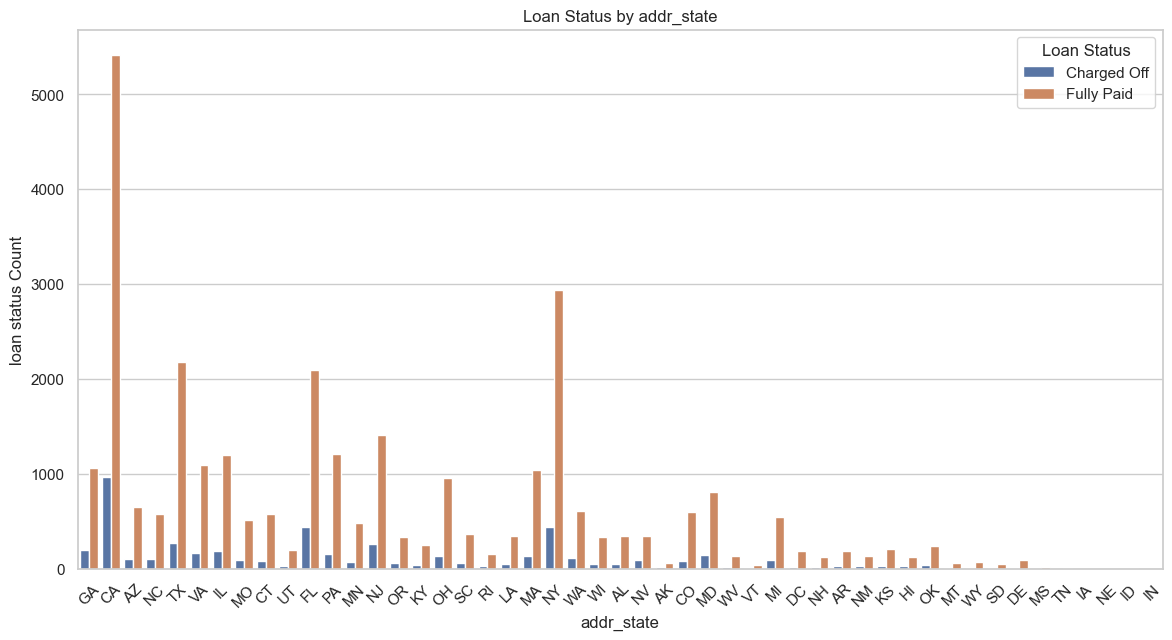

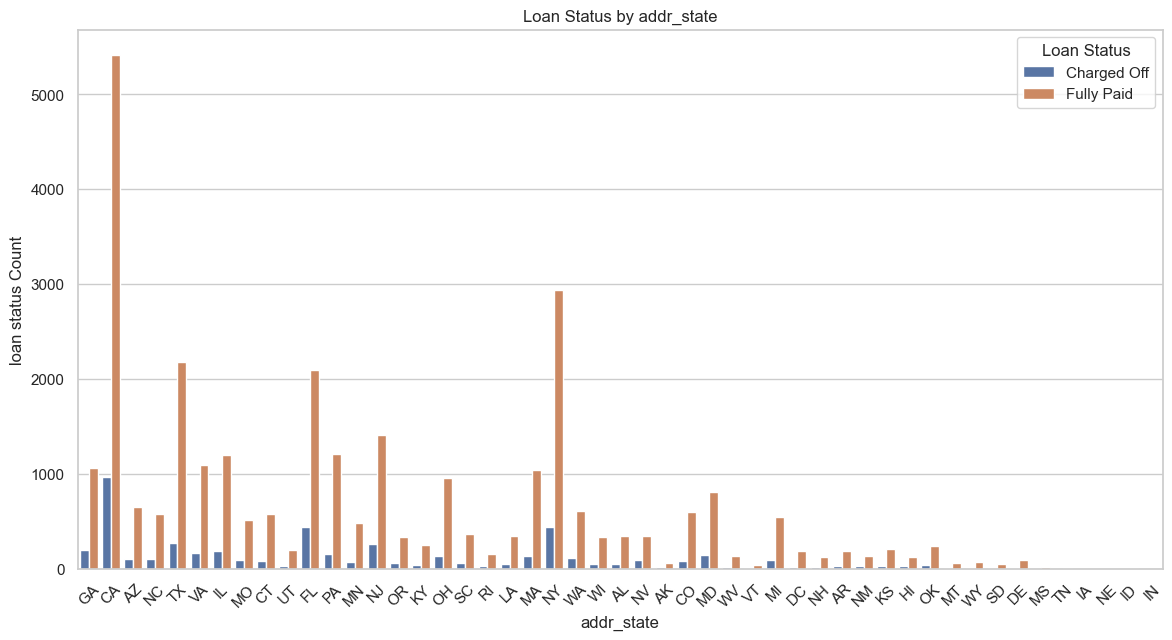

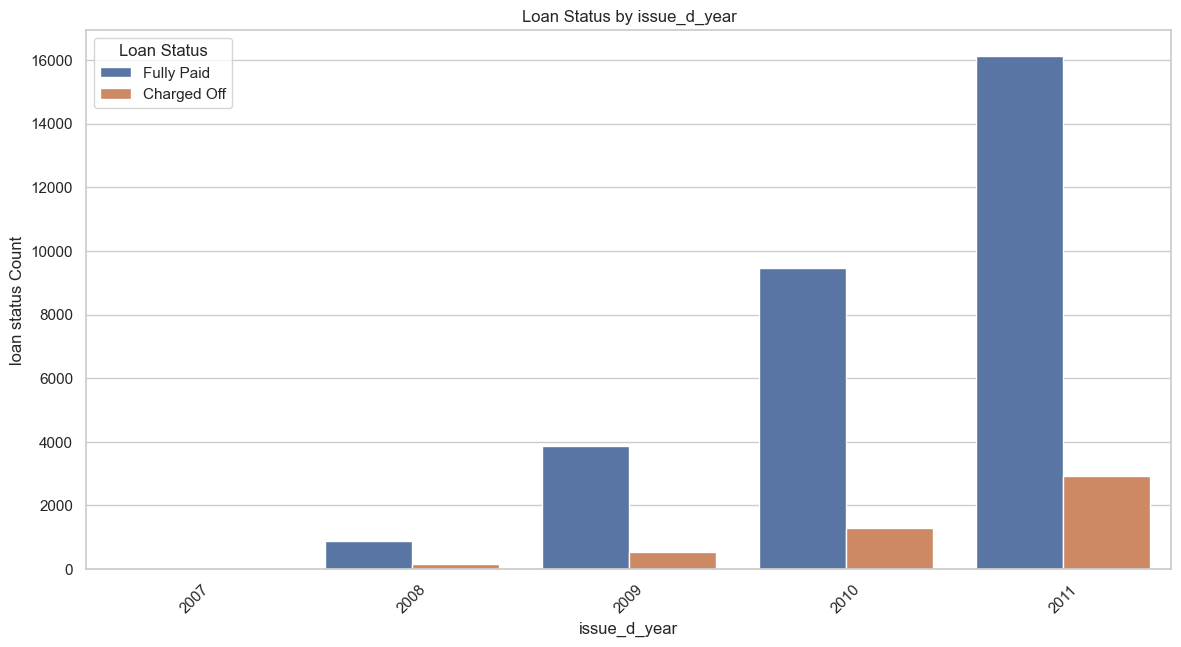

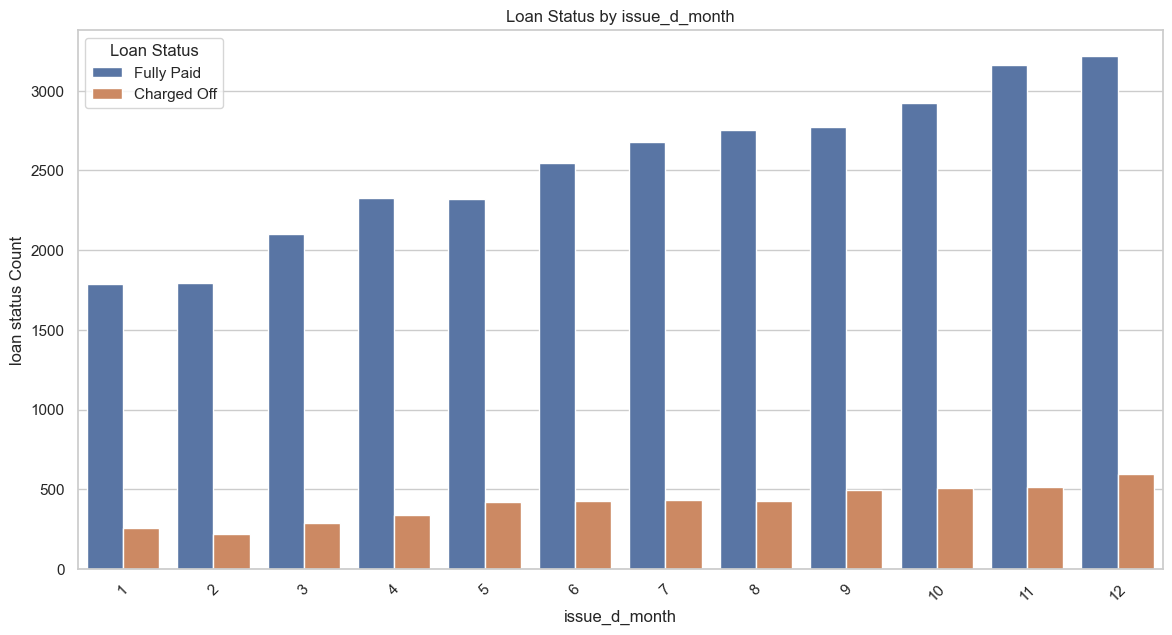

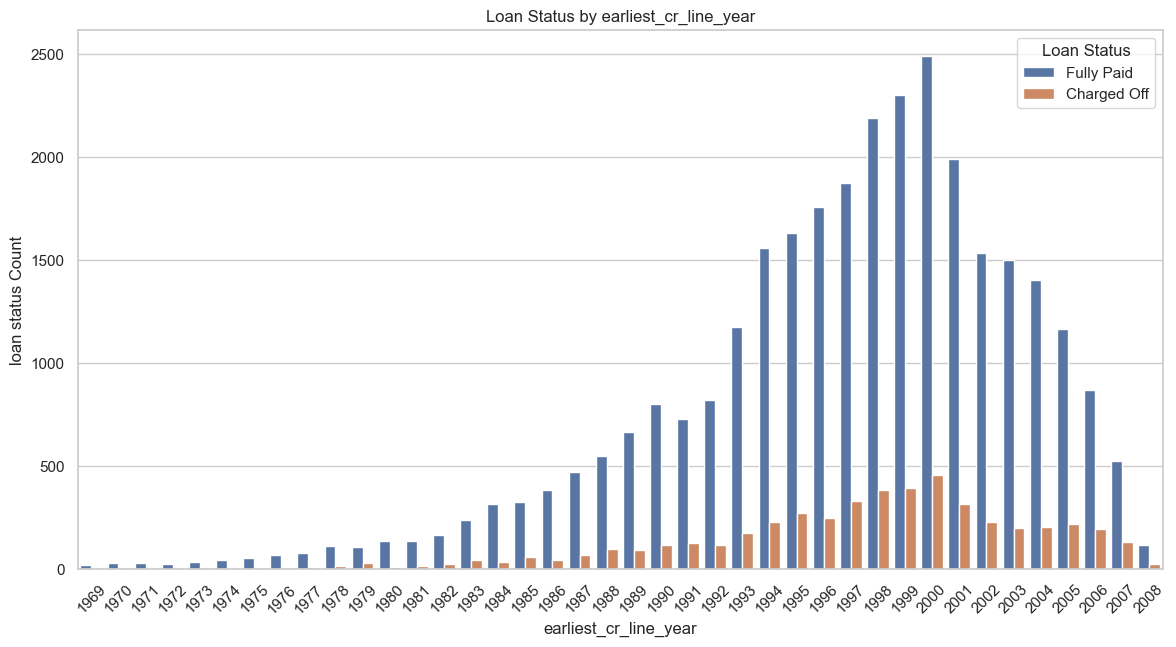

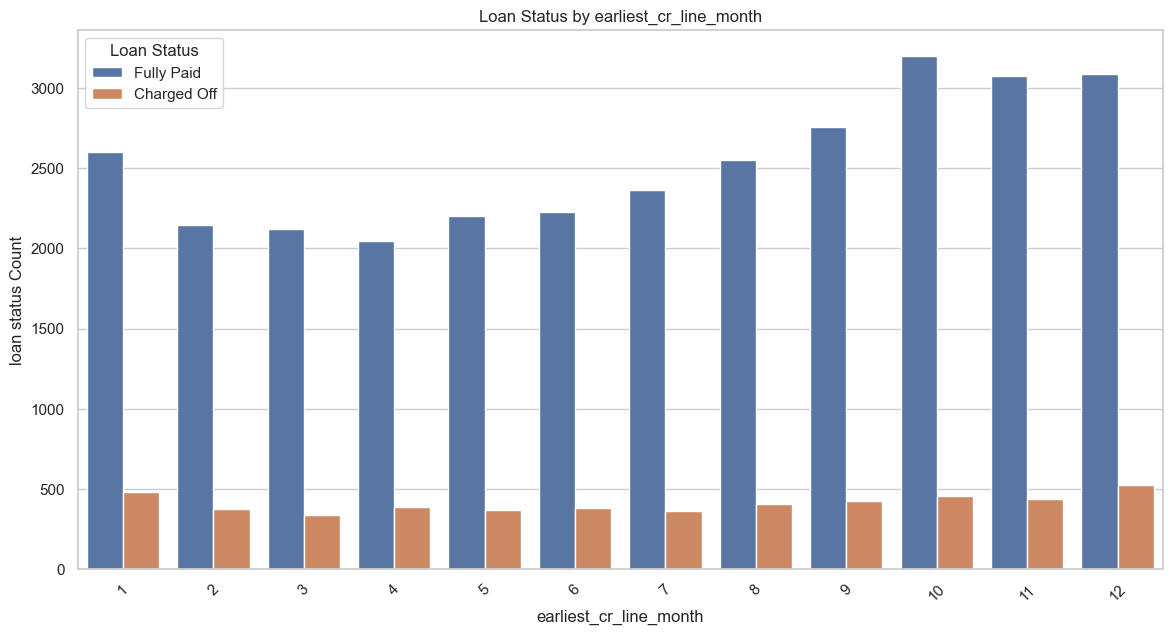

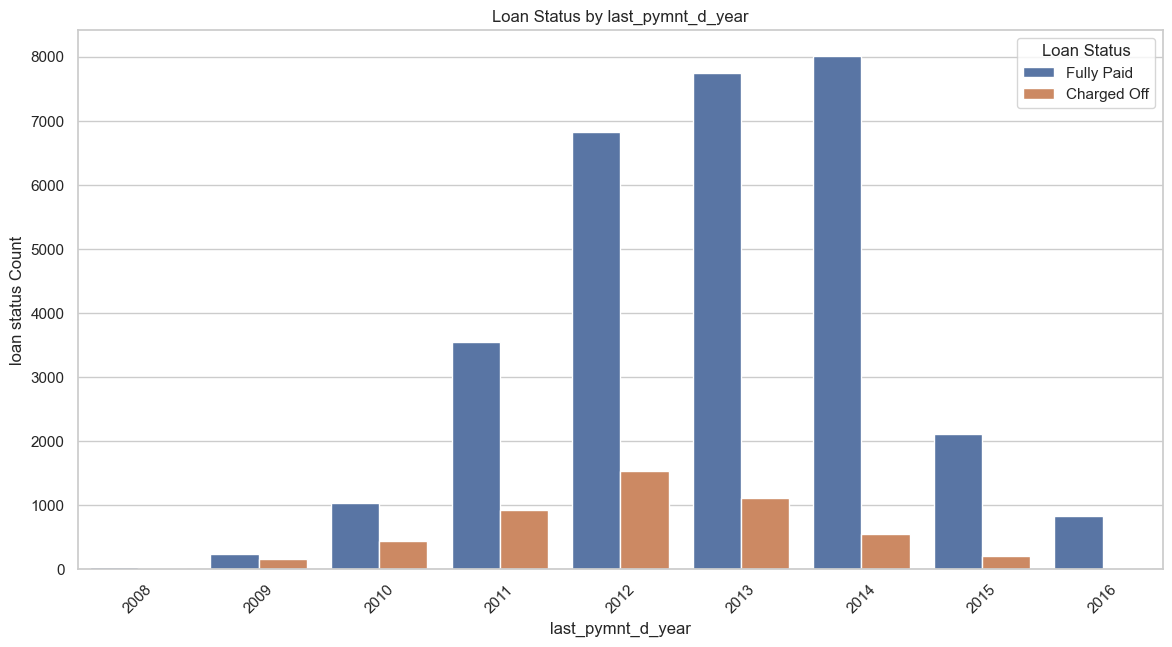

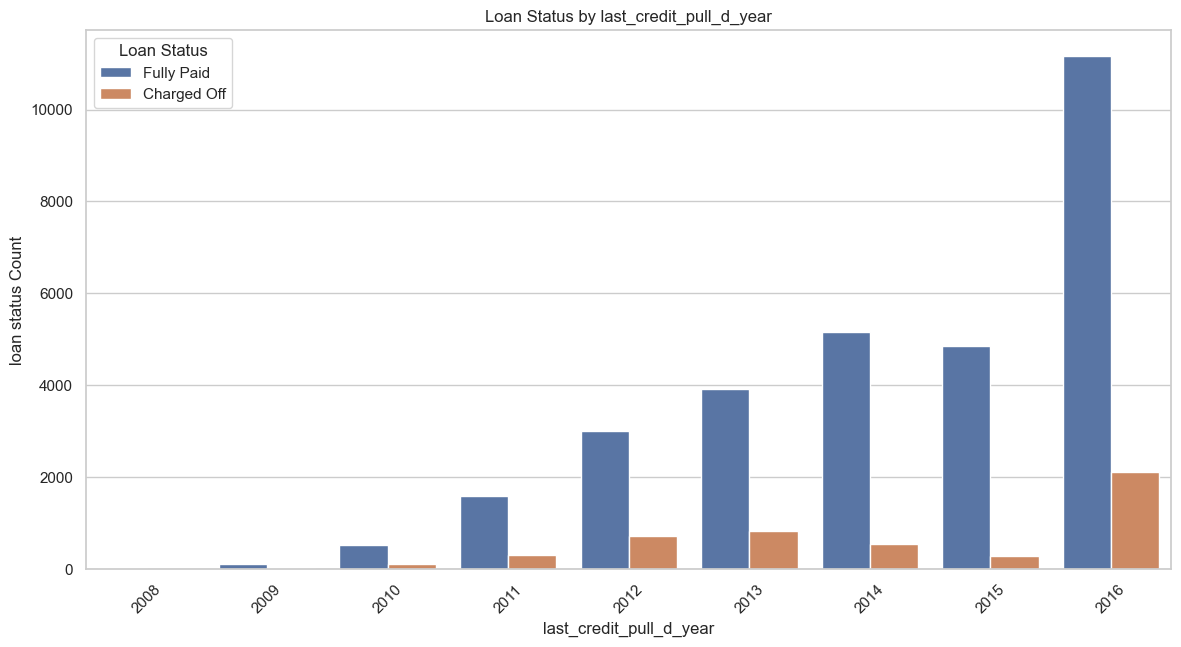

In [84]:


# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Loop through each categorical variable and create a bar plot
for cat_var in cat_variable_list:
    plt.figure(figsize=(14, 7))
    sns.countplot(data=df, x=cat_var, hue='loan_status', palette='Set2')
    plt.title(f'Loan Status by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('loan status Count')
    plt.legend(title='Loan Status')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

Observations

#### <font color="Green">**Bivariate - Continous variable Analysis Vs Loan Status**

In [71]:
#Pending
#EDA Multivariate Analysis - heatmap
#Pairplot


Descriptive statistics of int_rate grouped by loan_status:
               count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4934.0  11209.809485  6611.447239  1000.0  6000.0  10000.0   
Fully Paid   30384.0  10356.463106  6221.360618   500.0  5500.0   9600.0   

                 75%      95%      99%      max  
loan_status                                      
Charged Off  15000.0  25000.0  26000.0  29100.0  
Fully Paid   14125.0  24000.0  25000.0  29175.0  


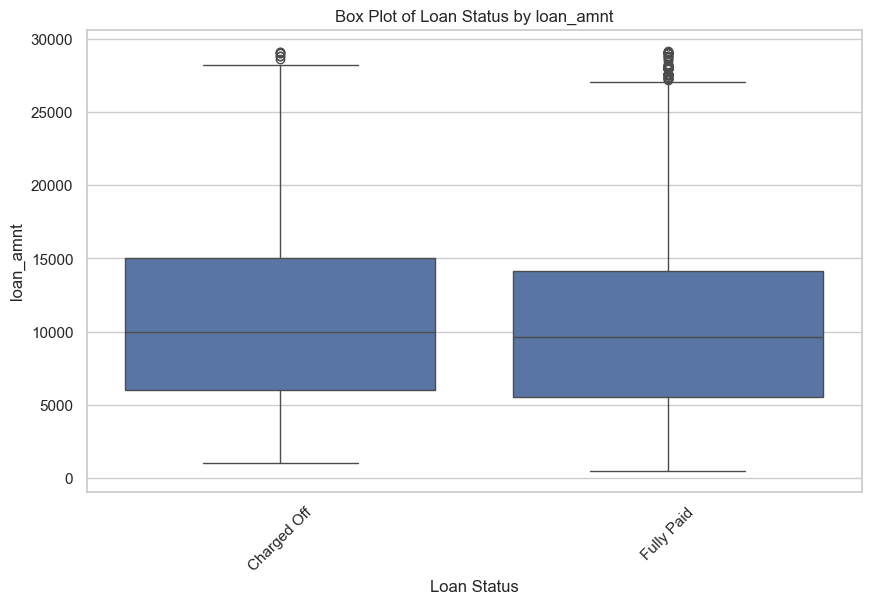

Descriptive statistics of int_rate grouped by loan_status:
               count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4934.0  11019.314957  6459.273530  1000.0  6000.0  10000.0   
Fully Paid   30384.0  10176.088566  6073.874382   500.0  5400.0   9500.0   

                 75%       95%      99%      max  
loan_status                                       
Charged Off  15000.0  24250.00  25500.0  29100.0  
Fully Paid   14000.0  23321.25  25000.0  29175.0  


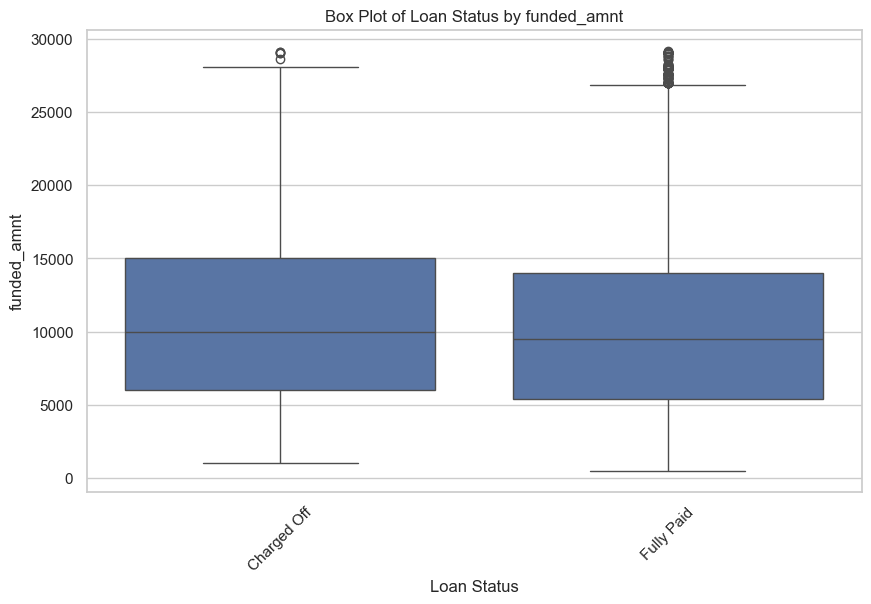

Descriptive statistics of int_rate grouped by loan_status:
               count          mean          std  min     25%     50%      75%  \
loan_status                                                                     
Charged Off   4934.0  10379.397805  6362.354150  0.0  5000.0  9000.0  14900.0   
Fully Paid   30384.0   9789.669224  6000.716724  0.0  5000.0  8975.0  13200.0   

                   95%      99%          max  
loan_status                                   
Charged Off  23203.178  25000.0  28075.00000  
Fully Paid   22375.000  25000.0  28249.91598  


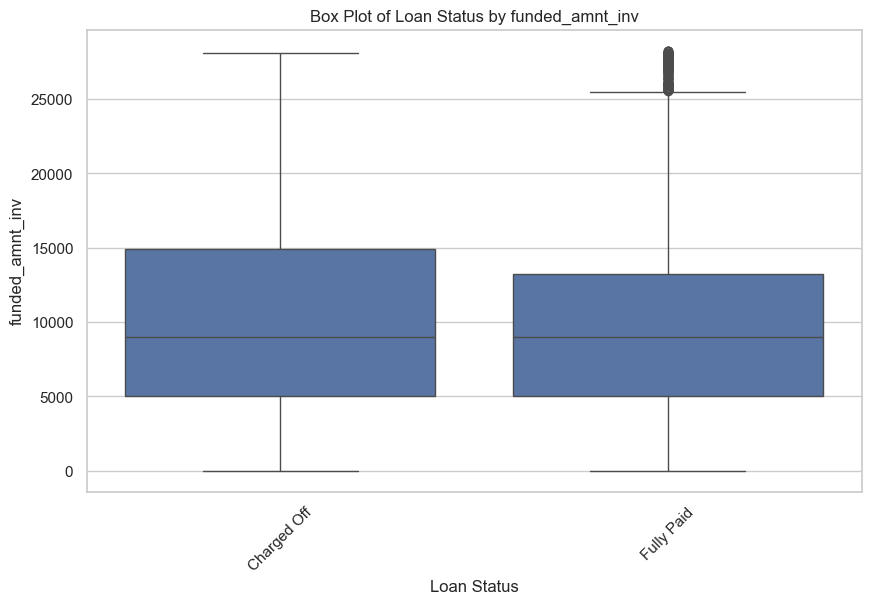

Descriptive statistics of int_rate grouped by loan_status:
               count       mean       std   min    25%    50%    75%     95%  \
loan_status                                                                    
Charged Off   4934.0  13.884341  3.601736  5.42  11.49  13.72  16.45  20.058   
Fully Paid   30384.0  11.656506  3.595223  5.42   8.59  11.49  14.09  17.930   

               99%    max  
loan_status                
Charged Off  21.74  22.74  
Fully Paid   20.30  22.74  


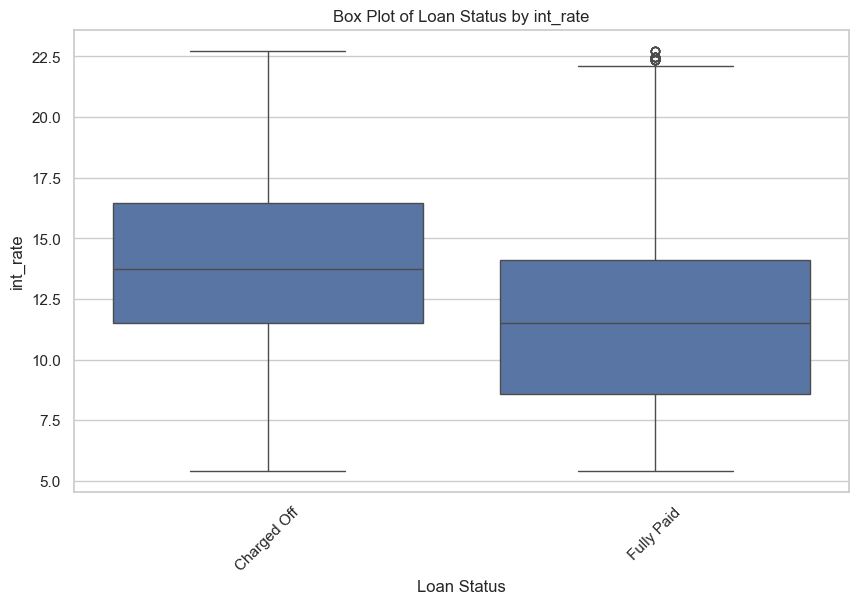

Descriptive statistics of int_rate grouped by loan_status:
               count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   4934.0  310.959560  175.053505  22.79  172.4125  280.57   
Fully Paid   30384.0  299.937107  171.467722  16.08  167.2550  278.23   

                  75%       95%     99%     max  
loan_status                                      
Charged Off  413.6625  657.7075  778.06  814.00  
Fully Paid   394.9400  652.3200  778.59  814.34  


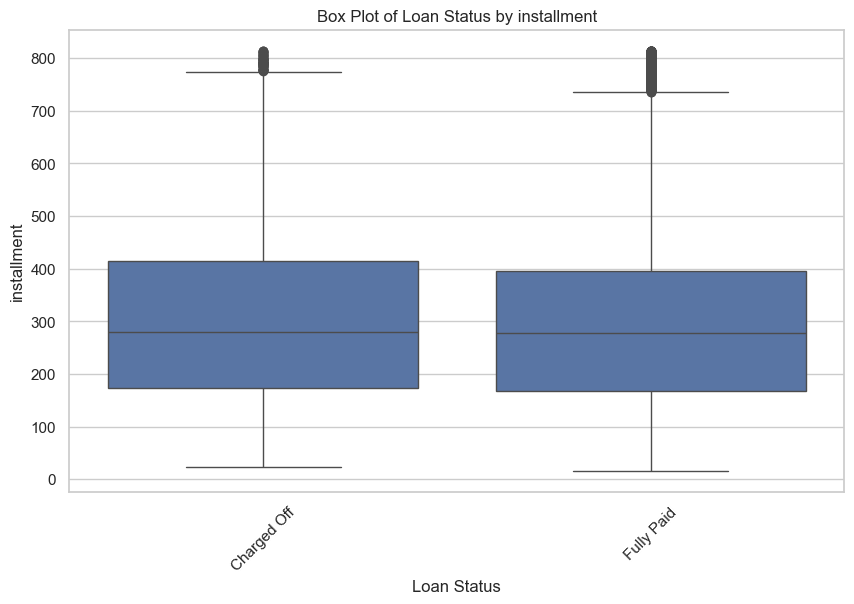

Descriptive statistics of int_rate grouped by loan_status:
               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   4934.0  57393.185805  25968.413984  4080.0  38400.0  54000.0   
Fully Paid   30384.0  62250.319684  27135.308156  4000.0  42000.0  60000.0   

                  75%       95%       99%       max  
loan_status                                          
Charged Off  70761.25  110000.0  132000.0  143000.0  
Fully Paid   78000.00  118000.0  135000.0  143500.0  


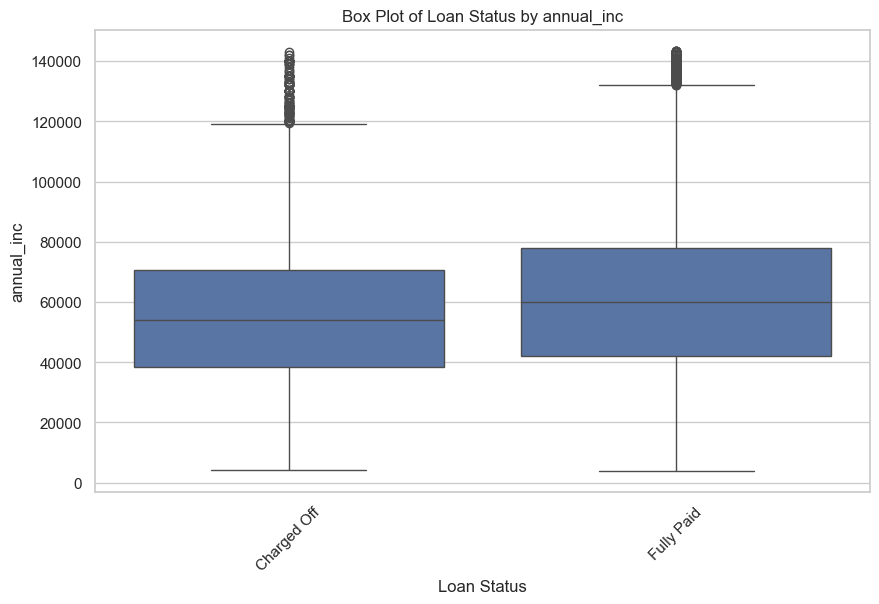

Descriptive statistics of int_rate grouped by loan_status:
               count       mean       std  min   25%    50%    75%      95%  \
loan_status                                                                   
Charged Off   4934.0  14.155742  6.524082  0.0  9.35  14.44  19.34  23.9235   
Fully Paid   30384.0  13.280677  6.646370  0.0  8.16  13.35  18.53  23.8100   

                 99%    max  
loan_status                  
Charged Off  26.0635  29.85  
Fully Paid   26.6117  29.99  


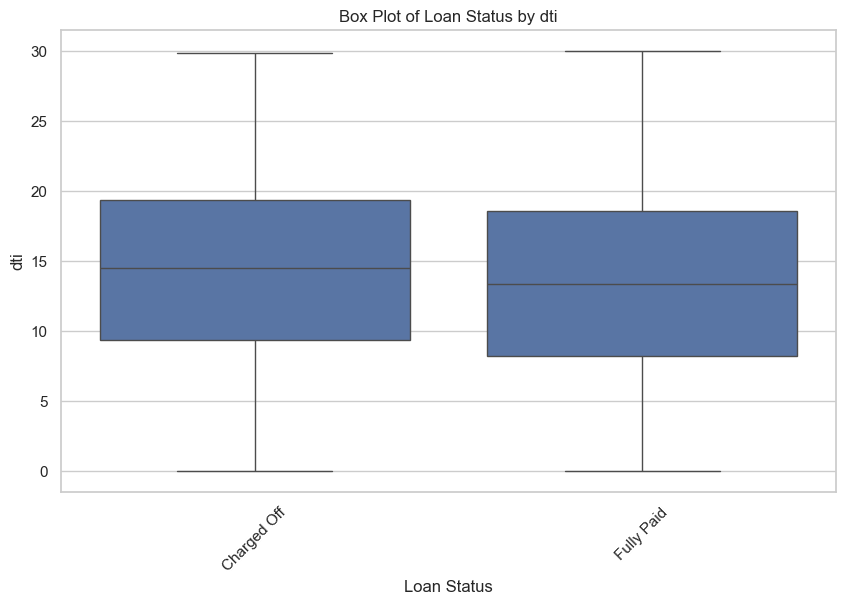

Descriptive statistics of int_rate grouped by loan_status:
               count          mean          std  min      25%     50%  \
loan_status                                                             
Charged Off   4934.0  10684.377179  8412.122808  0.0  4245.75  8930.0   
Fully Paid   30384.0  10113.019583  8201.596462  0.0  3707.50  8828.0   

                 75%       95%       99%      max  
loan_status                                        
Charged Off  15083.5  28310.35  35383.02  36934.0  
Fully Paid   14287.5  27399.85  34295.68  36960.0  


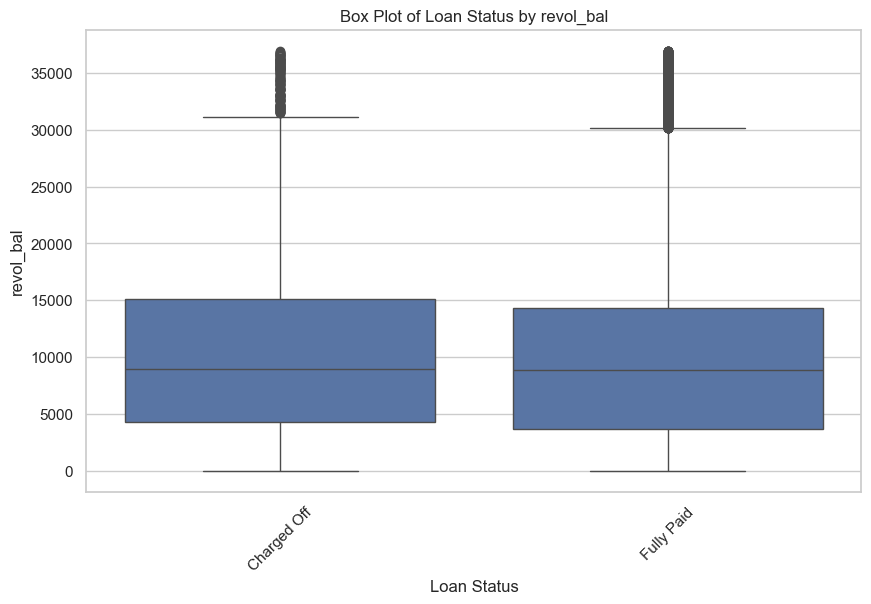

Descriptive statistics of int_rate grouped by loan_status:
               count       mean        std  min   25%    50%   75%     95%  \
loan_status                                                                  
Charged Off   4934.0  56.147880  27.655133  0.0  35.4  59.25  79.2  95.535   
Fully Paid   30384.0  47.999788  28.155457  0.0  24.5  48.20  71.2  93.100   

              99%   max  
loan_status              
Charged Off  99.0  99.9  
Fully Paid   98.3  99.9  


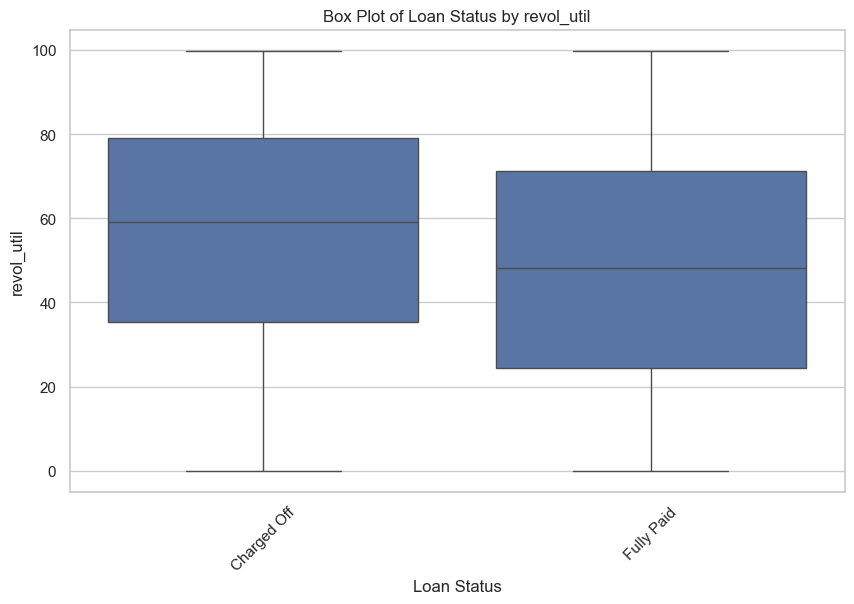

Descriptive statistics of int_rate grouped by loan_status:
               count          mean          std        min          25%  \
loan_status                                                               
Charged Off   4934.0   6776.413810  6042.216368   33.73000  2319.905000   
Fully Paid   30384.0  11753.995833  7118.456612  578.76814  6242.149261   

                     50%           75%           95%           99%  \
loan_status                                                          
Charged Off   4982.80000   9464.282500  19698.094000  27560.415900   
Fully Paid   10025.59548  15880.945093  26497.277808  30965.444813   

                     max  
loan_status               
Charged Off  32238.13000  
Fully Paid   32327.05127  


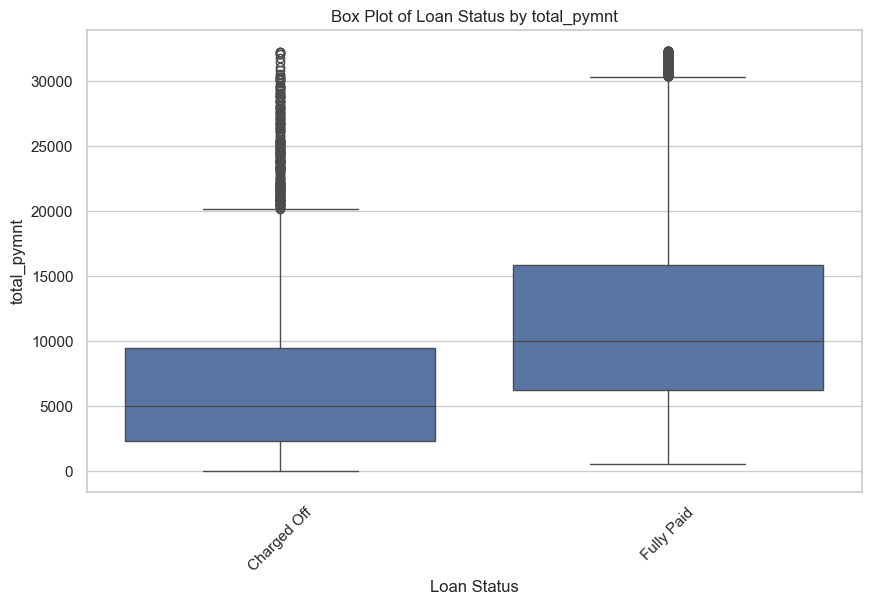

Descriptive statistics of int_rate grouped by loan_status:
               count          mean          std  min        25%       50%  \
loan_status                                                                 
Charged Off   4934.0   6388.132878  5851.020539  0.0  2069.5025  4629.845   
Fully Paid   30384.0  11162.089378  6849.818845  0.0  5946.7825  9427.330   

                    75%         95%         99%       max  
loan_status                                                
Charged Off   8938.1000  18965.2490  26165.3295  30597.41  
Fully Paid   15073.8125  25316.7425  29672.1906  31051.12  


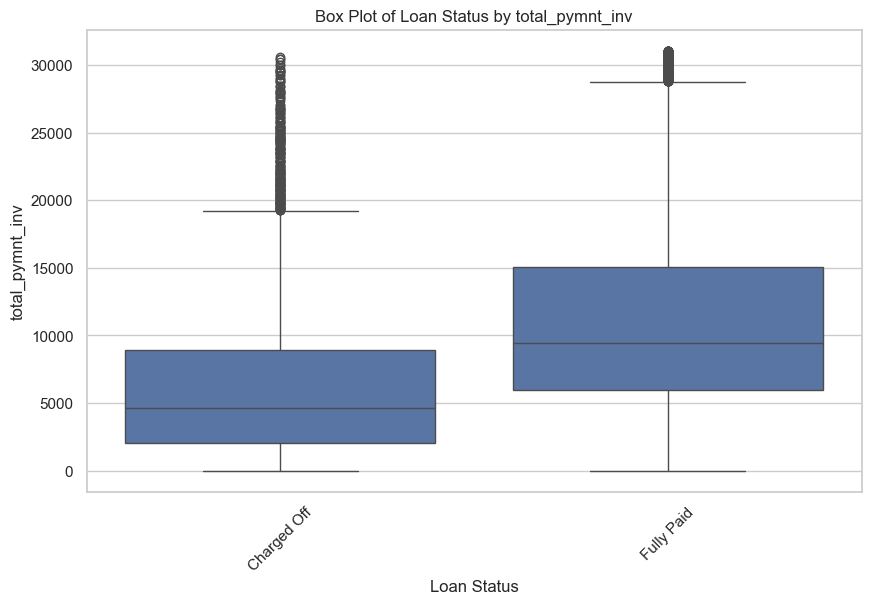

Descriptive statistics of int_rate grouped by loan_status:
               count          mean          std    min        25%      50%  \
loan_status                                                                  
Charged Off   4934.0   4028.153715  3911.801442    0.0  1266.2225  2785.41   
Fully Paid   30384.0  10019.730802  5922.764129  500.0  5400.0000  8875.00   

                    75%        95%         99%       max  
loan_status                                               
Charged Off   5399.7125  12045.131  18676.4335  26055.47  
Fully Paid   14000.0000  22000.000  25000.0000  26575.00  


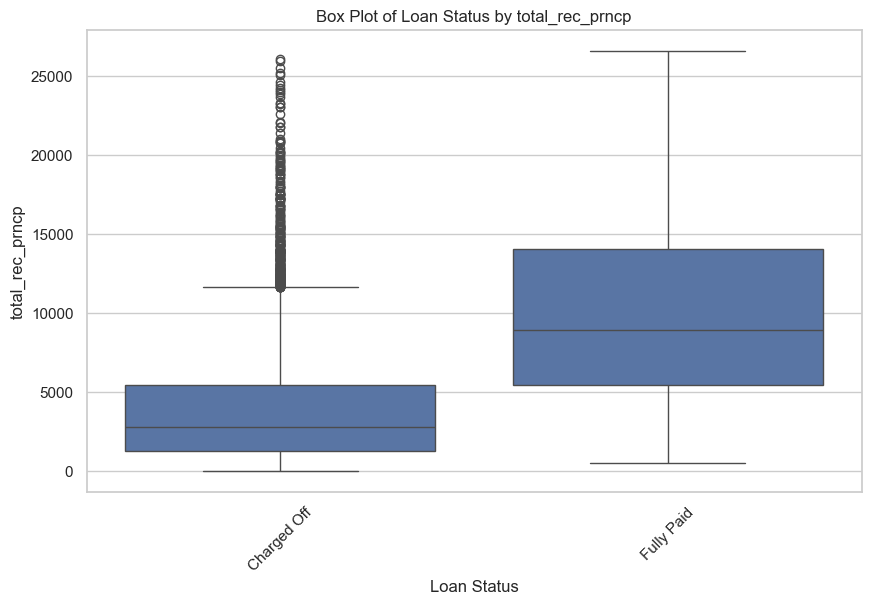

Descriptive statistics of int_rate grouped by loan_status:
               count          mean          std    min        25%      50%  \
loan_status                                                                  
Charged Off   4934.0   4028.153715  3911.801442    0.0  1266.2225  2785.41   
Fully Paid   30384.0  10019.730802  5922.764129  500.0  5400.0000  8875.00   

                    75%        95%         99%       max  
loan_status                                               
Charged Off   5399.7125  12045.131  18676.4335  26055.47  
Fully Paid   14000.0000  22000.000  25000.0000  26575.00  


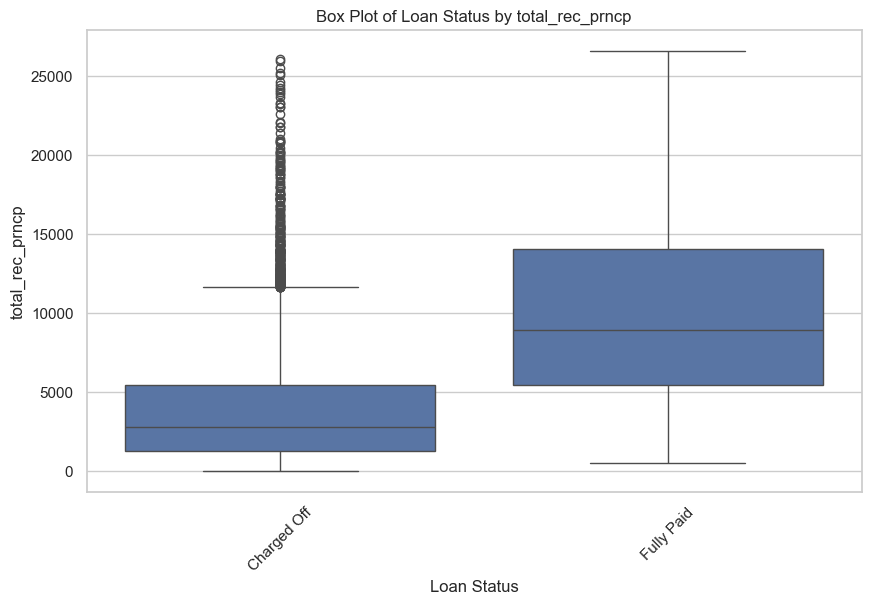

Descriptive statistics of int_rate grouped by loan_status:
               count       mean       std     min        25%    50%    75%  \
loan_status                                                                  
Charged Off   4934.0  99.735907  0.578416  96.875  99.816176  100.0  100.0   
Fully Paid   30384.0  99.679477  0.647430  96.875  99.711178  100.0  100.0   

               95%    99%    max  
loan_status                       
Charged Off  100.0  100.0  100.0  
Fully Paid   100.0  100.0  100.0  


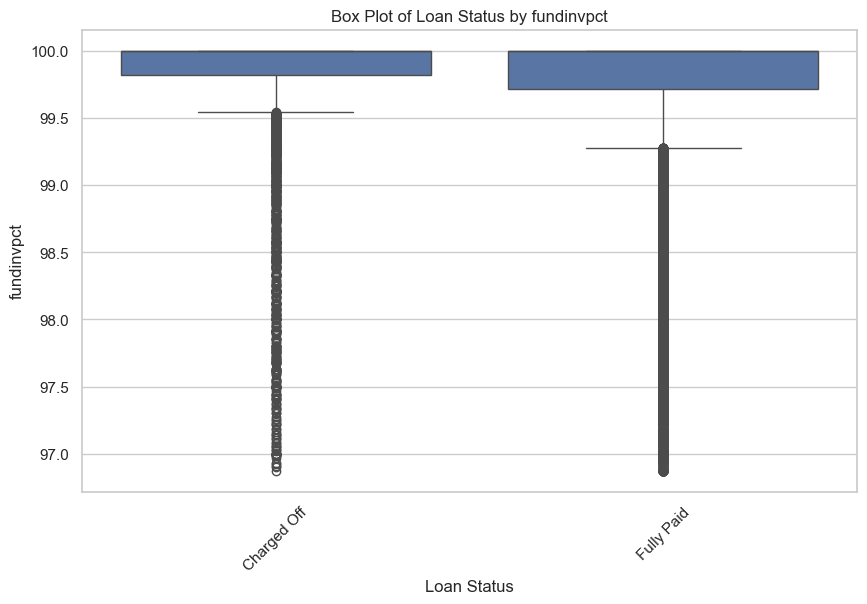

Descriptive statistics of int_rate grouped by loan_status:
               count         mean          std         min          25%  \
loan_status                                                               
Charged Off   4934.0  3495.472563  2359.503385   163.69000  1948.786850   
Fully Paid   30384.0  2228.556262  1931.728988 -3112.59594   867.753338   

                     50%          75%          95%          99%         max  
loan_status                                                                  
Charged Off  1948.786850  4977.151250  8578.747250  9570.453600  9814.39000  
Fully Paid   1651.586376  2872.656888  6566.101534  8918.067099  9815.91522  


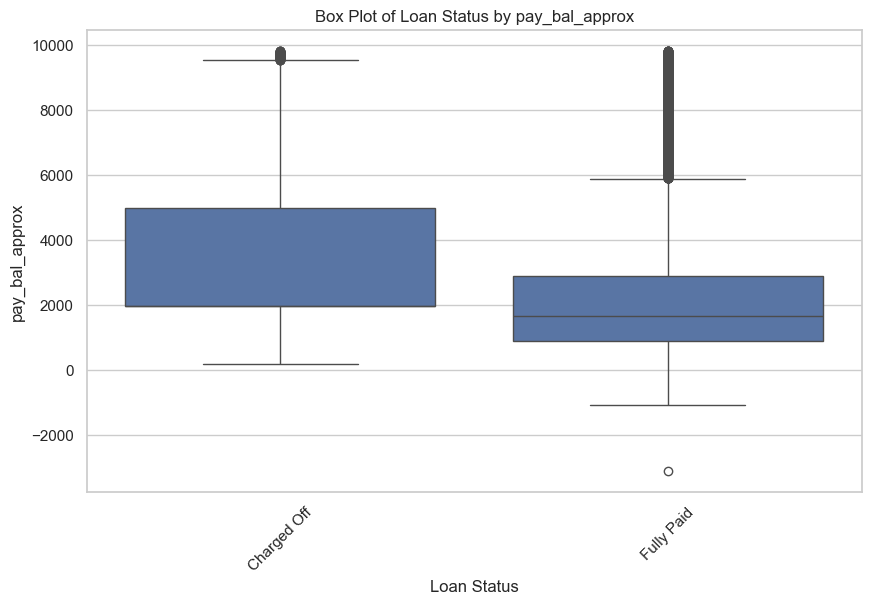

Descriptive statistics of int_rate grouped by loan_status:
               count        mean         std   min    25%     50%     75%  \
loan_status                                                                 
Charged Off   4934.0  594.944670  367.491308  28.0  304.0   547.0   823.0   
Fully Paid   30384.0  909.441186  402.699260  28.0  611.0  1035.0  1126.0   

                95%     99%     max  
loan_status                          
Charged Off  1310.0  1583.0  1885.0  
Fully Paid   1676.0  1857.0  1979.0  


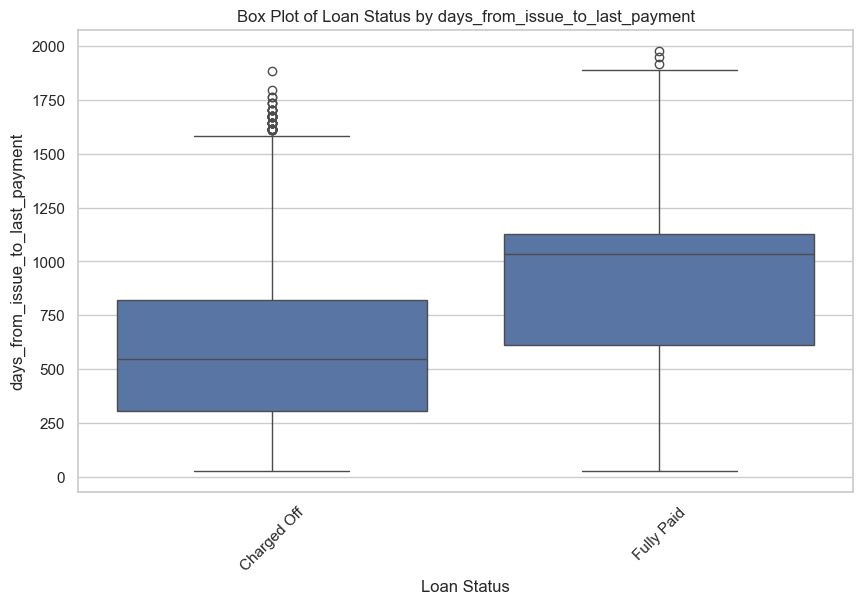

In [85]:
# Step 1: Descriptive Statistics
for i in interesting_variables:
    print("Descriptive statistics of int_rate grouped by loan_status:")
    grouped_stats = df.groupby('loan_status')[i].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])
    print(grouped_stats)

    # Step 2: Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=i, data=df)
    plt.title('Box Plot of Loan Status by '+ i)
    plt.xlabel('Loan Status')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.show()


In [88]:
## <font color="Green">**Multivariate Analysis using HeatMap**

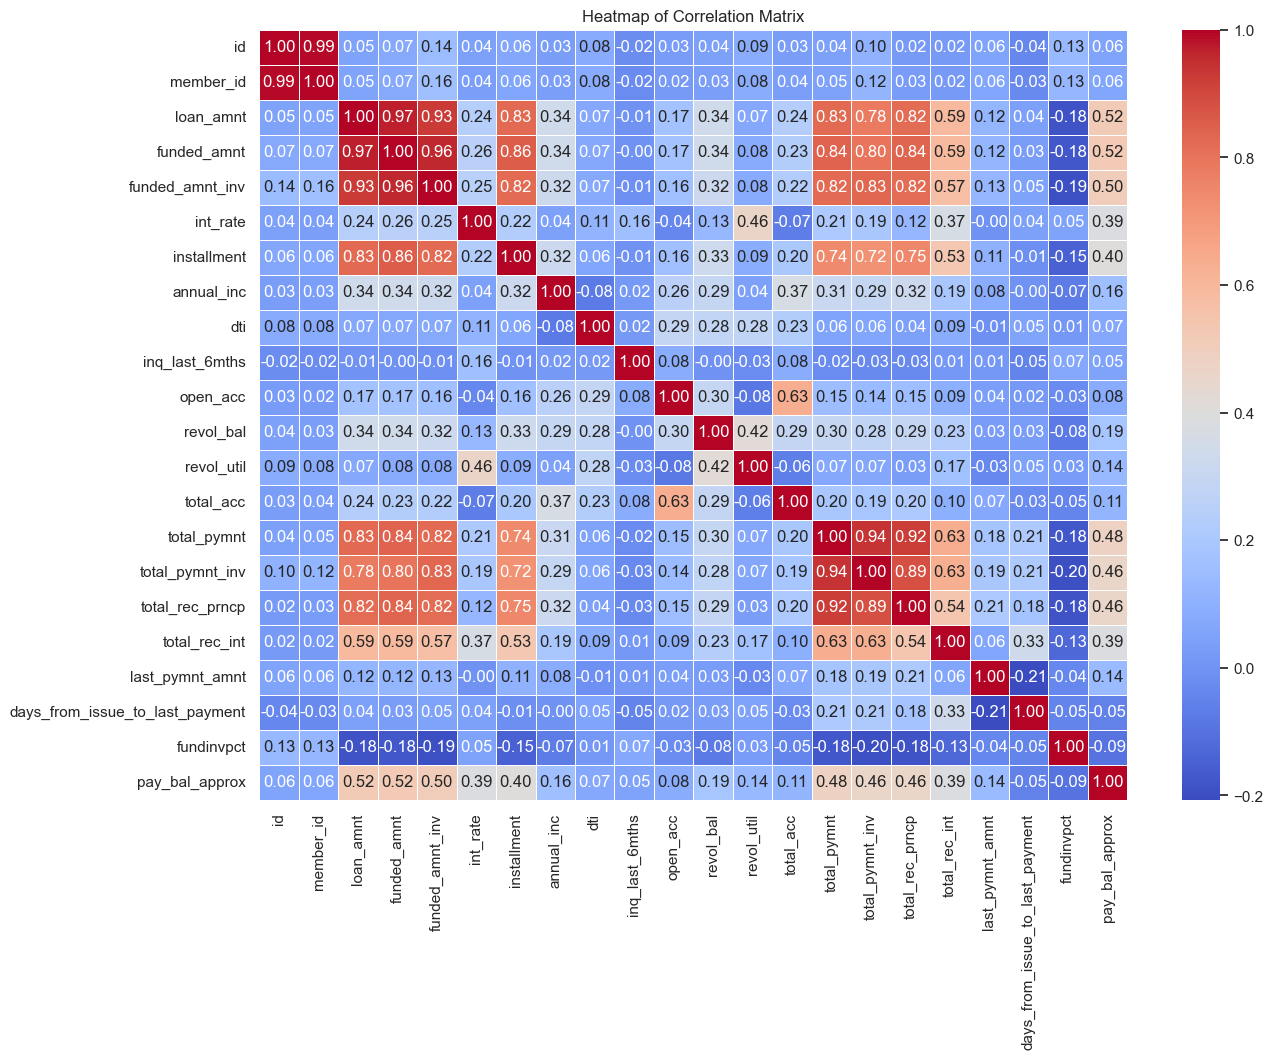

In [101]:
columns_to_drop_for_corr=['delinq_2yrs','pub_rec','out_prncp','out_prncp_inv','total_rec_late_fee','recoveries', 'collection_recovery_fee', 'pub_rec_bankruptcies']
df_numeric = df[numeric_vars]
df_corr = df_numeric.drop(columns=columns_to_drop_for_corr, axis=1)

# Calculate the correlation matrix
corr = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()
